In [1]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import DataPreProcessor as DPP

warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows


# 1. Load data


In [26]:
chotot_df = pd.read_csv("chotot_cleaned.csv")


In [27]:
alonhadat_df = pd.read_csv("alonhadat.csv")


In [28]:
chotot_df.drop(columns=['address', 'type_real_estate'], inplace=True)
chotot_df.rename(columns={'ahl_type': 'type_real_estate'}, inplace=True)
chotot_df['website'] = 'Chotot'
chotot_df['front_road'] = np.nan
chotot_df.head(3)


list_time               ward                area    region  \
0  05/11/2021     Phường Tam Hòa  Thành phố Biên Hòa  Đồng Nai   
1  05/11/2021  Phường Thống Nhất  Thành phố Biên Hòa  Đồng Nai   
2  05/11/2021      Phường Hố Nai  Thành phố Biên Hòa  Đồng Nai   

  property_status direction balconydirection property_legal_document  \
0     Đã bàn giao       NaN              NaN             Đang chờ sổ   
1     Đã bàn giao       Bắc              Nam                Đã có sổ   
2   Chưa bàn giao       NaN              NaN            Giấy tờ khác   

   size (m2)  floornumber    furnishing_sell rooms toilets        floors  \
0       70.0          NaN                NaN     2       2  Nhiều hơn 10   
1       48.0          NaN    Nội thất đầy đủ     1       1  Nhiều hơn 10   
2       67.0          NaN  Hoàn thiện cơ bản     2       2  Nhiều hơn 10   

   living_size (m2)  width (m)  length (m)  price (million) type_real_estate  \
0               NaN        NaN         NaN           1150.0         Chung cư   
1               NaN        NaN         NaN           1550.0         Chung cư   
2               NaN        NaN         NaN            360.0         Chung cư   

  website  front_road  
0  Chotot         NaN  
1  Chotot         NaN  
2  Chotot         NaN

In [29]:
alonhadat_df['website'] = 'alonhadat'
alonhadat_df.head(3)


city        date direction               district  floors  \
0  Bình Dương  08/11/2021       NaN  Thành phố Thủ Dầu Một     2.0   
1  Bình Dương  08/11/2021       NaN     Thành phố Thuận An     NaN   
2  Bình Dương  08/11/2021       NaN        Thành phố Dĩ An     1.0   

   front_road  length price (million) property_legal_document  rooms   size  \
0        12.0    12.0          3200.0                     NaN    3.0  120.0   
1        10.0    70.0         32000.0          Sổ hồng/ Sổ đỏ    NaN  900.0   
2         4.0    12.0          2550.0          Sổ hồng/ Sổ đỏ    3.0   60.0   

  type_real_estate             ward  width    website  
0     Nhà mặt tiền   Phường Hiệp An    6.0  alonhadat  
1     Nhà mặt tiền    Phường An Phú   17.0  alonhadat  
2    Nhà trong hẻm  Phường Đông Hòa    5.0  alonhadat

In [30]:
agreement_df = alonhadat_df[alonhadat_df['price (million)'] == "Thỏa thuận"].copy(
)


In [31]:
agreement_df.head()


city        date direction            district  floors  \
1401  Bình Dương  28/10/2021       NaN  Huyện Bắc Tân Uyên     NaN   
2777  Bình Dương  05/11/2021  Đông Nam  Thành phố Thuận An     NaN   
2964  Bình Dương  06/11/2021       NaN     Thị xã Tân Uyên     NaN   
3758  Bình Dương  07/11/2021       NaN     Thị xã Tân Uyên     NaN   
3779  Bình Dương  07/11/2021       Tây  Huyện Bắc Tân Uyên     NaN   

      front_road  length price (million) property_legal_document  rooms  \
1401        10.0   150.0      Thỏa thuận          Sổ hồng/ Sổ đỏ    NaN   
2777        16.0    30.0      Thỏa thuận          Sổ hồng/ Sổ đỏ    NaN   
2964         NaN     NaN      Thỏa thuận                     NaN    NaN   
3758         8.0   100.0      Thỏa thuận          Sổ hồng/ Sổ đỏ    NaN   
3779        18.0   130.0      Thỏa thuận                     NaN    NaN   

          size             type_real_estate               ward  width  \
1401   15800.0                   Kho, xưởng        Xã Đất Cuốc  100.0   
2777     450.0  Đất nền, liền kề, đất dự án  Phường Thuận Giao   15.0   
2964  140000.0                   Kho, xưởng  Phường Khánh Bình    NaN   
3758   22000.0                   Kho, xưởng        Xã Vĩnh Tân  100.0   
3779   15800.0                   Kho, xưởng        Xã Đất Cuốc  120.0   

        website  
1401  alonhadat  
2777  alonhadat  
2964  alonhadat  
3758  alonhadat  
3779  alonhadat

In [32]:
alonhadat_df['price (million)'] = alonhadat_df['price (million)'].apply(
    lambda x: np.nan if x == 'Thỏa thuận' else float(x))

alonhadat_df_ = alonhadat_df.dropna(axis=0, subset=['price (million)'])


# 2. Merge Data


In [33]:
alonhadat_df_.columns


Index(['city', 'date', 'direction', 'district', 'floors', 'front_road',
       'length', 'price (million)', 'property_legal_document', 'rooms', 'size',
       'type_real_estate', 'ward', 'width', 'website'],
      dtype='object')

In [34]:
chotot_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_real_estate', 'website', 'front_road'],
      dtype='object')

In [35]:
alonhadat_df_.columns.difference(chotot_df.columns)


Index(['city', 'date', 'district', 'length', 'size', 'width'], dtype='object')

In [36]:
alonhadat_df_.rename(columns={"city": "region", "date": "list_time", "size": "size (m2)",
                              'district': "area", 'length': "length (m)", 'width': "width (m)"}, inplace=True)


In [37]:
# merge 2 data lai thanh BDS_df
BDS_df = pd.concat([chotot_df, alonhadat_df_], ignore_index=True)


In [38]:
BDS_df.shape
BDS_df.sample(5)


(220863, 21)

list_time                  ward              area          region  \
81517   05/11/2021       Xã Lê Minh Xuân  Huyện Bình Chánh  Tp Hồ Chí Minh   
22217   05/11/2021  Phường Long Thạnh Mỹ            Quận 9  Tp Hồ Chí Minh   
143197  03/11/2021      Phường Tây Thạnh      Quận Tân Phú     Hồ Chí Minh   
44539   02/11/2021         Phường An Lạc     Quận Bình Tân  Tp Hồ Chí Minh   
26573   26/10/2021         Phường Phú Mỹ            Quận 7  Tp Hồ Chí Minh   

       property_status direction balconydirection property_legal_document  \
81517              NaN       NaN              NaN                Đã có sổ   
22217      Đã bàn giao       NaN              NaN            Giấy tờ khác   
143197             NaN       NaN              NaN          Sổ hồng/ Sổ đỏ   
44539              NaN       NaN              NaN                Đã có sổ   
26573    Chưa bàn giao       NaN              NaN            Giấy tờ khác   

        size (m2)  floornumber    furnishing_sell rooms toilets        floors  \
81517       120.0          NaN                NaN   NaN     NaN           NaN   
22217        82.0          NaN  Hoàn thiện cơ bản     3       2  Nhiều hơn 10   
143197      964.0          NaN                NaN   NaN     NaN           5.0   
44539        72.0          NaN                NaN     2       1  Nhiều hơn 10   
26573        35.0          NaN  Hoàn thiện cơ bản     2       2  Nhiều hơn 10   

        living_size (m2)  width (m)  length (m)  price (million)  \
81517                NaN        6.0        20.0           1800.0   
22217                NaN        NaN         NaN           2850.0   
143197               NaN       20.5        47.0         130000.0   
44539               72.0        4.0        18.0           3950.0   
26573                NaN        NaN         NaN           1200.0   

       type_real_estate    website  front_road  
81517        Đất thổ cư     Chotot         NaN  
22217          Chung cư     Chotot         NaN  
143197     Nhà mặt tiền  alonhadat        20.0  
44539           Nhà ngõ     Chotot         NaN  
26573         Officetel     Chotot         NaN

# 3. EDA


## 3.0 Repreprocessing


In [70]:
BDS_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_real_estate', 'website', 'front_road'],
      dtype='object')

                            ratio                  feature
feature                                                   
list_time                0.000000                list_time
region                   0.000000                   region
price (million)          0.000000          price (million)
website                  0.000000                  website
area                     0.000009                     area
type_real_estate         0.000023         type_real_estate
ward                     0.000444                     ward
size (m2)                0.000724                size (m2)
width (m)                0.203140                width (m)
property_legal_document  0.206187  property_legal_document
length (m)               0.221047               length (m)
floors                   0.224669                   floors
rooms                    0.226960                    rooms
front_road               0.442528               front_road
toilets                  0.705012                  toile

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='ratio', ylabel='feature'>

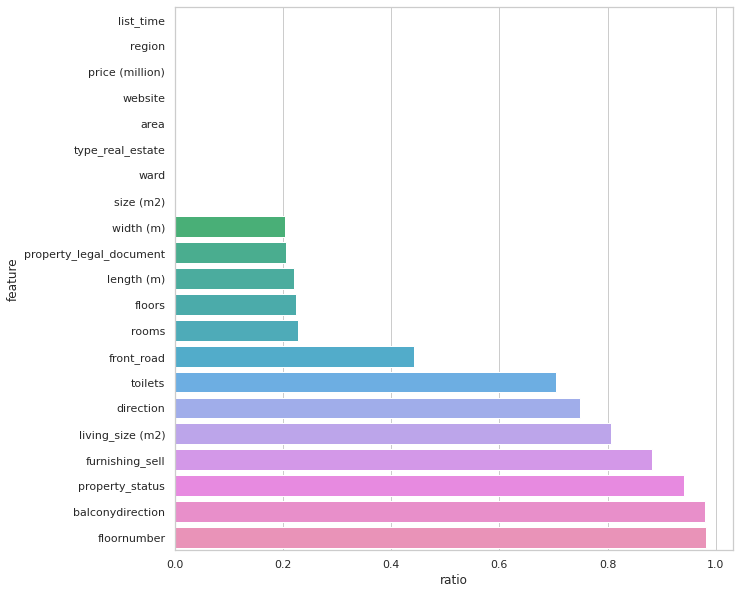

In [71]:
p = DPP.DataPreProcessor(BDS_df)
missing_df = p.cal_ratio_missing_data(BDS_df.columns)
print(missing_df)
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", color_codes=False)
sns.barplot(y='feature', x='ratio', data=missing_df, orient='h')
plt.show()


In [39]:
BDS_df1 = BDS_df.copy()


### price


In [77]:
BDS_df1['price (million)'].describe()


count    2.208620e+05
mean     1.448829e+04
std      7.092960e+04
min      3.700000e-01
25%      2.750000e+03
50%      5.300000e+03
75%      1.100000e+04
max      1.527200e+07
Name: price (million), dtype: float64

In [78]:
BDS_df1[BDS_df1['price (million)'] == max(BDS_df1['price (million)'])]


list_time      ward    area       region property_status direction  \
210727  08/11/2021  Phường 6  Quận 3  Hồ Chí Minh             NaN       NaN   

       balconydirection property_legal_document  size (m2)  floornumber  \
210727              NaN          Sổ hồng/ Sổ đỏ    18400.0          NaN   

       furnishing_sell rooms toilets floors  living_size (m2)  width (m)  \
210727             NaN  18.0     NaN   18.0               NaN       38.0   

        length (m)  price (million) type_real_estate    website  front_road  
210727        45.0       15272000.0        Văn phòng  alonhadat        30.0

In [76]:
price_mark = BDS_df1['price (million)'].quantile(0.99)
price_mark


160000.0

### _floor number_ (Cần thu thập thêm) => Loại


In [21]:
BDS_df1['floornumber'].unique()


array([ nan,  16.,   7.,   4.,  12.,   1.,  14.,  18.,  11.,  10.,   9.,
         3.,  29.,   2.,  15.,  22.,  21.,   8.,  19.,   6.,  20.,  35.,
        23.,  27.,  28.,   5.,  25.,  24.,  34.,  13.,  30.,  17.,  26.,
        40.,  37.,  36.,  32.,  33.,  38.,  47.,  39.,  31.,  41.,  45.,
       456.,  48., 320., 132.,  44.])

In [22]:
BDS_df1['floornumber'] = BDS_df1['floornumber'].apply(
    DPP.convertNum2Int, convert_dtype=False)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='floornumber'>

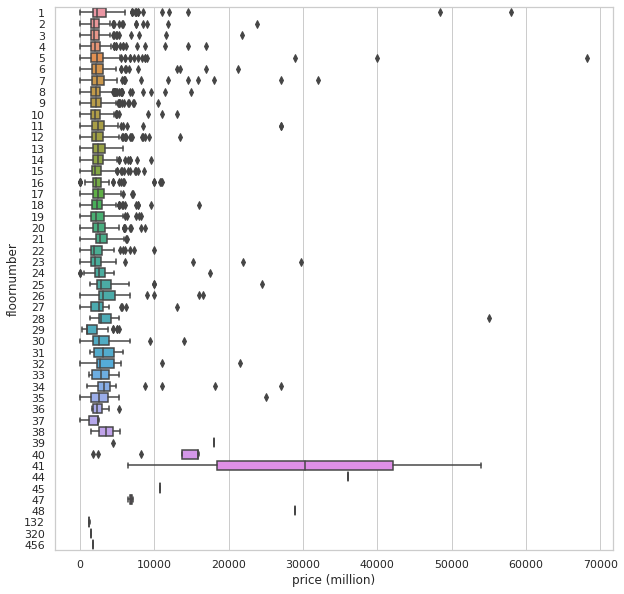

In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            y="floornumber", x='price (million)', orient='h')


In [24]:
BDS_df1[BDS_df1['floornumber'].isin([132, 320, 456])]


list_time                 ward           area          region  \
28702  17/10/2021  Phường Trung Mỹ Tây        Quận 12  Tp Hồ Chí Minh   
29655  11/10/2021        Phường An Lạc  Quận Bình Tân  Tp Hồ Chí Minh   
30349  06/10/2021     Phường Thạnh Lộc        Quận 12  Tp Hồ Chí Minh   
30662  03/10/2021     Phường Thạnh Lộc        Quận 12  Tp Hồ Chí Minh   

      property_status direction balconydirection property_legal_document  \
28702     Đã bàn giao       NaN              NaN                Đã có sổ   
29655     Đã bàn giao       Tây             Đông                Đã có sổ   
30349     Đã bàn giao       NaN              NaN             Đang chờ sổ   
30662     Đã bàn giao      Đông              Nam             Đang chờ sổ   

       size (m2) floornumber    furnishing_sell rooms toilets        floors  \
28702       85.0         456                NaN     2       2  Nhiều hơn 10   
29655       50.0         320    Nội thất đầy đủ     1       1  Nhiều hơn 10   
30349       46.0         132  Hoàn thiện cơ bản     2       1  Nhiều hơn 10   
30662       46.0         132                NaN     2       1  Nhiều hơn 10   

       living_size (m2)  width (m)  length (m)  price (million)  \
28702               NaN        NaN         NaN           1750.0   
29655               NaN        NaN         NaN           1550.0   
30349               NaN        NaN         NaN           1300.0   
30662               NaN        NaN         NaN           1250.0   

      type_real_estate website  front_road  
28702         Chung cư  Chotot         NaN  
29655         Chung cư  Chotot         NaN  
30349         Chung cư  Chotot         NaN  
30662         Chung cư  Chotot         NaN

In [25]:
# Loại bỏ giá trị tầng sô không tồn tại thực tế
BDS_df1 = BDS_df1[~BDS_df1['floornumber'].isin(
    [132, 320, 456])].reset_index(drop=True)


### _balcony direction_ (Loại)


In [26]:
BDS_df1['balconydirection'].unique()


array([nan, 'Nam', 'Đông Nam', 'Tây', 'Đông', 'Tây Nam', 'Tây Bắc', 'Bắc',
       'Đông Bắc'], dtype=object)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='balconydirection'>

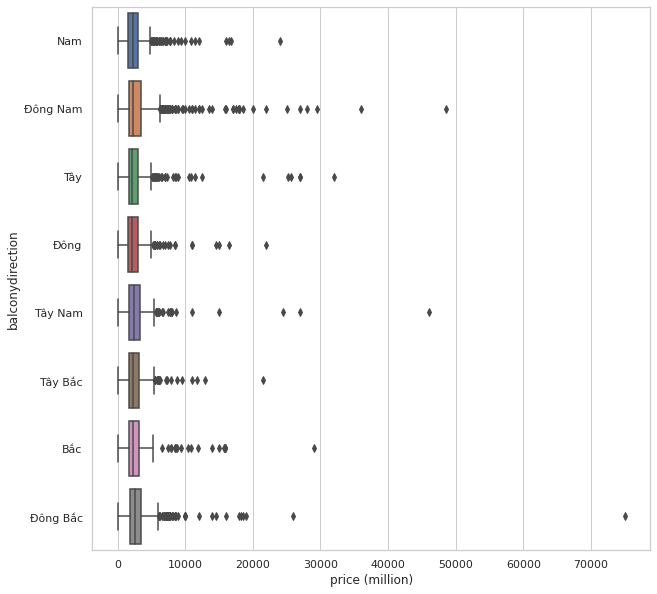

In [27]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            y="balconydirection", x='price (million)', orient='h')


### _property status_ (Loại)


In [28]:
BDS_df1['property_status'].unique()


array(['Đã bàn giao', 'Chưa bàn giao', nan], dtype=object)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='property_status', ylabel='price (million)'>

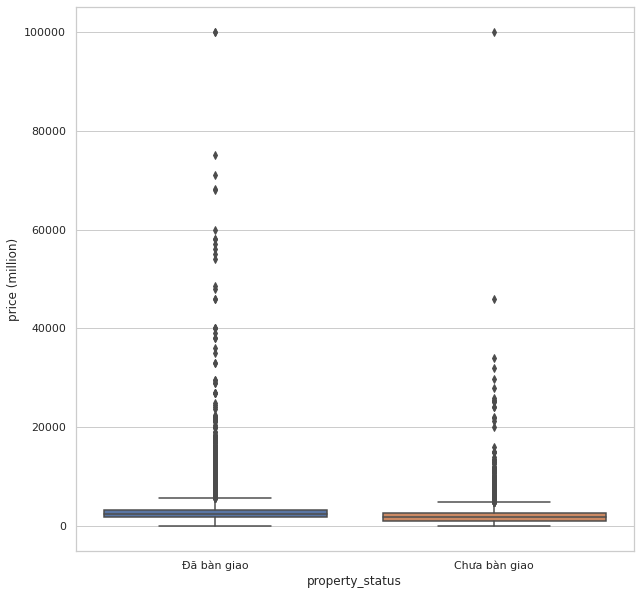

In [29]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <=
            price_mark], x="property_status", y="price (million)")


### _furnishing_sell_ (Cần thu thập thêm) => Loại


In [30]:
BDS_df1["furnishing_sell"].unique()


array([nan, 'Nội thất đầy đủ', 'Hoàn thiện cơ bản', 'Bàn giao thô',
       'Nội thất cao cấp'], dtype=object)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='furnishing_sell', ylabel='price (million)'>

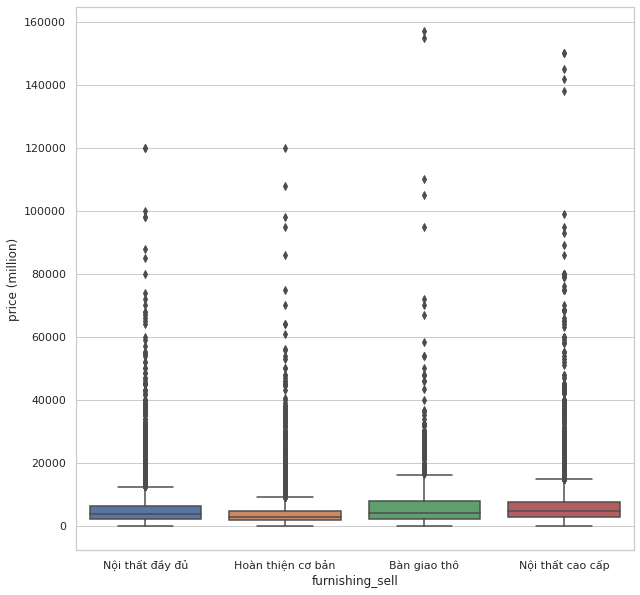

In [31]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <=
            price_mark], x="furnishing_sell", y="price (million)")


### type real estate


In [32]:
BDS_df1['type_real_estate'].unique()


array(['Chung cư', 'Căn hộ dịch vụ', 'Duplex', 'Penthouse', 'Nhà mặt phố',
       'Nhà ngõ', 'Nhà phố liền kề', 'Nhà biệt thự', 'Đất thổ cư',
       'Đất nông nghiệp', 'Đất công nghiệp', 'Đất nền dự án', 'Tập thể',
       'Officetel', nan, 'Nhà mặt tiền', 'Nhà trong hẻm',
       'Đất thổ cư, đất ở', 'Căn hộ chung cư',
       'Đất nền, liền kề, đất dự án', 'Biệt thự, nhà liền kề',
       'Nhà hàng, khách sạn', 'Phòng trọ, nhà trọ', 'Kho, xưởng',
       'Đất nông, lâm nghiệp', 'Shop, kiot, quán', 'Mặt bằng',
       'Văn phòng', 'Trang trại', 'Các loại khác'], dtype=object)

In [33]:
real_estate = {"Căn hộ chung cư": "Chung cư",
               "Đất thổ cư, đất ở": "Đất thổ cư",
               "Nhà ngõ": 'Nhà trong hẻm',
               'Đất nền, liền kề, đất dự án': 'Đất nền dự án',
               'Đất nông nghiệp': 'Đất nông, lâm nghiệp',
               'Nhà mặt phố': 'Nhà mặt tiền',
               'Nhà phố liền kề': 'Biệt thự, nhà liền kề',
               'Nhà biệt thự': 'Biệt thự, nhà liền kề'
               }


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='type_real_estate'>

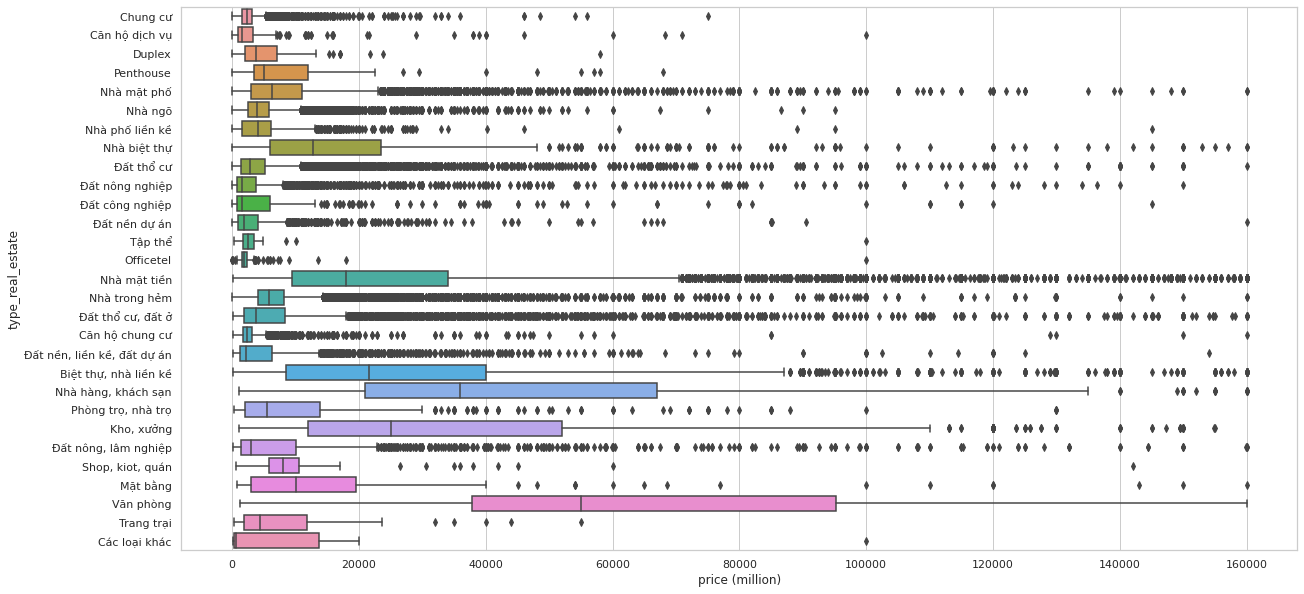

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="price (million)", y="type_real_estate", orient='h')


In [35]:
BDS_df1["type_real_estate"].replace(real_estate, inplace=True)


### length, width, size


In [36]:
BDS_df1['length (m)'] = BDS_df1['length (m)'].apply(
    lambda x: np.nan if x == 0 else x)
BDS_df1['width (m)'] = BDS_df1['width (m)'].apply(
    lambda x: np.nan if x == 0 else x)


<AxesSubplot:xlabel='length (m)', ylabel='price (million)'>

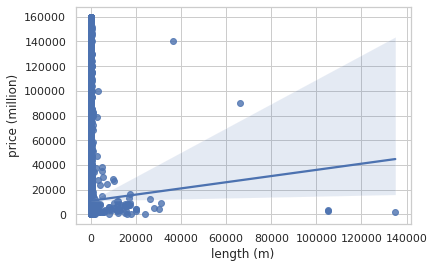

In [37]:
sns.regplot(data=BDS_df1[BDS_df1['price (million)'] <=
            price_mark], x="length (m)", y="price (million)")


In [38]:
BDS_df1['length (m)'].describe()


count    171648.000000
mean         29.927197
std         587.155782
min           0.580000
25%          12.000000
50%          17.000000
75%          22.000000
max      135000.000000
Name: length (m), dtype: float64

In [39]:
BDS_df1['length (m)'].quantile(0.99)


120.0

In [40]:
len(BDS_df1[BDS_df1['length (m)'] >= 120]), len(BDS_df1)


(1797, 220859)

In [41]:
BDS_df1[BDS_df1['length (m)'] >= 120].head()


list_time              ward                area    region  \
222   30/10/2021      Xã Long Hưng  Thành phố Biên Hòa  Đồng Nai   
369   05/11/2021  Phường Tân Phong  Thành phố Biên Hòa  Đồng Nai   
560   03/11/2021         Xã Phú An       Huyện Tân Phú  Đồng Nai   
984   30/10/2021      Xã Bình Minh     Huyện Trảng Bom  Đồng Nai   
1034  30/10/2021      Xã Long Hưng  Thành phố Biên Hòa  Đồng Nai   

     property_status direction balconydirection property_legal_document  \
222              NaN       NaN              NaN            Giấy tờ khác   
369              NaN   Tây Bắc              NaN                Đã có sổ   
560              NaN       Nam              NaN                Đã có sổ   
984              NaN   Tây Nam              NaN                     NaN   
1034             NaN       NaN              NaN            Giấy tờ khác   

      size (m2) floornumber furnishing_sell rooms toilets        floors  \
222       117.0         NaN    Bàn giao thô     4       4  Nhiều hơn 10   
369       170.0         NaN             NaN     4       3  Nhiều hơn 10   
560     80000.0         NaN             NaN     6       3  Nhiều hơn 10   
984        80.0         NaN             NaN     2     NaN  Nhiều hơn 10   
1034      117.0         NaN    Bàn giao thô     4       4  Nhiều hơn 10   

      living_size (m2)  width (m)  length (m)  price (million)  \
222              265.0        6.0       195.0           7000.0   
369              140.0      115.0       145.0           5700.0   
560            80000.0      150.0      1000.0             25.0   
984               80.0      366.0       239.0            950.0   
1034             265.0        6.0       195.0           7000.0   

           type_real_estate website  front_road  
222            Nhà mặt tiền  Chotot         NaN  
369           Nhà trong hẻm  Chotot         NaN  
560   Biệt thự, nhà liền kề  Chotot         NaN  
984           Nhà trong hẻm  Chotot         NaN  
1034           Nhà mặt tiền  Chotot         NaN

<AxesSubplot:xlabel='width (m)', ylabel='price (million)'>

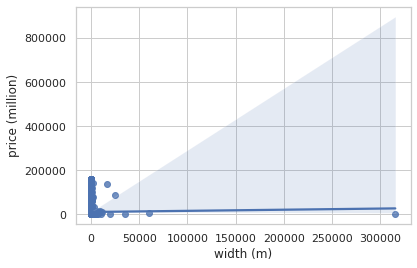

In [42]:
sns.regplot(data=BDS_df1[BDS_df1['price (million)'] <=
                         price_mark], x="width (m)", y="price (million)")


In [43]:
BDS_df1['width (m)'].describe()


count    175612.000000
mean         13.688224
std         782.852191
min           0.130000
25%           4.000000
50%           5.000000
75%           6.500000
max      315375.000000
Name: width (m), dtype: float64

In [44]:
BDS_df1[BDS_df1['width (m)'] == 315375]


list_time             ward           area          region  \
65594  18/10/2021  Phường An Lạc A  Quận Bình Tân  Tp Hồ Chí Minh   

      property_status direction balconydirection property_legal_document  \
65594             NaN       Tây              NaN                Đã có sổ   

       size (m2) floornumber    furnishing_sell         rooms      toilets  \
65594       83.0         NaN  Hoàn thiện cơ bản  Nhiều hơn 10  Nhiều hơn 6   

      floors  living_size (m2)  width (m)  length (m)  price (million)  \
65594      4             229.0   315375.0        26.0            160.0   

      type_real_estate website  front_road  
65594     Nhà mặt tiền  Chotot         NaN

In [45]:
BDS_df1['width (m)'].quantile(0.99)


72.0

In [46]:
len(BDS_df1[BDS_df1['width (m)'] >= 72]), len(BDS_df1)


(1762, 220859)

In [47]:
# Xử lý các giá trị NaN tại size và living size
for i in range(len(BDS_df1)):
    # Nếu size = NaN và living_size != NaN thì gán size = living_size
    if (np.isnan(BDS_df1.loc[i, "size (m2)"])) & (not np.isnan(BDS_df1.loc[i, "living_size (m2)"])):
        BDS_df1.at[i, "size (m2)"] = BDS_df1.loc[i,
                                                 "living_size (m2)"]
    # Nếu size = NaN và living_size = NaN thì gán size = length*width
    elif np.isnan(BDS_df1.loc[i, "size (m2)"]) & (np.isnan(BDS_df1.loc[i, "living_size (m2)"])):
        BDS_df1.at[i, "size (m2)"] = BDS_df1.loc[i,
                                                 "length (m)"]*BDS_df1.loc[i, "width (m)"]

    if np.isnan(BDS_df1.loc[i, "living_size (m2)"]):
        if not np.isnan(BDS_df1.loc[i, "size (m2)"]):
            if str(BDS_df1.loc[i, "floors"]) != 'nan':
                # Nếu floors != NaN thì living_size = size*floors
                # Nếu floors == Nhiều hơn 10 thì living_size = size*10
                try:
                    BDS_df1.at[i, "living_size (m2)"] = BDS_df1.loc[i,
                                                                    "size (m2)"]*BDS_df1.loc[i, "floors"]
                except:
                    BDS_df1.at[i,
                               "living_size (m2)"] = BDS_df1.loc[i, "size (m2)"]*10
            else:
                # Nếu floors == NaN thì living_size = size
                BDS_df1.at[i, "living_size (m2)"] = BDS_df1.loc[i,
                                                                "size (m2)"]


In [48]:
# Xử lý NaN length và width
for i in range(len(BDS_df1)):
    if not np.isnan(BDS_df1.loc[i, "size (m2)"]):

        if np.isnan(BDS_df1.loc[i, "length (m)"]) & np.isnan(BDS_df1.loc[i, "width (m)"]):
            continue

        elif np.isnan(BDS_df1.loc[i, "length (m)"]):
            BDS_df1.loc[i, "length (m)"] = round(
                BDS_df1.loc[i, "size (m2)"]/BDS_df1.loc[i, "width (m)"], 5)

        elif np.isnan(BDS_df1.loc[i, "width (m)"]):
            BDS_df1.loc[i, "width (m)"] = round(
                BDS_df1.loc[i, "size (m2)"]/BDS_df1.loc[i, "length (m)"], 5)


In [49]:
len(BDS_df1[["length (m)", "width (m)", "floors", "size (m2)", "living_size (m2)"]
            ][(BDS_df1["living_size (m2)"].isna()) | (BDS_df1["living_size (m2)"].isna())]), len(BDS_df1)


(109, 220859)

In [50]:
len(BDS_df1[(BDS_df1["length (m)"].isna()) | (BDS_df1["width (m)"].isna())])


44717

In [51]:
BDS_df1[(BDS_df1["length (m)"].isna()) | (
    BDS_df1["length (m)"].isna())].sample(5)


list_time                    ward              area          region  \
6642    21/10/2021              Xã Phú Hữu  Huyện Nhơn Trạch        Đồng Nai   
26375   27/10/2021                Phường 1            Quận 5  Tp Hồ Chí Minh   
203947  07/11/2021          Phường Tân Tạo     Quận Bình Tân     Hồ Chí Minh   
22094   05/11/2021  Phường Bình Trị Đông B     Quận Bình Tân  Tp Hồ Chí Minh   
186260  07/11/2021          Phường Tân Quý      Quận Tân Phú     Hồ Chí Minh   

       property_status direction balconydirection property_legal_document  \
6642               NaN       NaN              NaN                Đã có sổ   
26375      Đã bàn giao       NaN              NaN                Đã có sổ   
203947             NaN       NaN              NaN                     NaN   
22094      Đã bàn giao       NaN              NaN                Đã có sổ   
186260             NaN       NaN              NaN                     NaN   

        size (m2) floornumber  furnishing_sell rooms toilets        floors  \
6642       1000.0         NaN              NaN   NaN     NaN  Nhiều hơn 10   
26375        71.0          16              NaN     2       2  Nhiều hơn 10   
203947       64.0         NaN              NaN   5.0     NaN           3.0   
22094        51.1         NaN  Nội thất đầy đủ     2       1  Nhiều hơn 10   
186260       55.0         NaN              NaN   2.0     NaN           2.0   

        living_size (m2)  width (m)  length (m)  price (million)  \
6642             10000.0        NaN         NaN           1350.0   
26375              710.0        NaN         NaN           2650.0   
203947             192.0        NaN         NaN           5800.0   
22094              511.0        NaN         NaN           1850.0   
186260             110.0        NaN         NaN           5700.0   

            type_real_estate    website  front_road  
6642    Đất nông, lâm nghiệp     Chotot         NaN  
26375               Chung cư     Chotot         NaN  
203947         Nhà trong hẻm  alonhadat         8.0  
22094               Chung cư     Chotot         NaN  
186260         Nhà trong hẻm  alonhadat         6.0

### living size vs size


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='size (m2)'>

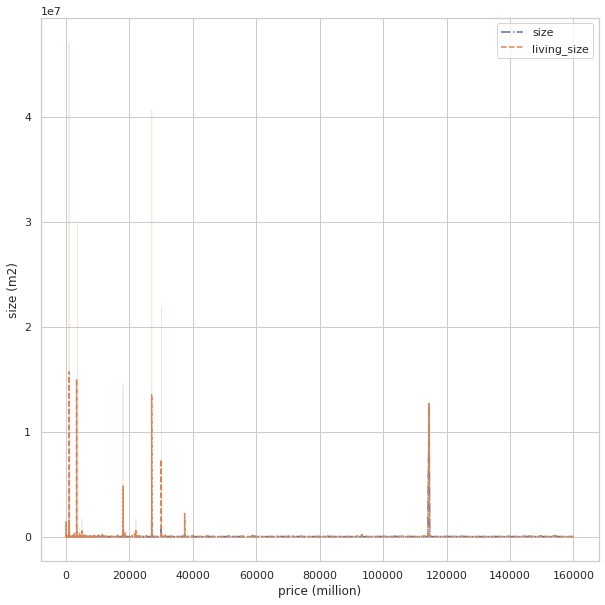

In [52]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(data=BDS_df1[BDS_df1['price (million)'] <=
                               price_mark], y='size (m2)', x="price (million)", linestyle='-.', label="size")
sns.lineplot(data=BDS_df1[BDS_df1['price (million)'] <=
                          price_mark], y='living_size (m2)', x="price (million)", linestyle='--', label="living_size", ax=ax)


In [53]:
BDS_df1['living_size (m2)'].describe()


count    2.207500e+05
mean     1.348093e+05
std      2.897950e+07
min      1.000000e+00
25%      1.000000e+02
50%      2.040000e+02
75%      5.520000e+02
max      9.000000e+09
Name: living_size (m2), dtype: float64

### direction


In [54]:
BDS_df2 = BDS_df1.copy()


In [55]:
BDS_df2["direction"].unique()


array([nan, 'Bắc', 'Đông Bắc', 'Đông Nam', 'Đông', 'Tây Bắc', 'Tây',
       'Nam', 'Tây Nam'], dtype=object)

In [56]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
direction = imp.fit_transform(BDS_df2['direction'].values.reshape(-1, 1))


In [57]:
BDS_df2['direction'] = direction.flatten()


<AxesSubplot:xlabel='direction', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='direction', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

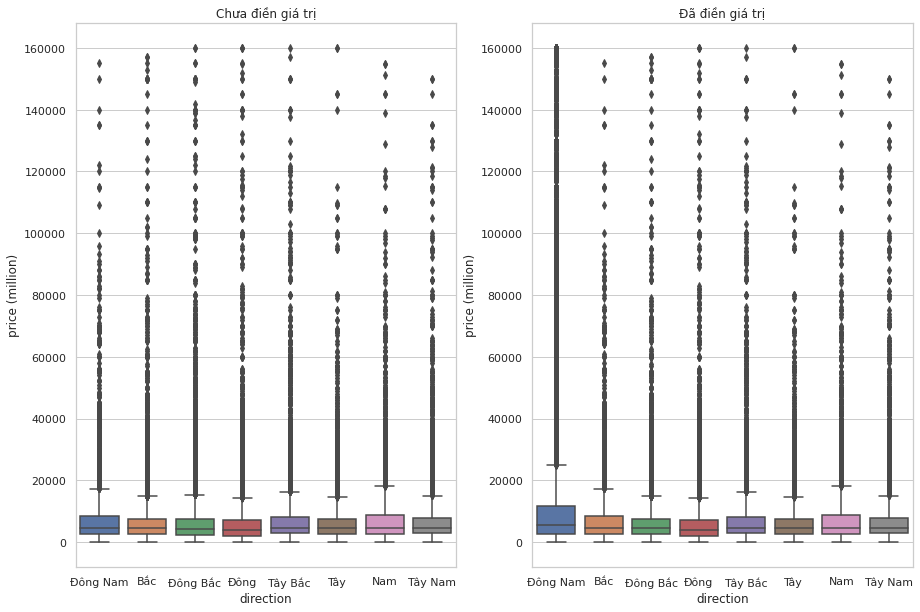

In [58]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="direction", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df2[BDS_df2['price (million)'] <= price_mark],
            x="direction", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [198]:
BDS_df2.to_csv('data version/BDS_df2.csv', index=False)


### DF2


In [199]:
BDS_df2 = pd.read_csv('data version/BDS_df2.csv')


### toilets


In [59]:
BDS_df3 = BDS_df2.copy()


In [60]:
BDS_df3['toilets'].unique()


array(['2', '1', nan, '5', '3', 'Nhiều hơn 6', '4', '6'], dtype=object)

In [61]:
BDS_df3['toilets'] = BDS_df3['toilets'].apply(
    DPP.convertNum2Int, convert_dtype=False)
BDS_df3['toilets'] = BDS_df3['toilets'].astype('category')


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='toilets', ylabel='price (million)'>

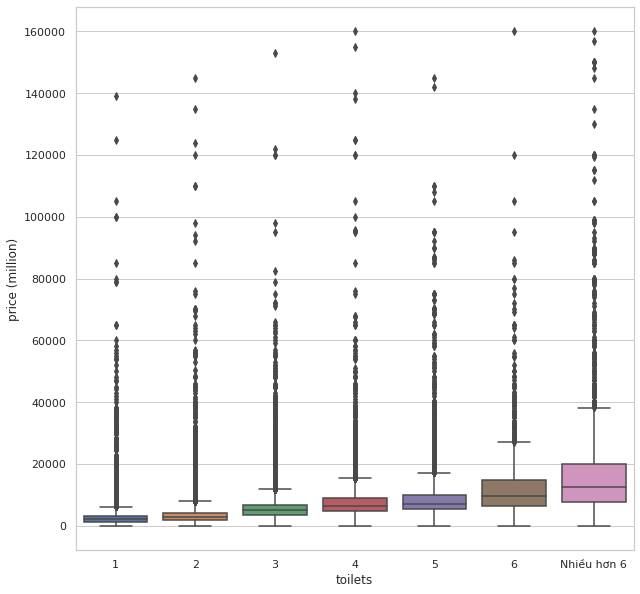

In [62]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df3[BDS_df3['price (million)'] <=
            price_mark], x="toilets", y="price (million)")


In [63]:
BDS_df3['toilets'].replace({'Nhiều hơn 6': 7}, inplace=True)


In [64]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)


In [65]:
toilets = imputer.fit_transform(BDS_df3[['toilets', 'price (million)']])


In [66]:
toilets = [int(x[0]) if x[0] <= 6 else 'Nhiều hơn 6' for x in toilets]


In [67]:
BDS_df3['toilets'] = toilets
BDS_df3['toilets'] = BDS_df3['toilets'].astype('category')


<AxesSubplot:xlabel='toilets', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='toilets', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

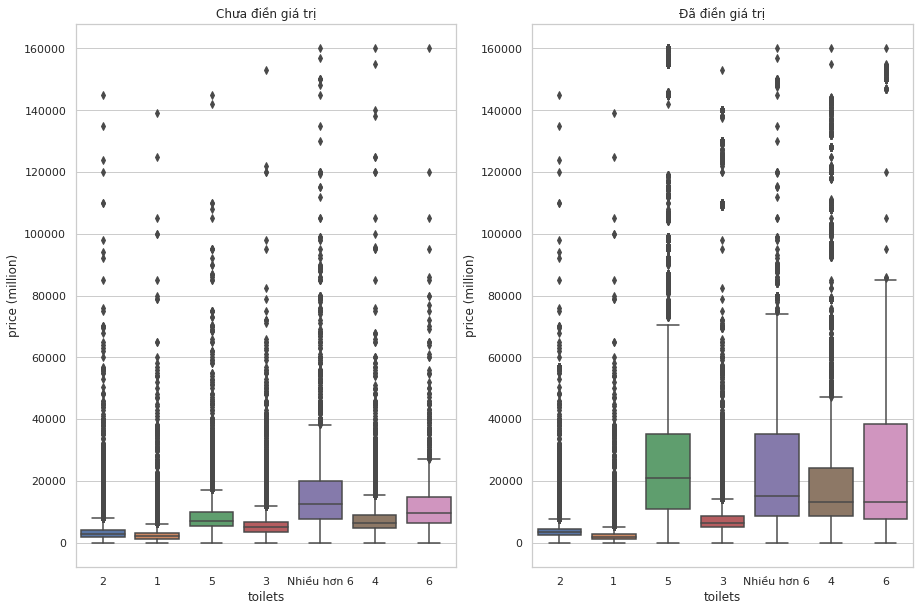

In [113]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="toilets", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df3[BDS_df3['price (million)'] <= price_mark],
            x="toilets", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [201]:
BDS_df3.to_csv('data version/BDS_df3.csv', index=False)


### DF3


In [202]:
BDS_df3 = pd.read_csv('data version/BDS_df3.csv')


### front road


In [68]:
BDS_df4 = BDS_df3.copy()


In [69]:
BDS_df4['front_road'].describe()


count    123125.000000
mean         10.997237
std          17.639068
min           0.000000
25%           5.000000
50%           8.000000
75%          13.000000
max         825.000000
Name: front_road, dtype: float64

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='front_road', ylabel='price (million)'>

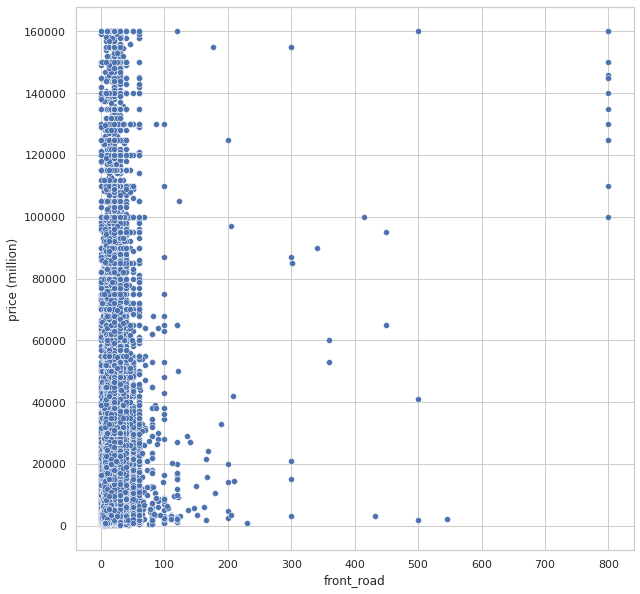

In [70]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=BDS_df4[BDS_df4['price (million)']
                <= price_mark], x="front_road", y="price (million)")


In [71]:
BDS_df4['front_road'].quantile(0.99)


40.0

In [72]:
BDS_df4 = BDS_df4[~(BDS_df4['front_road'] > 26)].reset_index(drop=True)


In [73]:
BDS_df4['front_road'].isna().sum()


97734

In [74]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()


In [75]:
front_road = imputer.fit_transform(BDS_df4[['front_road', 'price (million)']])


In [76]:
BDS_df4['front_road'] = [x[0] for x in front_road]


<AxesSubplot:xlabel='front_road', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='front_road', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

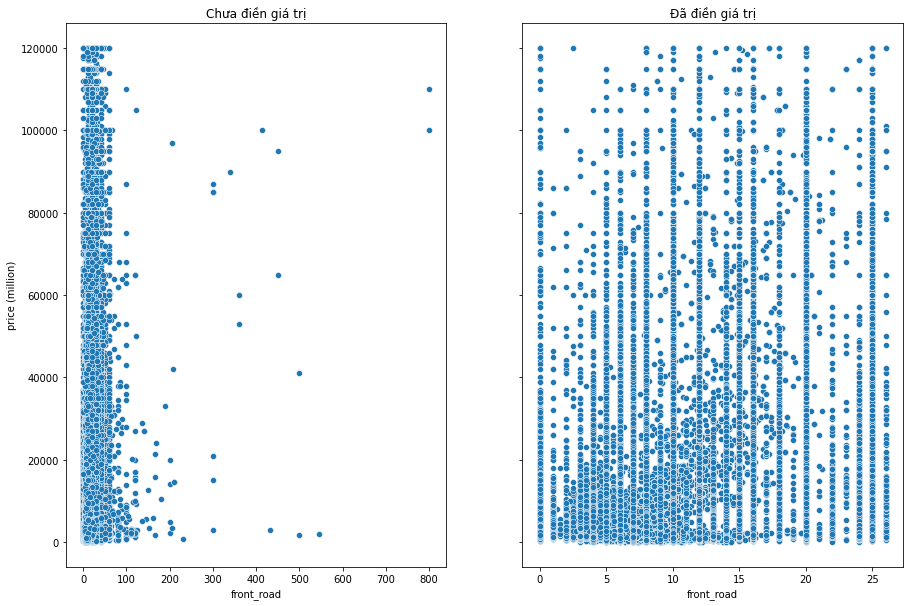

In [41]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)

sns.scatterplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
                x="front_road", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.scatterplot(data=BDS_df4[BDS_df4['price (million)'] <= price_mark],
                x="front_road", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


### region


In [77]:
BDS_df4['region'].unique()


array(['Đồng Nai', 'Bình Dương', 'Tp Hồ Chí Minh', 'Hồ Chí Minh'],
      dtype=object)

In [78]:
BDS_df4['region'].replace({'Tp Hồ Chí Minh': 'Hồ Chí Minh'}, inplace=True)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (million)'>

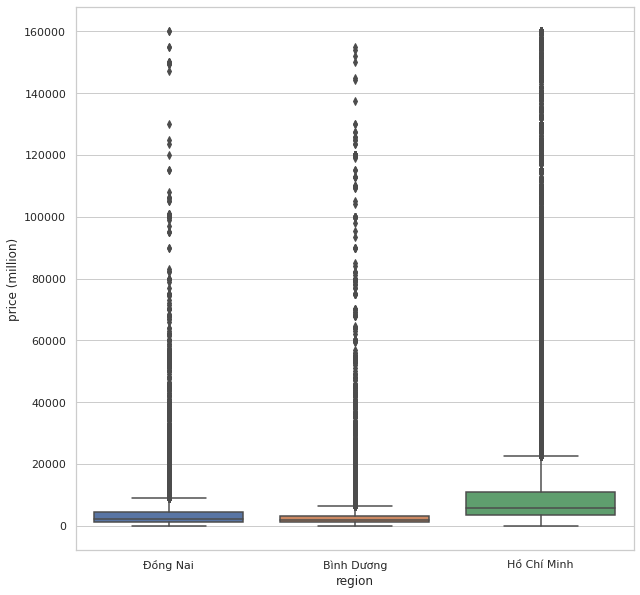

In [79]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df4[BDS_df4['price (million)'] <=
            price_mark], x="region", y="price (million)")


### area


In [80]:
region_cols = ['ward', 'area', 'region']
BDS_df4[region_cols].groupby(
    region_cols[1:]).count().sort_values(axis=0, by=['region'])


ward
area                  region            
Huyện Bàu Bàng        Bình Dương    1087
Thị xã Bến Cát        Bình Dương    2233
Thành phố Thủ Dầu Một Bình Dương    2853
Thành phố Thuận An    Bình Dương    3508
Thành phố Dĩ An       Bình Dương     963
Thị xã Dĩ An          Bình Dương    2832
Huyện Phú Giáo        Bình Dương     219
Thị xã Tân Uyên       Bình Dương    1830
Huyện Dầu Tiếng       Bình Dương     430
Huyện Bắc Tân Uyên    Bình Dương     455
Quận 7                Hồ Chí Minh   7749
Quận 8                Hồ Chí Minh   4711
Quận 9                Hồ Chí Minh   8274
Quận Bình Thạnh       Hồ Chí Minh  12956
Quận Bình Tân         Hồ Chí Minh  11340
Quận Bắc Từ Liêm      Hồ Chí Minh      1
Quận Gò Vấp           Hồ Chí Minh  20161
Quận Thủ Đức          Hồ Chí Minh   4397
Huyện Hóc Môn         Hồ Chí Minh   4147
Quận Tân Bình         Hồ Chí Minh  14869
Quận Tân Phú          Hồ Chí Minh  13304
Huyện Cần Giờ         Hồ Chí Minh    423
Thành phố Thủ Đức     Hồ Chí Minh   3797
Huyện Bình Chánh      Hồ Chí Minh   7095
Quận Phú Nhuận        Hồ Chí Minh   7727
Quận 6                Hồ Chí Minh   3040
Quận 3                Hồ Chí Minh   5647
Quận 4                Hồ Chí Minh   1710
Huyện Củ Chi          Hồ Chí Minh   8168
Quận 2                Hồ Chí Minh   4592
Quận 12               Hồ Chí Minh   9172
Quận 11               Hồ Chí Minh   2840
Quận 10               Hồ Chí Minh   7585
Quận 1                Hồ Chí Minh   6206
Huyện Nhà Bè          Hồ Chí Minh   4805
Quận 5                Hồ Chí Minh   2287
Huyện Nhơn Trạch      Đồng Nai      1259
Huyện Thống Nhất      Đồng Nai       393
Huyện Trảng Bom       Đồng Nai      2179
Thành phố Long Khánh  Đồng Nai       893
Huyện Tân Phú         Đồng Nai       148
Thành phố Biên Hòa    Đồng Nai      3214
Thành phố Biên Hoà    Đồng Nai      4649
Huyện Vĩnh Cửu        Đồng Nai       978
Huyện Xuân Lộc        Đồng Nai       507
Huyện Định Quán       Đồng Nai       998
Huyện Cẩm Mỹ          Đồng Nai       623
Huyện Long Thành      Đồng Nai      2293

In [81]:
BDS_df4.replace({'Thị xã Dĩ An': 'Thành phố Dĩ An',
                'Thành phố Biên Hoà': 'Thành phố Biên Hòa',
                 'Quận Thủ Đức': 'Thành phố Thủ Đức'}, inplace=True)


In [82]:
BDS_df4 = BDS_df4[BDS_df4['area'] != "Quận Bắc Từ Liêm"].reset_index(drop=True)


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Tp Hồ Chí Minh')

<AxesSubplot:title={'center':'Giá bất động sản ở Tp Hồ Chí Minh'}, xlabel='price (million)', ylabel='area'>

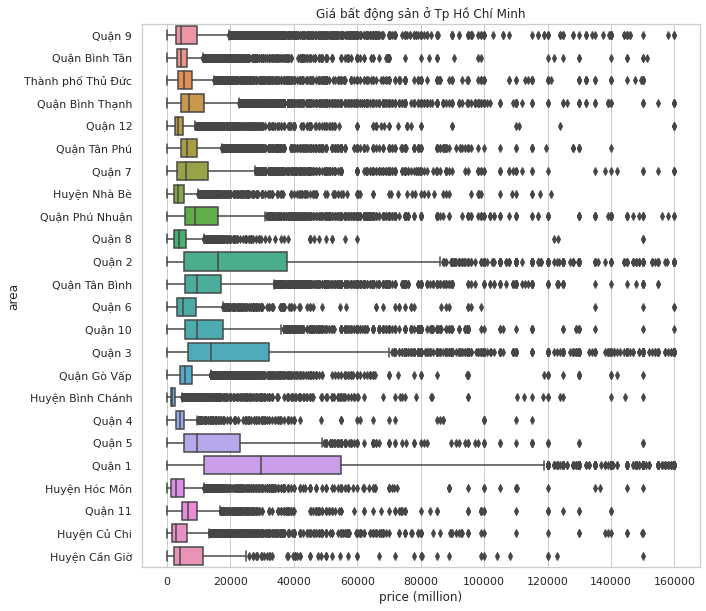

In [83]:
plt.figure(figsize=(10, 10))
# sns.countplot(x='region',data=BDS_df4)
BDS_HCM = BDS_df4[(BDS_df4['price (million)'] <= price_mark)
                  & (BDS_df4['region'] == "Hồ Chí Minh")]
plt.title("Giá bất động sản ở Tp Hồ Chí Minh")
sns.boxplot(y='area', x='price (million)', orient='h', data=BDS_HCM)


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Bình Dương')

<AxesSubplot:title={'center':'Giá bất động sản ở Bình Dương'}, xlabel='price (million)', ylabel='area'>

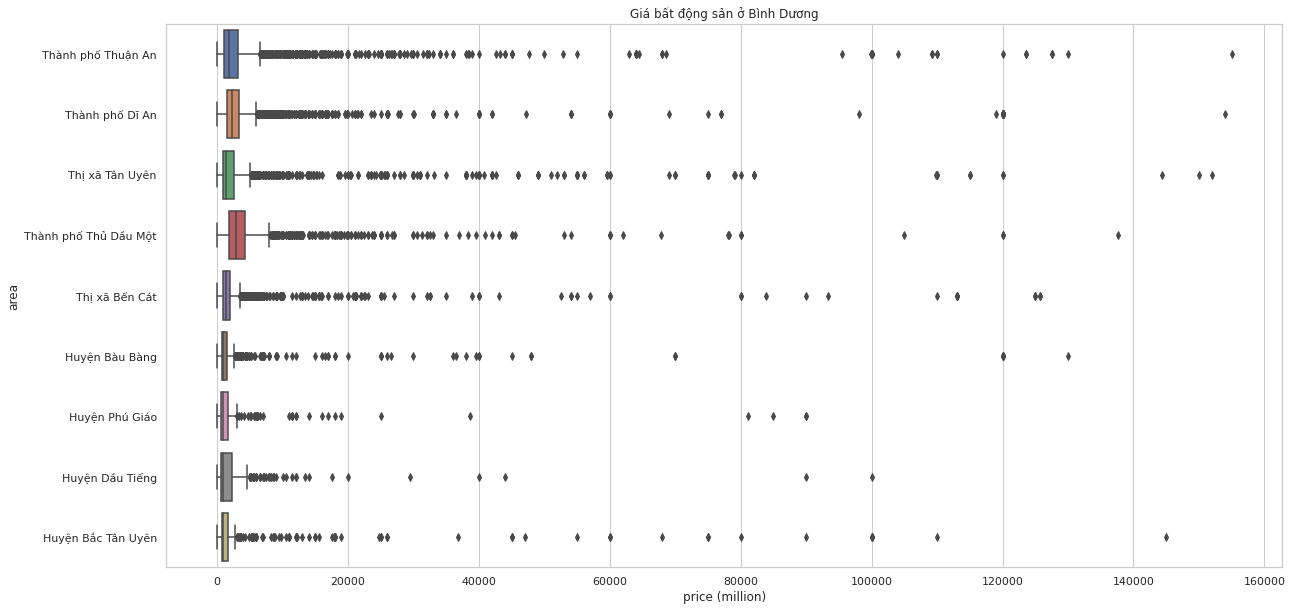

In [81]:
plt.figure(figsize=(20, 10))
# sns.countplot(x='region',data=BDS_df4)
BDS_BD = BDS_df4[(BDS_df4['price (million)'] <= price_mark)
                 & (BDS_df4['region'] == "Bình Dương")]
plt.title("Giá bất động sản ở Bình Dương")
sns.boxplot(y='area', x='price (million)', orient='h', data=BDS_BD)


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Đồng Nai')

<AxesSubplot:title={'center':'Giá bất động sản ở Đồng Nai'}, xlabel='price (million)', ylabel='area'>

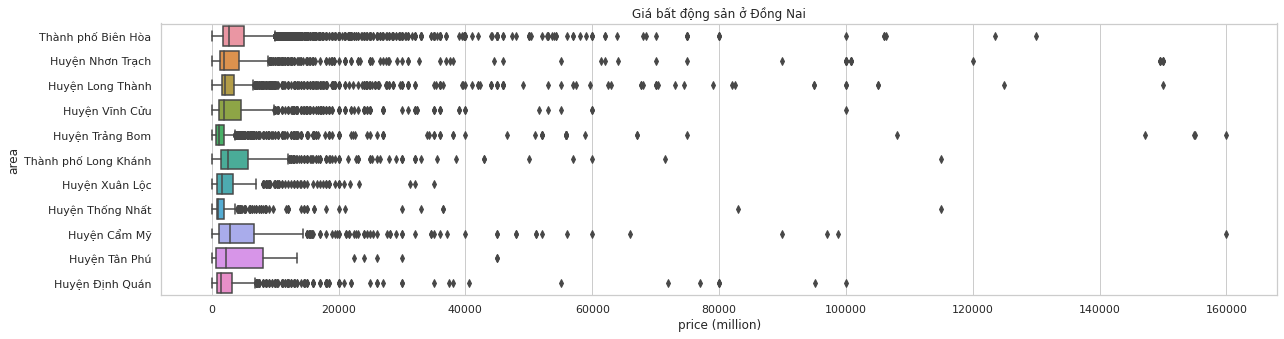

In [82]:
plt.figure(figsize=(20, 5))
# sns.countplot(x='region',data=BDS_df4)
BDS_DN = BDS_df4[(BDS_df4['price (million)'] <= price_mark)
                 & (BDS_df4['region'] == "Đồng Nai")]
plt.title("Giá bất động sản ở Đồng Nai")
sns.boxplot(y='area', x='price (million)', orient='h', data=BDS_DN)


In [203]:
BDS_df4.to_csv('data version/BDS_df4.csv', index=False)


### DF4


In [23]:
BDS_df4 = pd.read_csv('data version/BDS_df4.csv')


### ward


In [86]:
BDS_df5 = BDS_df4.copy()


In [87]:
BDS_df5['ward'].unique()


array(['Phường Tam Hòa', 'Phường Thống Nhất', 'Phường Hố Nai',
       'Phường Hoá An', 'Phường Bửu Long', 'Xã Đại Phước', 'Xã Phước An',
       'Phường An Bình', 'Phường Phước Tân', 'Phường Hòa Bình',
       'Phường Thanh Bình', 'Phường Quyết Thắng', 'Phường Tam Hiệp',
       'Phường Tân Hiệp', 'Phường Tân Biên', 'Phường Quang Vinh',
       'Phường Trảng Dài', 'Xã Long Đức', 'Thị trấn Long Thành',
       'Xã Long Hưng', 'Phường Long Bình Tân', 'Phường Tân Vạn',
       'Xã Cẩm Đường', 'Phường Tam Phước', 'Phường Tân Phong',
       'Xã Thạnh Phú', 'Xã Hố Nai 3', 'Phường Bửu Hòa', 'Xã Tây Hoà',
       'Phường Tân Mai', 'Phường Bình Đa', 'Phường Long Bình',
       'Xã Bình Hòa', 'Phường Tân Tiến', 'Phường Tân Hạnh', 'Xã Bắc Sơn',
       'Thị trấn Trảng Bom', 'Phường Bảo Vinh', 'Xã Trung Hoà',
       'Phường An Hoà', 'Thị trấn Hiệp Phước', 'Xã An Phước',
       'Phường Trung Dũng', 'Xã Quảng Tiến', 'Xã Xuân Bắc',
       'Xã Thiện Tân', 'Xã Bình Lợi', 'Xã Hưng Thịnh', 'Xã An Viễn',
       'X

In [88]:
BDS_df5['ward'].replace(
    {"xã Tân An Hội Xã Tân An Hội": "Xã Tân An Hội"}, inplace=True)


In [89]:
def replace_error_value(x):
    '''
        Kiểm tra và thay thế các giá trị không đúng định dạng trong thuộc tính ward
        Giá trị bắt đầu là "Xã", "Phường", "Thị trấn" là hợp lệ

        Parameters
        ----------
            - x (string): chuỗi giá trị cần kiểm tra

        Returns
        ----------
            - Kết quả sau khi kiểm tra
    '''
    if isinstance(x, (int, float)) or x == np.nan:
        return np.nan

    temp = x.lower()
    if temp.startswith(('xã', 'phường', 'thị trấn')):
        return x

    return np.nan


BDS_df5['ward'] = BDS_df5['ward'].apply(replace_error_value)


In [90]:
region_cols = ['ward', 'area', 'region']
BDS_df5[region_cols].groupby(
    region_cols).all().sort_values(axis=0, by=['region', 'area'])


Empty DataFrame
Columns: []
Index: [(Thị Trấn Bàu Bàng, Huyện Bàu Bàng, Bình Dương), (Thị trấn Lai Uyên, Huyện Bàu Bàng, Bình Dương), (Xã Cây Trường II, Huyện Bàu Bàng, Bình Dương), (Xã Hưng Hòa, Huyện Bàu Bàng, Bình Dương), (Xã Lai Hưng, Huyện Bàu Bàng, Bình Dương), (Xã Long Nguyên, Huyện Bàu Bàng, Bình Dương), (Xã Trừ Văn Thố, Huyện Bàu Bàng, Bình Dương), (Xã Tân Hưng, Huyện Bàu Bàng, Bình Dương), (Thị trấn Tân Thành, Huyện Bắc Tân Uyên, Bình Dương), (Xã Bình Mỹ, Huyện Bắc Tân Uyên, Bình Dương), (Xã Hiếu Liêm, Huyện Bắc Tân Uyên, Bình Dương), (Xã Lạc An, Huyện Bắc Tân Uyên, Bình Dương), (Xã Thường Tân, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Bình, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Lập, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Mỹ, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Thành, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Định, Huyện Bắc Tân Uyên, Bình Dương), (Xã Đất Cuốc, Huyện Bắc Tân Uyên, Bình Dương), (Thị trấn Dầu Tiếng, Huyện Dầu Tiếng, Bình Dương), (Xã An Lập, Huyện Dầu Tiếng, Bình Dương), (Xã Long Hoà, Huyện Dầu Tiếng, Bình Dương), (Xã Long Hòa, Huyện Dầu Tiếng, Bình Dương), (Xã Long Tân, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Hoà, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Hòa, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Thạnh, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Tân, Huyện Dầu Tiếng, Bình Dương), (Xã Thanh An, Huyện Dầu Tiếng, Bình Dương), (Xã Thanh Tuyền, Huyện Dầu Tiếng, Bình Dương), (Xã Định  Hiệp, Huyện Dầu Tiếng, Bình Dương), (Xã Định An, Huyện Dầu Tiếng, Bình Dương), (Xã Định Hiệp, Huyện Dầu Tiếng, Bình Dương), (Xã Định Thành, Huyện Dầu Tiếng, Bình Dương), (Thị trấn Phước Vĩnh, Huyện Phú Giáo, Bình Dương), (Xã An Bình, Huyện Phú Giáo, Bình Dương), (Xã An Linh, Huyện Phú Giáo, Bình Dương), (Xã An Long, Huyện Phú Giáo, Bình Dương), (Xã An Thái, Huyện Phú Giáo, Bình Dương), (Xã Phước Hoà, Huyện Phú Giáo, Bình Dương), (Xã Phước Hòa, Huyện Phú Giáo, Bình Dương), (Xã Phước Sang, Huyện Phú Giáo, Bình Dương), (Xã Tam Lập, Huyện Phú Giáo, Bình Dương), (Xã Tân Hiệp, Huyện Phú Giáo, Bình Dương), (Xã Tân Long, Huyện Phú Giáo, Bình Dương), (Xã Vĩnh Hoà, Huyện Phú Giáo, Bình Dương), (Xã Vĩnh Hòa, Huyện Phú Giáo, Bình Dương), (Phường An Bình, Thành phố Dĩ An, Bình Dương), (Phường Bình An, Thành phố Dĩ An, Bình Dương), (Phường Bình Thắng, Thành phố Dĩ An, Bình Dương), (Phường Dĩ An, Thành phố Dĩ An, Bình Dương), (Phường Tân Bình, Thành phố Dĩ An, Bình Dương), (Phường Tân Đông Hiệp, Thành phố Dĩ An, Bình Dương), (Phường Đông Hòa, Thành phố Dĩ An, Bình Dương), (Phường An Phú, Thành phố Thuận An, Bình Dương), (Phường An Thạnh, Thành phố Thuận An, Bình Dương), (Phường Bình Chuẩn, Thành phố Thuận An, Bình Dương), (Phường Bình Hòa, Thành phố Thuận An, Bình Dương), (Phường Bình Nhâm, Thành phố Thuận An, Bình Dương), (Phường Hưng Định, Thành phố Thuận An, Bình Dương), (Phường Lái Thiêu, Thành phố Thuận An, Bình Dương), (Phường Thuận Giao, Thành phố Thuận An, Bình Dương), (Phường Vĩnh Phú, Thành phố Thuận An, Bình Dương), (Xã An Sơn, Thành phố Thuận An, Bình Dương), (Phường Chánh Mỹ, Thành phố Thủ Dầu Một, Bình Dương), (Phường Chánh Nghĩa, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hiệp An, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hiệp Thành, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hoà Phú, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hòa Phú, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Cường, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Hòa, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Lợi, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Mỹ, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Thọ, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Tân, Thành phố Thủ Dầu Một, Bình Dương), (Phường Tân An, Thành phố Thủ Dầu Một, Bình Dương), (Phường Tương Bình Hiệp, Thành phố Thủ Dầu Một, Bình Dương), (Phường Định Hoà, Thành phố Thủ Dầu Một, Bình Dương), (Phường Định Hòa, Thành phố Thủ Dầu Một, Bình Dương), (Phường Chánh Phú Hòa, Thị xã Bến Cát, Bình Dương), (Phường Hòa Lợi, Thị xã Bến Cát, Bình Dương), (Phường Mỹ Phước, Thị xã

In [205]:
BDS_df5.to_csv('data version/BDS_df5.csv', index=False)


### DF5


In [206]:
BDS_df5 = pd.read_csv('data version/BDS_df5.csv')


### Property legal document


In [91]:
BDS_df6 = BDS_df5.copy()


In [92]:
property_doc = ['property_legal_document', 'website']
BDS_df6[property_doc].groupby(
    property_doc[0]).count().sort_values(by=['website'])


website
property_legal_document         
Giấy phép KD                  17
Giấy phép XD                 128
Giấy tờ hợp lệ              3727
Giấy tờ khác                4642
Đang chờ sổ                 5941
Đã có sổ                   71460
Sổ hồng/ Sổ đỏ             83012

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='property_legal_document', ylabel='price (million)'>

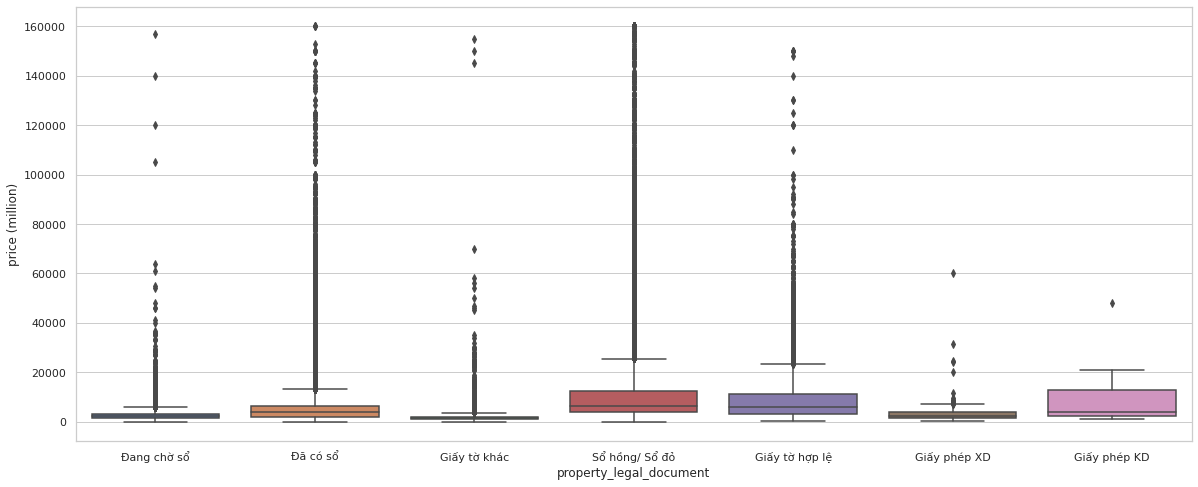

In [93]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='property_legal_document', y='price (million)',
            data=BDS_df6[BDS_df6['price (million)'] <= price_mark])


In [94]:
BDS_df6['property_legal_document'].replace({"Sổ hồng/ Sổ đỏ": 'Đã có sổ',
                                           "Giấy tờ hợp lệ": "Giấy tờ khác",
                                            "Giấy phép XD": "Giấy tờ khác",
                                            "Giấy phép KD": "Giấy tờ khác"}, inplace=True)


In [95]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
property_legal_document = imp.fit_transform(
    BDS_df6['property_legal_document'].values.reshape(-1, 1))


In [96]:
BDS_df6['property_legal_document'] = property_legal_document.flatten()


<AxesSubplot:xlabel='property_legal_document', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='property_legal_document', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

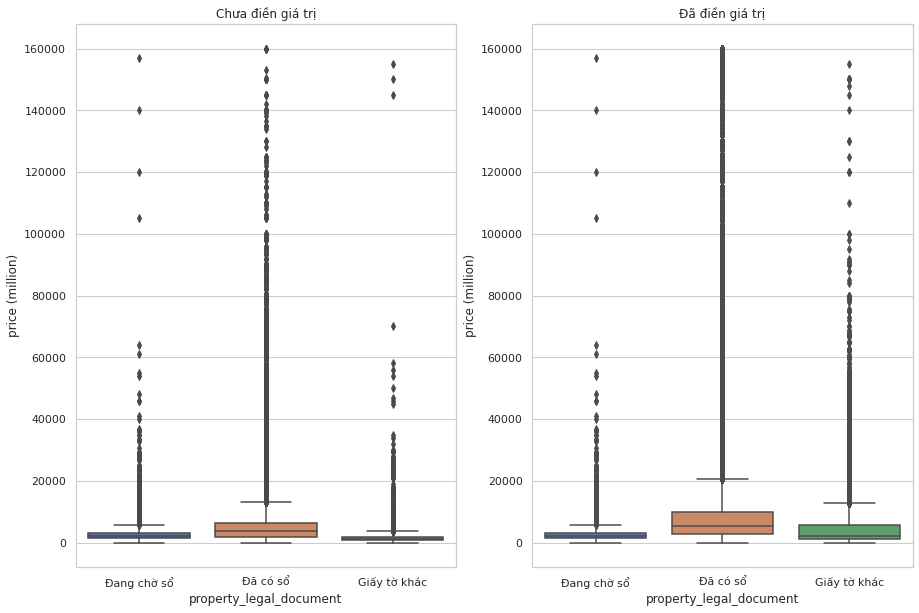

In [114]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="property_legal_document", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df6[BDS_df6['price (million)'] <= price_mark],
            x="property_legal_document", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [207]:
BDS_df6.to_csv('data version/BDS_df6.csv', index=False)


### DF6


In [208]:
BDS_df6 = pd.read_csv('data version/BDS_df6.csv')


### floors


In [118]:
BDS_df7 = BDS_df6.copy()


In [119]:
BDS_df7['floors'].unique()


array(['Nhiều hơn 10', '1', '3', '2', '4', '5', '6', '7', '10', '9', '8',
       nan, 2.0, 1.0, 18.0, 23.0, 4.0, 6.0, 3.0, 26.0, 35.0, 10.0, 30.0,
       15.0, 12.0, 8.0, 40.0, 38.0, 5.0, 29.0, 19.0, 31.0, 9.0, 33.0,
       17.0, 20.0, 13.0, 22.0, 24.0, 11.0, 14.0, 27.0, 16.0, 25.0, 36.0,
       7.0, 28.0, 32.0, 34.0, 21.0, 151.0, 50.0, 61.0, 39.0, 48.0, 42.0,
       44.0, 37.0, 75.0, 2000.0, 988.0, 333.0, 163.0, 45.0, 144.0, 43.0,
       91.0, 46.0, 55.0, 52.0], dtype=object)

In [120]:
BDS_df7['floors'] = BDS_df7['floors'].apply(
    DPP.convertNum2Int, convert_dtype=False)


In [121]:
floors = BDS_df7['floors'].unique()[1:]
floors[floors > 81]


array([151, 2000, 988, 333, 163, 144, 91], dtype=object)

In [122]:
# Loại các tin đăng có số lầu lớn hơn 81 vì nó không tồn tại ở Viêt Nam hiện tại
BDS_df7 = BDS_df7[~BDS_df1['floors'].isin(
    floors[floors > 81])].reset_index(drop=True)


In [123]:
# Gom nhóm các giá trị có số lầu nhiều hơn 10
BDS_df7['floors'].replace(floors[floors > 10], 'Nhiều hơn 10', inplace=True)


In [124]:
# Chuyển floors về dạng category
BDS_df7['floors'] = BDS_df7['floors'].astype('category')


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='floors'>

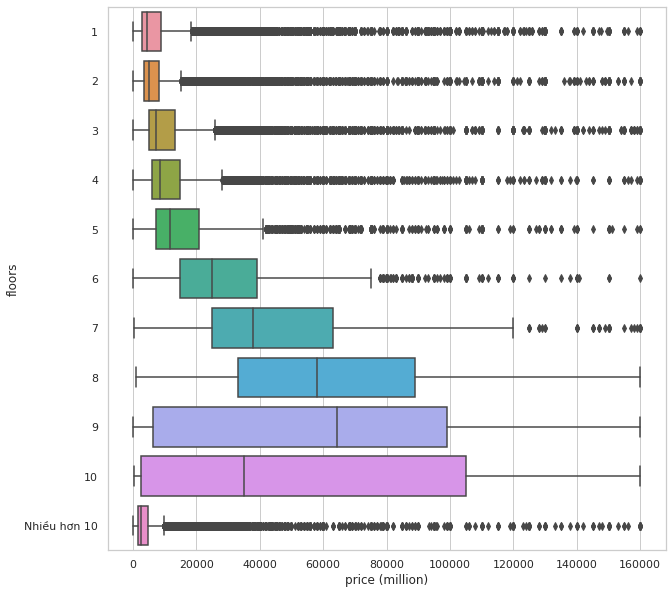

In [125]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df7[BDS_df7['price (million)'] <=
            price_mark], y="floors", x="price (million)", orient='h')


In [126]:
BDS_df7['floors'].replace({'Nhiều hơn 10': 11}, inplace=True)


In [127]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)


In [128]:
floors = imputer.fit_transform(BDS_df7[['floors', 'price (million)']])


In [129]:
floors = [int(x[0]) if x[0] <= 10 else 'Nhiều hơn 10' for x in floors]


In [130]:
BDS_df7['floors'] = floors
# Chuyển floors về dạng category
BDS_df7['floors'] = BDS_df7['floors'].astype('category')


<AxesSubplot:xlabel='floors', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='floors', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

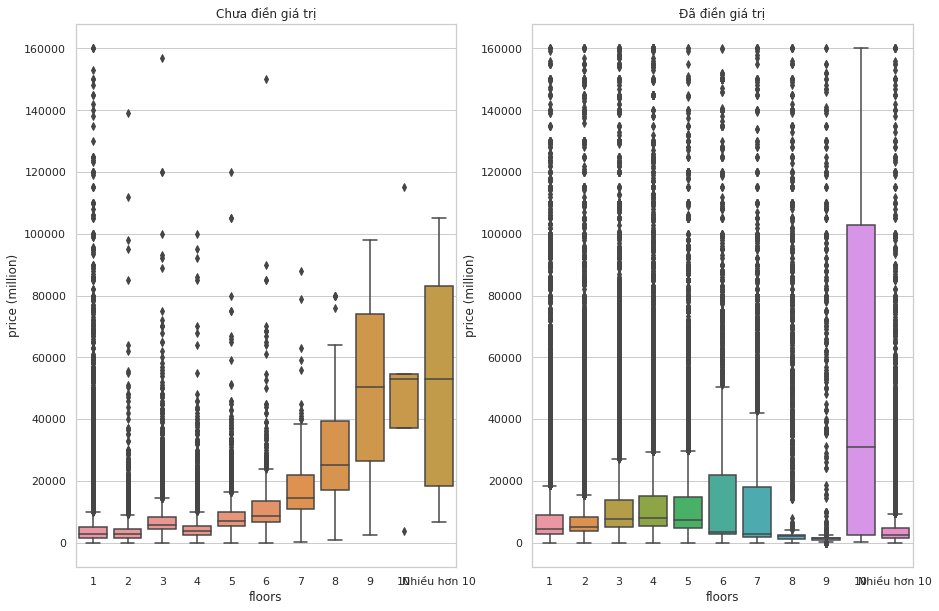

In [131]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="floors", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df7[BDS_df7['price (million)'] <= price_mark],
            x="floors", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [209]:
BDS_df7.to_csv('data version/BDS_df7.csv', index=False)


### DF7


In [210]:
BDS_df7 = pd.read_csv('data version/BDS_df7.csv')


### rooms


In [172]:
BDS_df8 = BDS_df7.copy()


In [173]:
BDS_df8['rooms'].unique()


array(['2', '1', '3', '4', '10', '8', '6', '9', '5', '7', 'Nhiều hơn 10',
       nan, 3.0, 18.0, 24.0, 2.0, 4.0, 35.0, 1.0, 30.0, 5.0, 8.0, 6.0,
       22.0, 12.0, 54.0, 68.0, 36.0, 10.0, 7.0, 20.0, 55.0, 14.0, 16.0,
       15.0, 13.0, 9.0, 25.0, 17.0, 32.0, 28.0, 11.0, 21.0, 27.0, 95.0,
       19.0, 37.0, 60.0, 40.0, 62.0, 50.0, 120.0, 42.0, 100.0, 33.0, 23.0,
       29.0, 72.0, 45.0, 58.0, 31.0, 192.0, 26.0, 44.0, 160.0, 48.0, 65.0,
       74.0, 34.0, 41.0, 39.0, 80.0, 43.0, 104.0, 46.0, 51.0, 89.0, 84.0,
       63.0, 61.0, 56.0, 105.0, 71.0, 67.0, 70.0, 85.0, 88.0, 111.0,
       101.0, 150.0, 123.0, 90.0, 373.0, 145.0, 114.0, 57.0, 66.0, 75.0,
       115.0, 94.0, 49.0, 69.0, 162.0, 102.0, 52.0, 110.0, 195.0, 170.0,
       64.0, 76.0, 128.0, 86.0, 53.0, 81.0, 38.0, 140.0, 98.0, 200.0,
       424.0, 73.0, 307.0, 47.0, 92.0, 193.0, 300.0, 96.0, 79.0, 277.0,
       87.0, 333.0, 124.0, 138.0, 78.0], dtype=object)

In [174]:
BDS_df8['rooms'] = BDS_df8['rooms'].apply(
    DPP.convertNum2Int, convert_dtype=False)


In [175]:
# Chuyển rooms về dạng category
BDS_df8['rooms'] = BDS_df8['rooms'].astype('category')


In [176]:
rooms = list(BDS_df8['rooms'].unique())
rooms.remove('Nhiều hơn 10')


In [177]:
rooms = np.array(rooms)
# Gom nhóm các giá trị có số phòng nhiều hơn 10
BDS_df8['rooms'].replace(rooms[rooms > 10], 'Nhiều hơn 10', inplace=True)


In [180]:
BDS_df8['rooms'].replace({'Nhiều hơn 10': 11}, inplace=True)


In [181]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)


In [182]:
rooms = imputer.fit_transform(BDS_df8[['rooms', 'price (million)']])


In [183]:
rooms = [int(x[0]) if x[0] <= 10 else 'Nhiều hơn 10' for x in rooms]


In [184]:
BDS_df8['rooms'] = rooms
# Chuyển rooms về dạng category
BDS_df8['rooms'] = BDS_df8['rooms'].astype('category')


<AxesSubplot:xlabel='rooms', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='rooms', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

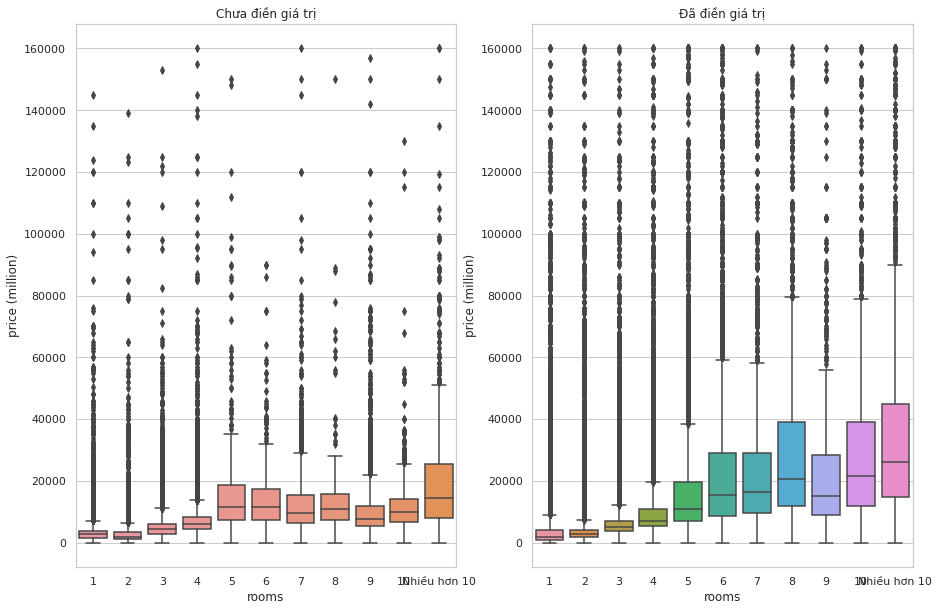

In [185]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="rooms", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df8[BDS_df8['price (million)'] <= price_mark],
            x="rooms", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


### list time


In [186]:
BDS_df8['list_time'] = pd.to_datetime(BDS_df8['list_time'], format="%d/%m/%Y")


In [187]:
BDS_df8['list_time'].sample(5)


9278     2021-11-03
195473   2021-11-07
150697   2021-11-04
44447    2021-11-02
27458    2021-10-22
Name: list_time, dtype: datetime64[ns]

In [211]:
BDS_df8.to_csv('data version/BDS_df8.csv', index=False)


### DF8


In [3]:
BDS_df8 = pd.read_csv('data version/BDS_df8.csv')


## 3.1 Overview


In [ ]:
BDS_df8.drop(["floornumber", "balconydirection", "property_status",
              "furnishing_sell"], axis=1, inplace=True)


In [235]:
BDS_df9 = BDS_df8.copy()
BDS_df9.dropna(inplace=True)


In [4]:
BDS_df9.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168677 entries, 0 to 168676
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   list_time                168677 non-null  datetime64[ns]
 1   ward                     168677 non-null  object        
 2   area                     168677 non-null  object        
 3   region                   168677 non-null  object        
 4   direction                168677 non-null  category      
 5   property_legal_document  168677 non-null  category      
 6   size (m2)                168677 non-null  float64       
 7   rooms                    168677 non-null  category      
 8   toilets                  168677 non-null  category      
 9   floors                   168677 non-null  category      
 10  living_size (m2)         168677 non-null  float64       
 11  width (m)                168677 non-null  float64       
 12  length (m)      

In [7]:
BDS_df9.describe(include='all')


list_time       ward         area       region direction  \
count                168677     168677       168677       168677    168677   
unique                  326        442           44            3         8   
top     2021-11-07 00:00:00  Phường 12  Quận Gò Vấp  Hồ Chí Minh  Đông Nam   
freq                  21205       5513        16671       140650    130093   
first   2020-05-15 00:00:00        NaN          NaN          NaN       NaN   
last    2021-11-08 00:00:00        NaN          NaN          NaN       NaN   
mean                    NaN        NaN          NaN          NaN       NaN   
std                     NaN        NaN          NaN          NaN       NaN   
min                     NaN        NaN          NaN          NaN       NaN   
25%                     NaN        NaN          NaN          NaN       NaN   
50%                     NaN        NaN          NaN          NaN       NaN   
75%                     NaN        NaN          NaN          NaN       NaN   
max                     NaN        NaN          NaN          NaN       NaN   

       property_legal_document     size (m2)   rooms toilets        floors  \
count                   168677  1.686770e+05  168677  168677        168677   
unique                       3           NaN      11       7            11   
top                   Đã có sổ           NaN       2       2  Nhiều hơn 10   
freq                    160940           NaN   55497   44244         37798   
first                      NaN           NaN     NaN     NaN           NaN   
last                       NaN           NaN     NaN     NaN           NaN   
mean                       NaN  1.117977e+04     NaN     NaN           NaN   
std                        NaN  2.393475e+06     NaN     NaN           NaN   
min                        NaN  1.000000e+00     NaN     NaN           NaN   
25%                        NaN  5.400000e+01     NaN     NaN           NaN   
50%                        NaN  8.000000e+01     NaN     NaN           NaN   
75%                        NaN  1.320000e+02     NaN     NaN           NaN   
max                        NaN  7.500000e+08     NaN     NaN           NaN   

        living_size (m2)      width (m)     length (m)  price (million)  \
count       1.686770e+05  168677.000000  168677.000000     1.686770e+05   
unique               NaN            NaN            NaN              NaN   
top                  NaN            NaN            NaN              NaN   
freq                 NaN            NaN            NaN              NaN   
first                NaN            NaN            NaN              NaN   
last                 NaN            NaN            NaN              NaN   
mean        1.030562e+05      13.820446      29.957162     1.034132e+07   
std         2.377864e+07     798.762190     592.375751     4.242249e+09   
min         1.000000e+00       0.130000       0.011790     3.700000e-01   
25%         9.000000e+01       4.000000      12.000000     2.850000e+03   
50%         1.800000e+02       5.000000      16.500000     5.300000e+03   
75%         4.200000e+02       6.000000      21.000000     1.000000e+04   
max         7.500000e+09  315375.000000  135000.000000     1.742304e+12   

       type_real_estate    website     front_road  
count            168677     168677  168677.000000  
unique               16          2            NaN  
top       Nhà trong hẻm  alonhadat            NaN  
freq              76815      94640            NaN  
first               NaN        NaN            NaN  
last                NaN        NaN            NaN  
mean                NaN        NaN       8.166029  
std                 NaN        NaN       4.671439  
min                 NaN        NaN       0.000000  
25%                 NaN        NaN       5.000000  
50%                 NaN        NaN       7.000000  
75%                 NaN        NaN      10.000000  
max                 NaN        NaN      26.000000

In [6]:
BDS_df9.to_csv('BDS.csv', index=False)


In [3]:
BDS_df9['list_time'] = pd.to_datetime(BDS_df9['list_time'])
BDS_df9['direction'] = BDS_df9['direction'].astype('category')
BDS_df9['property_legal_document'] = BDS_df9['property_legal_document'].astype(
    'category')
BDS_df9['rooms'] = BDS_df9['rooms'].astype('category')
BDS_df9['toilets'] = BDS_df9['toilets'].astype('category')
BDS_df9['floors'] = BDS_df9['floors'].astype('category')


In [2]:
BDS_df9 = pd.read_csv('BDS.csv')


In [4]:
BDS_df10 = BDS_df9.copy()


## 3.2 Numeric variables


<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

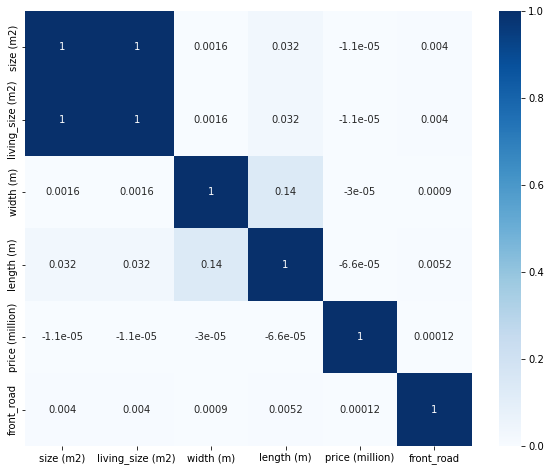

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=BDS_df9.corr(), cmap="Blues", annot=True)


### Price


In [6]:
BDS_df9['price (million)'].describe()


count    1.686770e+05
mean     1.034132e+07
std      4.242249e+09
min      3.700000e-01
25%      2.850000e+03
50%      5.300000e+03
75%      1.000000e+04
max      1.742304e+12
Name: price (million), dtype: float64

In [7]:
price_mark = BDS_df9['price (million)'].quantile(0.99)
price_mark


120000.0

In [8]:
outlier_df = BDS_df9[BDS_df9['price (million)'] > price_mark].reset_index(
    drop=True)


In [9]:
BDS_df9 = BDS_df9[~(BDS_df9['price (million)'] > price_mark)
                  ].reset_index(drop=True)


In [10]:
BDS_df9.shape


(167053, 17)

<AxesSubplot:>

Text(0.5, 1.0, 'Các giá trị trong vùng quan sát')

<AxesSubplot:>

Text(0.5, 1.0, 'Các giá trị outlier')

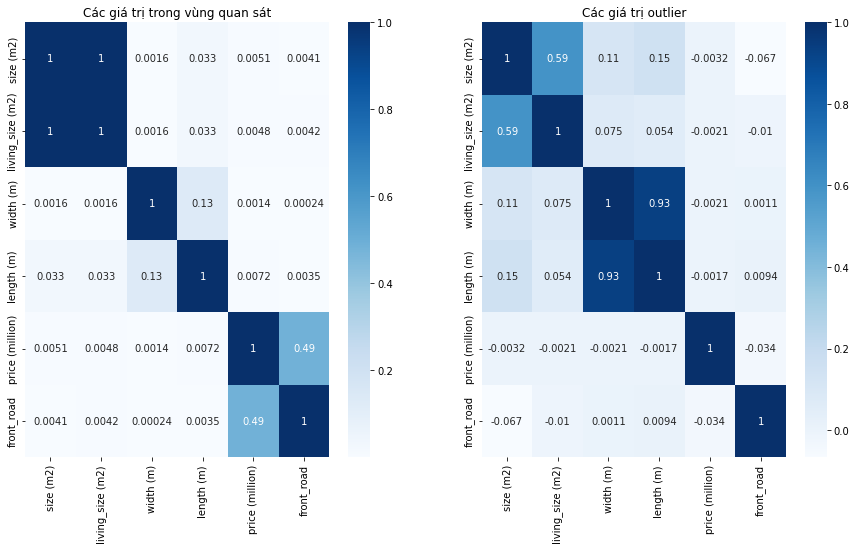

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.heatmap(data=BDS_df9.corr(), cmap="Blues", annot=True, ax=axes[0])
axes[0].set_title("Các giá trị trong vùng quan sát")
sns.heatmap(data=outlier_df.corr(), cmap="Blues", annot=True, ax=axes[1])
axes[1].set_title("Các giá trị outlier")


<div> => Đối với các giá trị nằm trong vùng quan sát của dữ liệu, chiều rộng mặt đường có ảnh hưởng đồng biến đến giá bất động sản. Diện tích đất và diện tích sử dụng có mối quan hệ hoàn toàn đồng biến</div>
<div>  </div>


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Sự phân bố giá bất động sản')

<AxesSubplot:title={'center':'Sự phân bố giá bất động sản'}, xlabel='price (million)', ylabel='Count'>

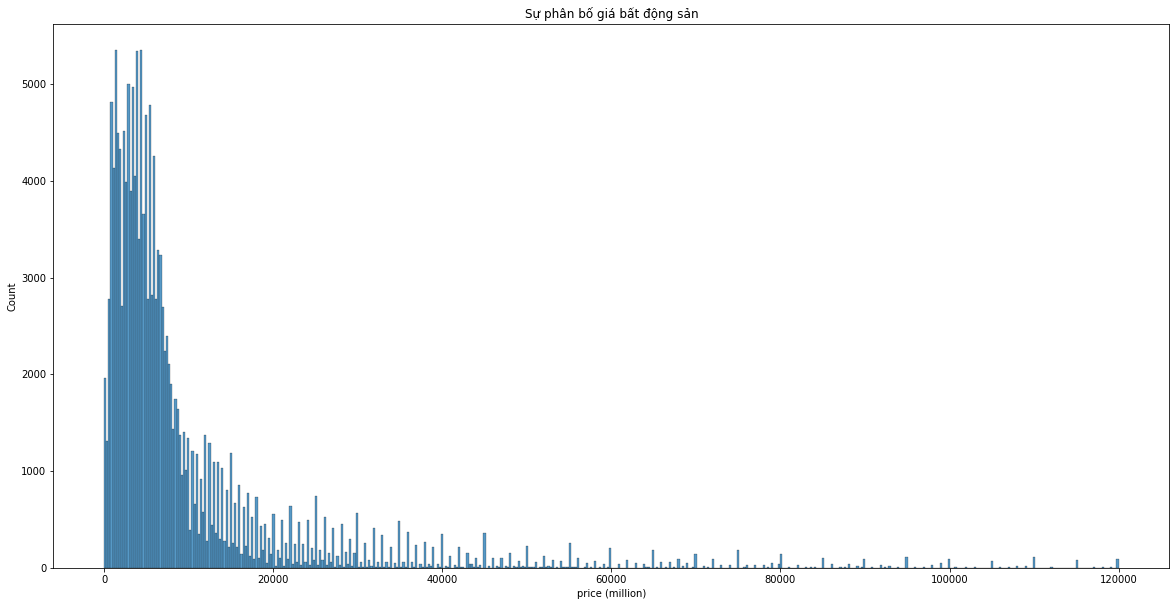

In [12]:
plt.figure(figsize=(20, 10))
plt.title("Sự phân bố giá bất động sản")
sns.histplot(data=BDS_df9, x="price (million)")


In [13]:
outlier_df['price (million)'].describe()


count    1.624000e+03
mean     1.073129e+09
std      4.323455e+10
min      1.210000e+05
25%      1.500000e+05
50%      1.850000e+05
75%      2.850000e+05
max      1.742304e+12
Name: price (million), dtype: float64

In [14]:
# sns.histplot(data=outlier_df, x="price (million)")


In [15]:
# plt.figure(figsize=(10, 10))
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# sns.histplot(data=BDS_df9, x="price (million)", ax=axes[0])
# axes[0].set_title("Các giá trị trong vùng quan sát")
# sns.histplot(data=outlier_df, x="price (million)", ax=axes[1])
# axes[1].set_title("Các giá trị outlier)


=> Giá bất động sản phân bổ chủ yếu trong khoảng dưới 11 tỷ đồng


In [16]:
group_price = ['Giá rẻ', 'Tầm trung', 'Cao cấp', 'Siêu cao cấp']
# Giá rẻ :0 - 2 tỷ
# Tầm trung: 2 - 5 tỷ
# Cao cấp: 5 - 20 tỷ
# Siêu cao cấp: trên 20 tỷ
bins_price = [0, 2000, 5000, 20000, max(BDS_df9['price (million)'])]
BDS_df9['price-binned'] = pd.cut(BDS_df9['price (million)'],
                                 bins=bins_price, labels=group_price)


In [17]:
BDS_df9['price-binned'].value_counts()


Cao cấp         68704
Tầm trung       51571
Giá rẻ          29177
Siêu cao cấp    17601
Name: price-binned, dtype: int64

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Số lượng giá bất động sản theo phân khúc sản phẩm')

<AxesSubplot:title={'center':'Số lượng giá bất động sản theo phân khúc sản phẩm'}, xlabel='price-binned', ylabel='count'>

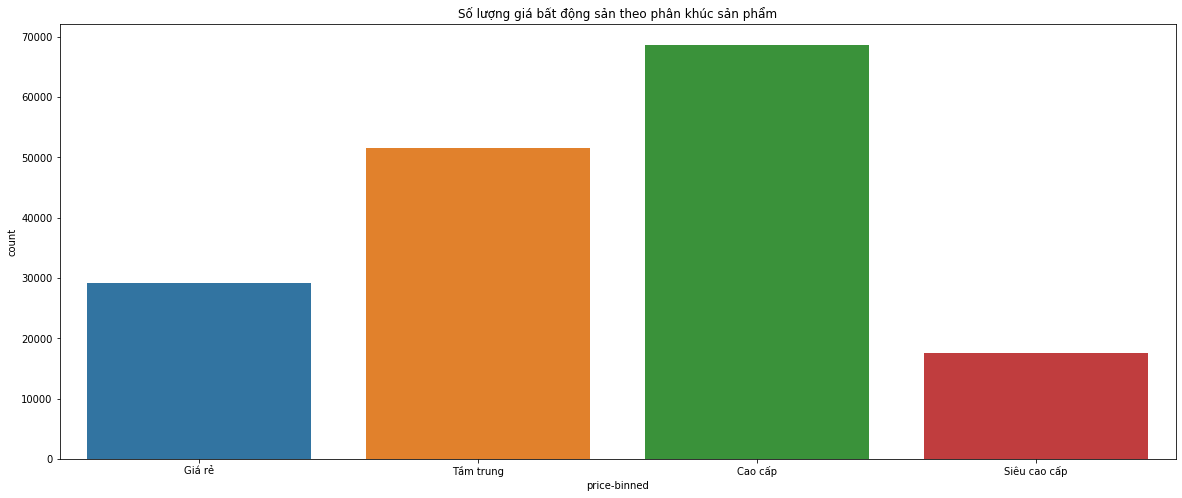

In [18]:
plt.figure(figsize=(20, 8))
plt.title("Số lượng giá bất động sản theo phân khúc sản phẩm")
sns.countplot(x='price-binned', data=BDS_df9)


=> Phân khúc giá BĐS tập trung chủ yếu là các BĐS tầm trung và cao cấp


## 3.3 Categorical variables


In [19]:
cate_var = [col for col in BDS_df9.columns if BDS_df9[col].dtype != "float"][:-1]
cate_var


['list_time',
 'ward',
 'area',
 'region',
 'direction',
 'property_legal_document',
 'rooms',
 'toilets',
 'floors',
 'type_real_estate',
 'website']

### Website


In [20]:
BDS_df9['website'].unique()


array(['Chotot', 'alonhadat'], dtype=object)

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Phân khúc giá bất động sản trên website')

<AxesSubplot:title={'center':'Phân khúc giá bất động sản trên website'}, xlabel='website', ylabel='price (million)'>

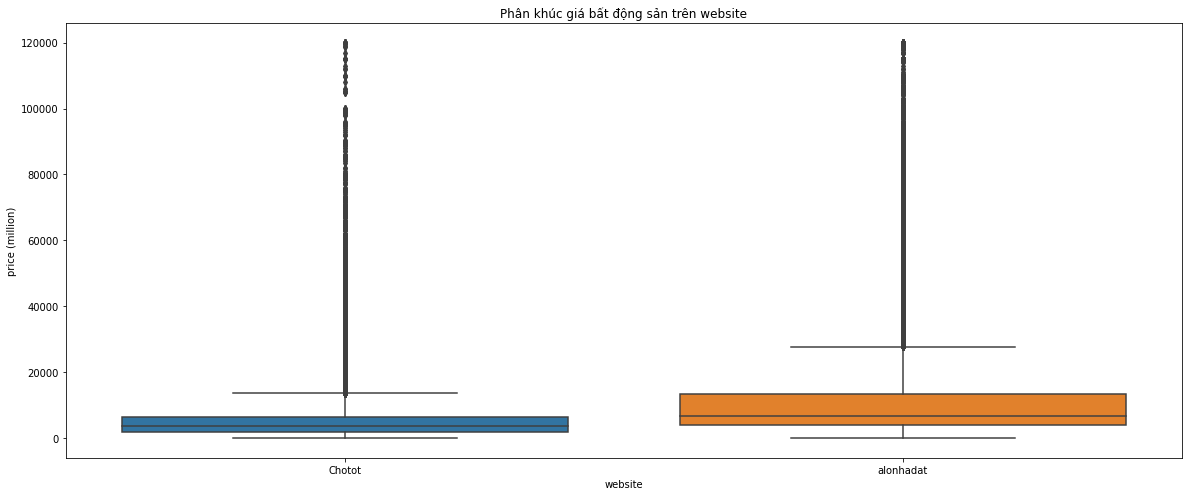

In [21]:
plt.figure(figsize=(20, 8))
plt.title("Phân khúc giá bất động sản trên website")
sns.boxplot(x='website', y='price (million)',
              data=BDS_df9)


<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Phân khúc giá bất động sản trên website')

<AxesSubplot:title={'center':'Phân khúc giá bất động sản trên website'}, xlabel='website', ylabel='count'>

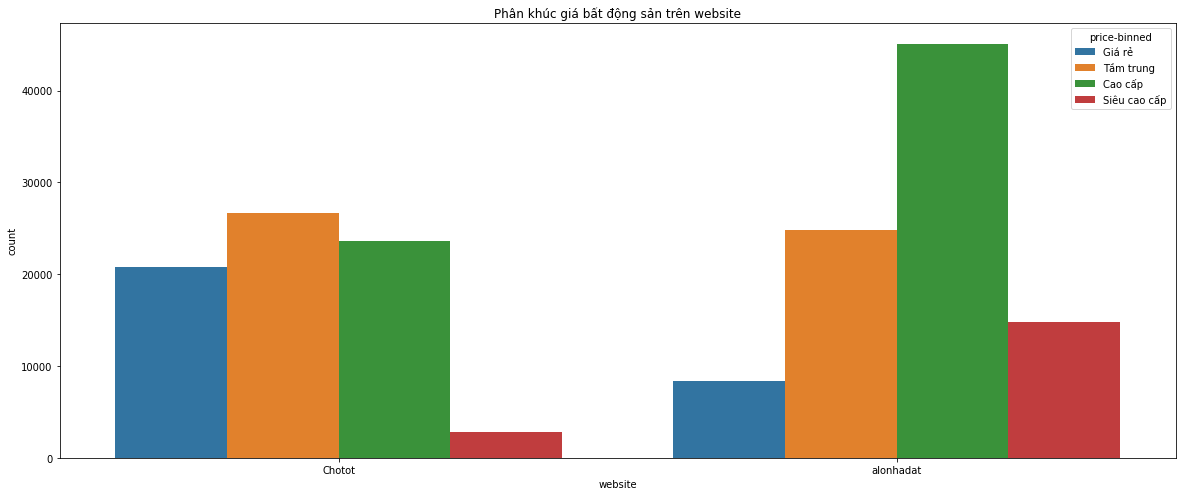

In [22]:
plt.figure(figsize=(20, 8))
plt.title("Phân khúc giá bất động sản trên website")
sns.countplot(x='website', hue='price-binned',
              data=BDS_df9)


<div> => Chotot tập trung chủ yếu các BĐS giá rẻ, tầm trung và cao cấp. Các BĐS siêu cao cấp chỉ chiếm thị phần nhỏ </div>
<div> => alonhadat chủ yếu được đăng bán các sản phẩm cao cấp </div>


### **Region, area, ward**


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (million)'>

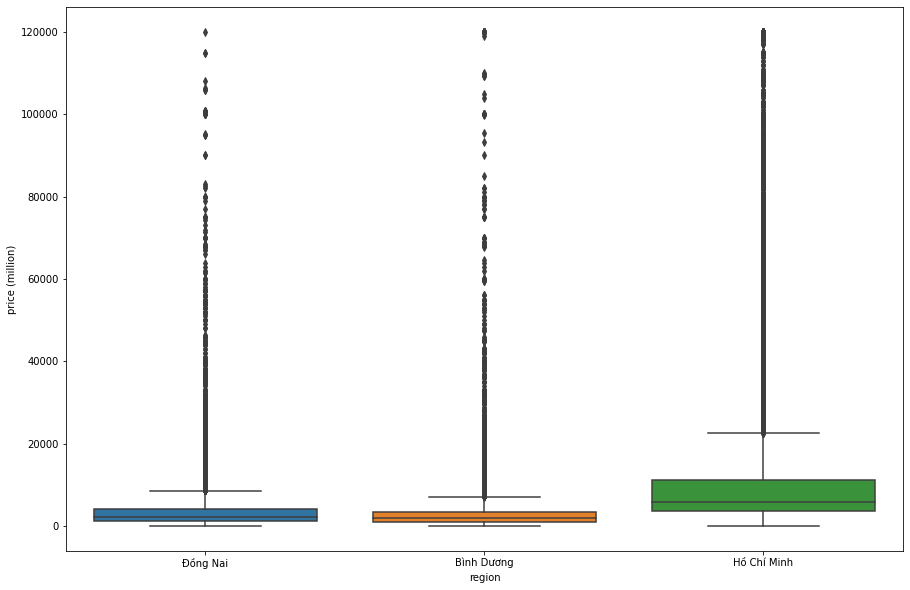

In [23]:
plt.figure(figsize=(15, 10))
# sns.countplot(x='region',data=BDS_df1)
sns.boxplot(x='region', y='price (million)',
            data=BDS_df9)


=> Ta nhận thấy rằng các BĐS ở khu vực Tp Hồ Chí Minh có sự đa dạng về phân khúc hơn so với Bình Dương, Đồng Nai.


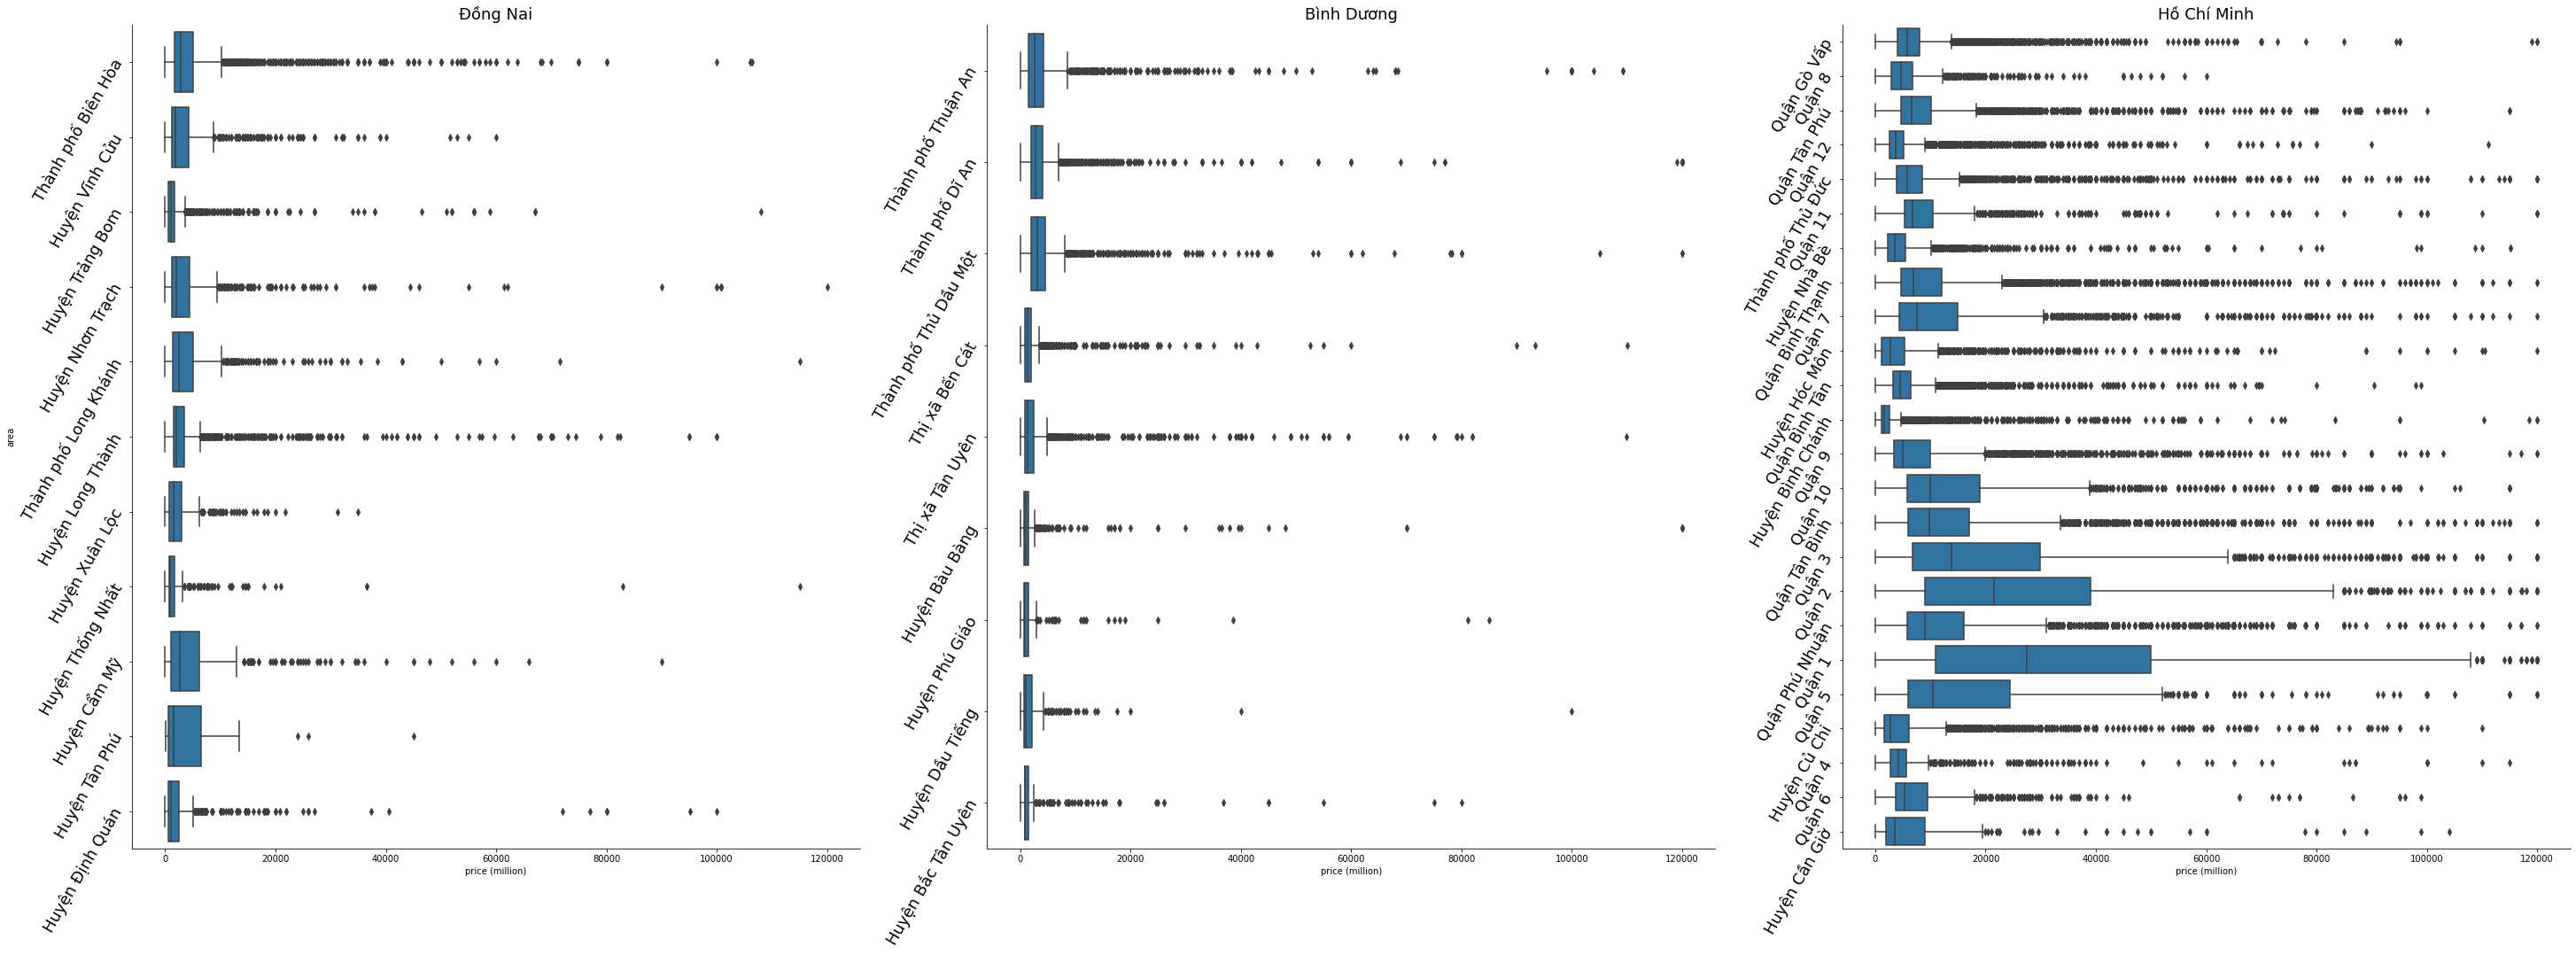

In [24]:
g = sns.FacetGrid(BDS_df9, col='region', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (million)', 'area', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

g.set_yticklabels(rotation=60, fontsize=18)

g.fig.tight_layout()
plt.show()


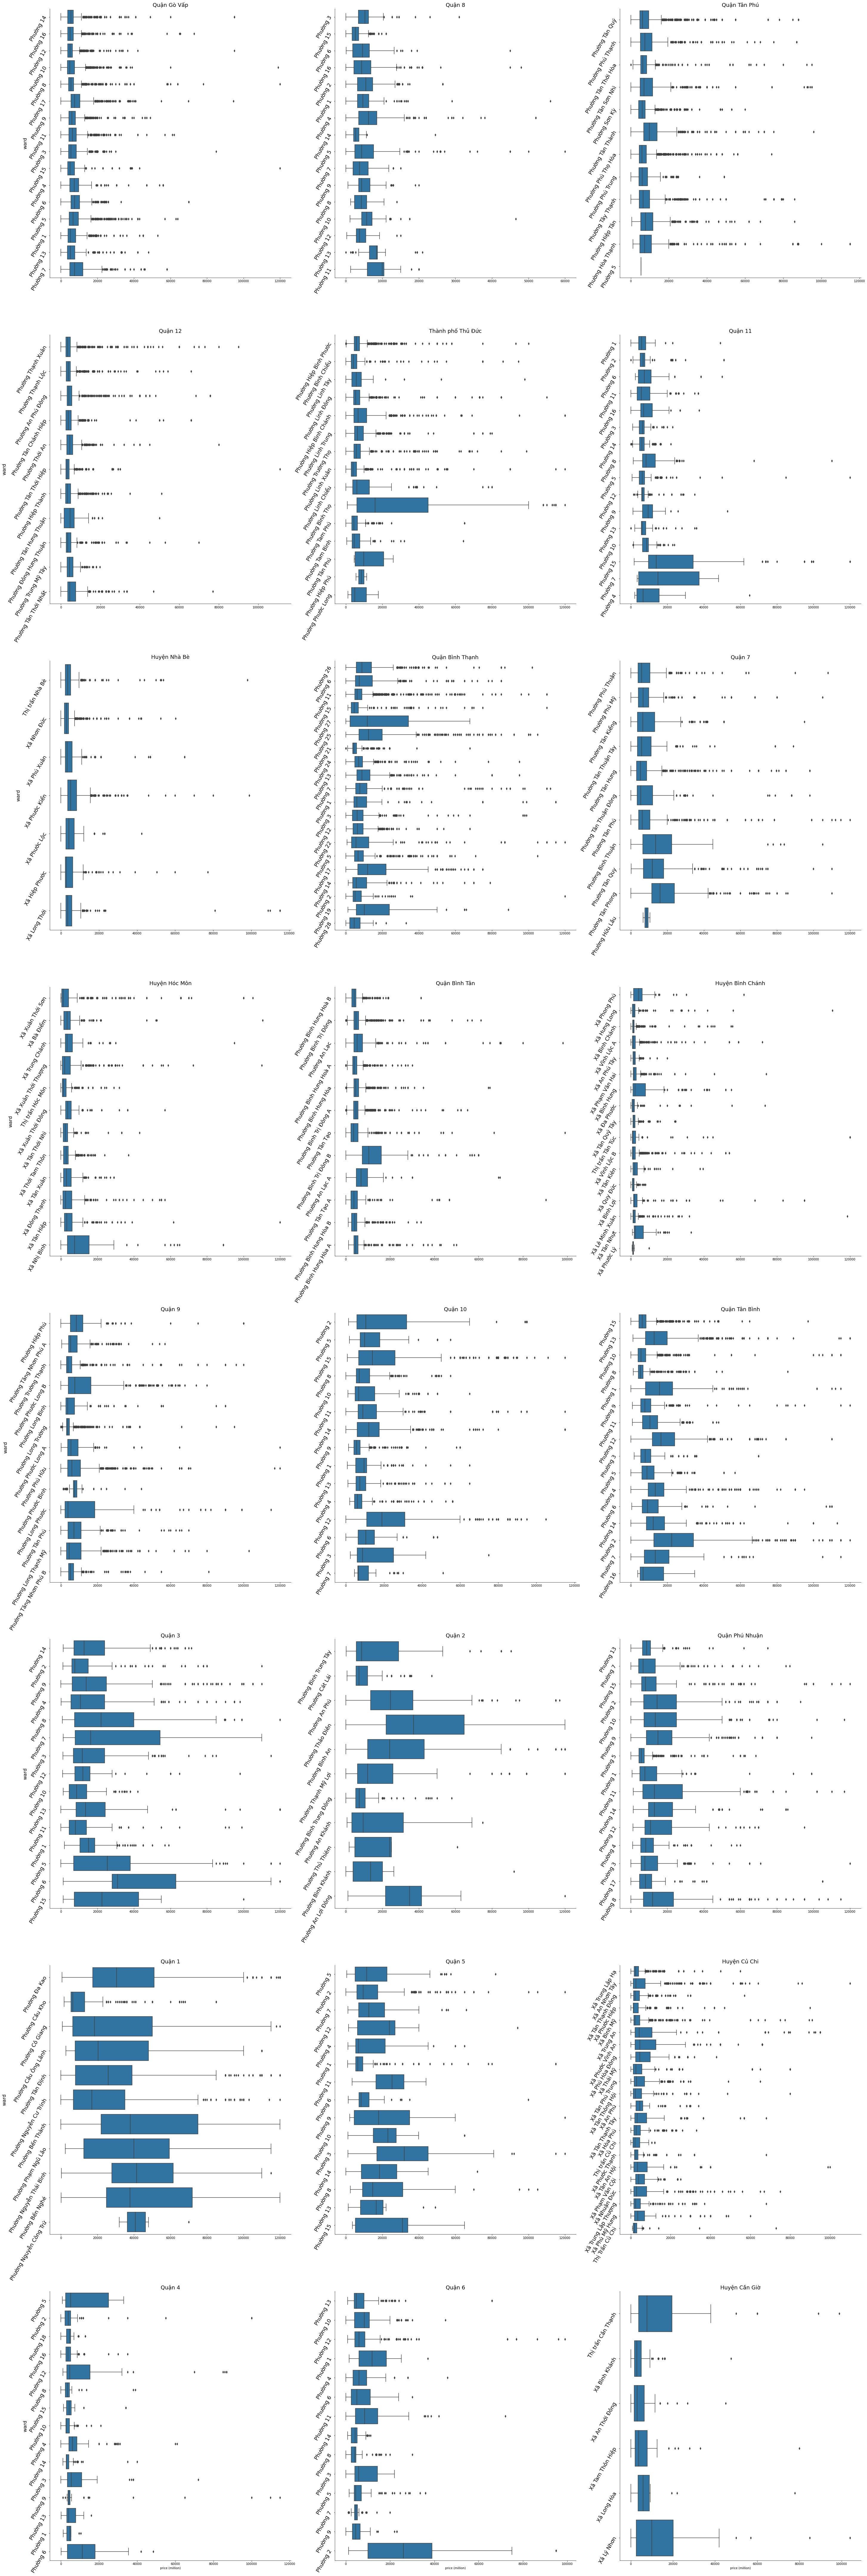

In [25]:
g = sns.FacetGrid(BDS_df9[BDS_df9['region'] == 'Hồ Chí Minh'], col='area', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (million)', 'ward', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_xticklabels(fontsize=18)
g.set_yticklabels(rotation=60, fontsize=18)
g.set_ylabels(fontsize=16)


g.fig.tight_layout()
plt.show()


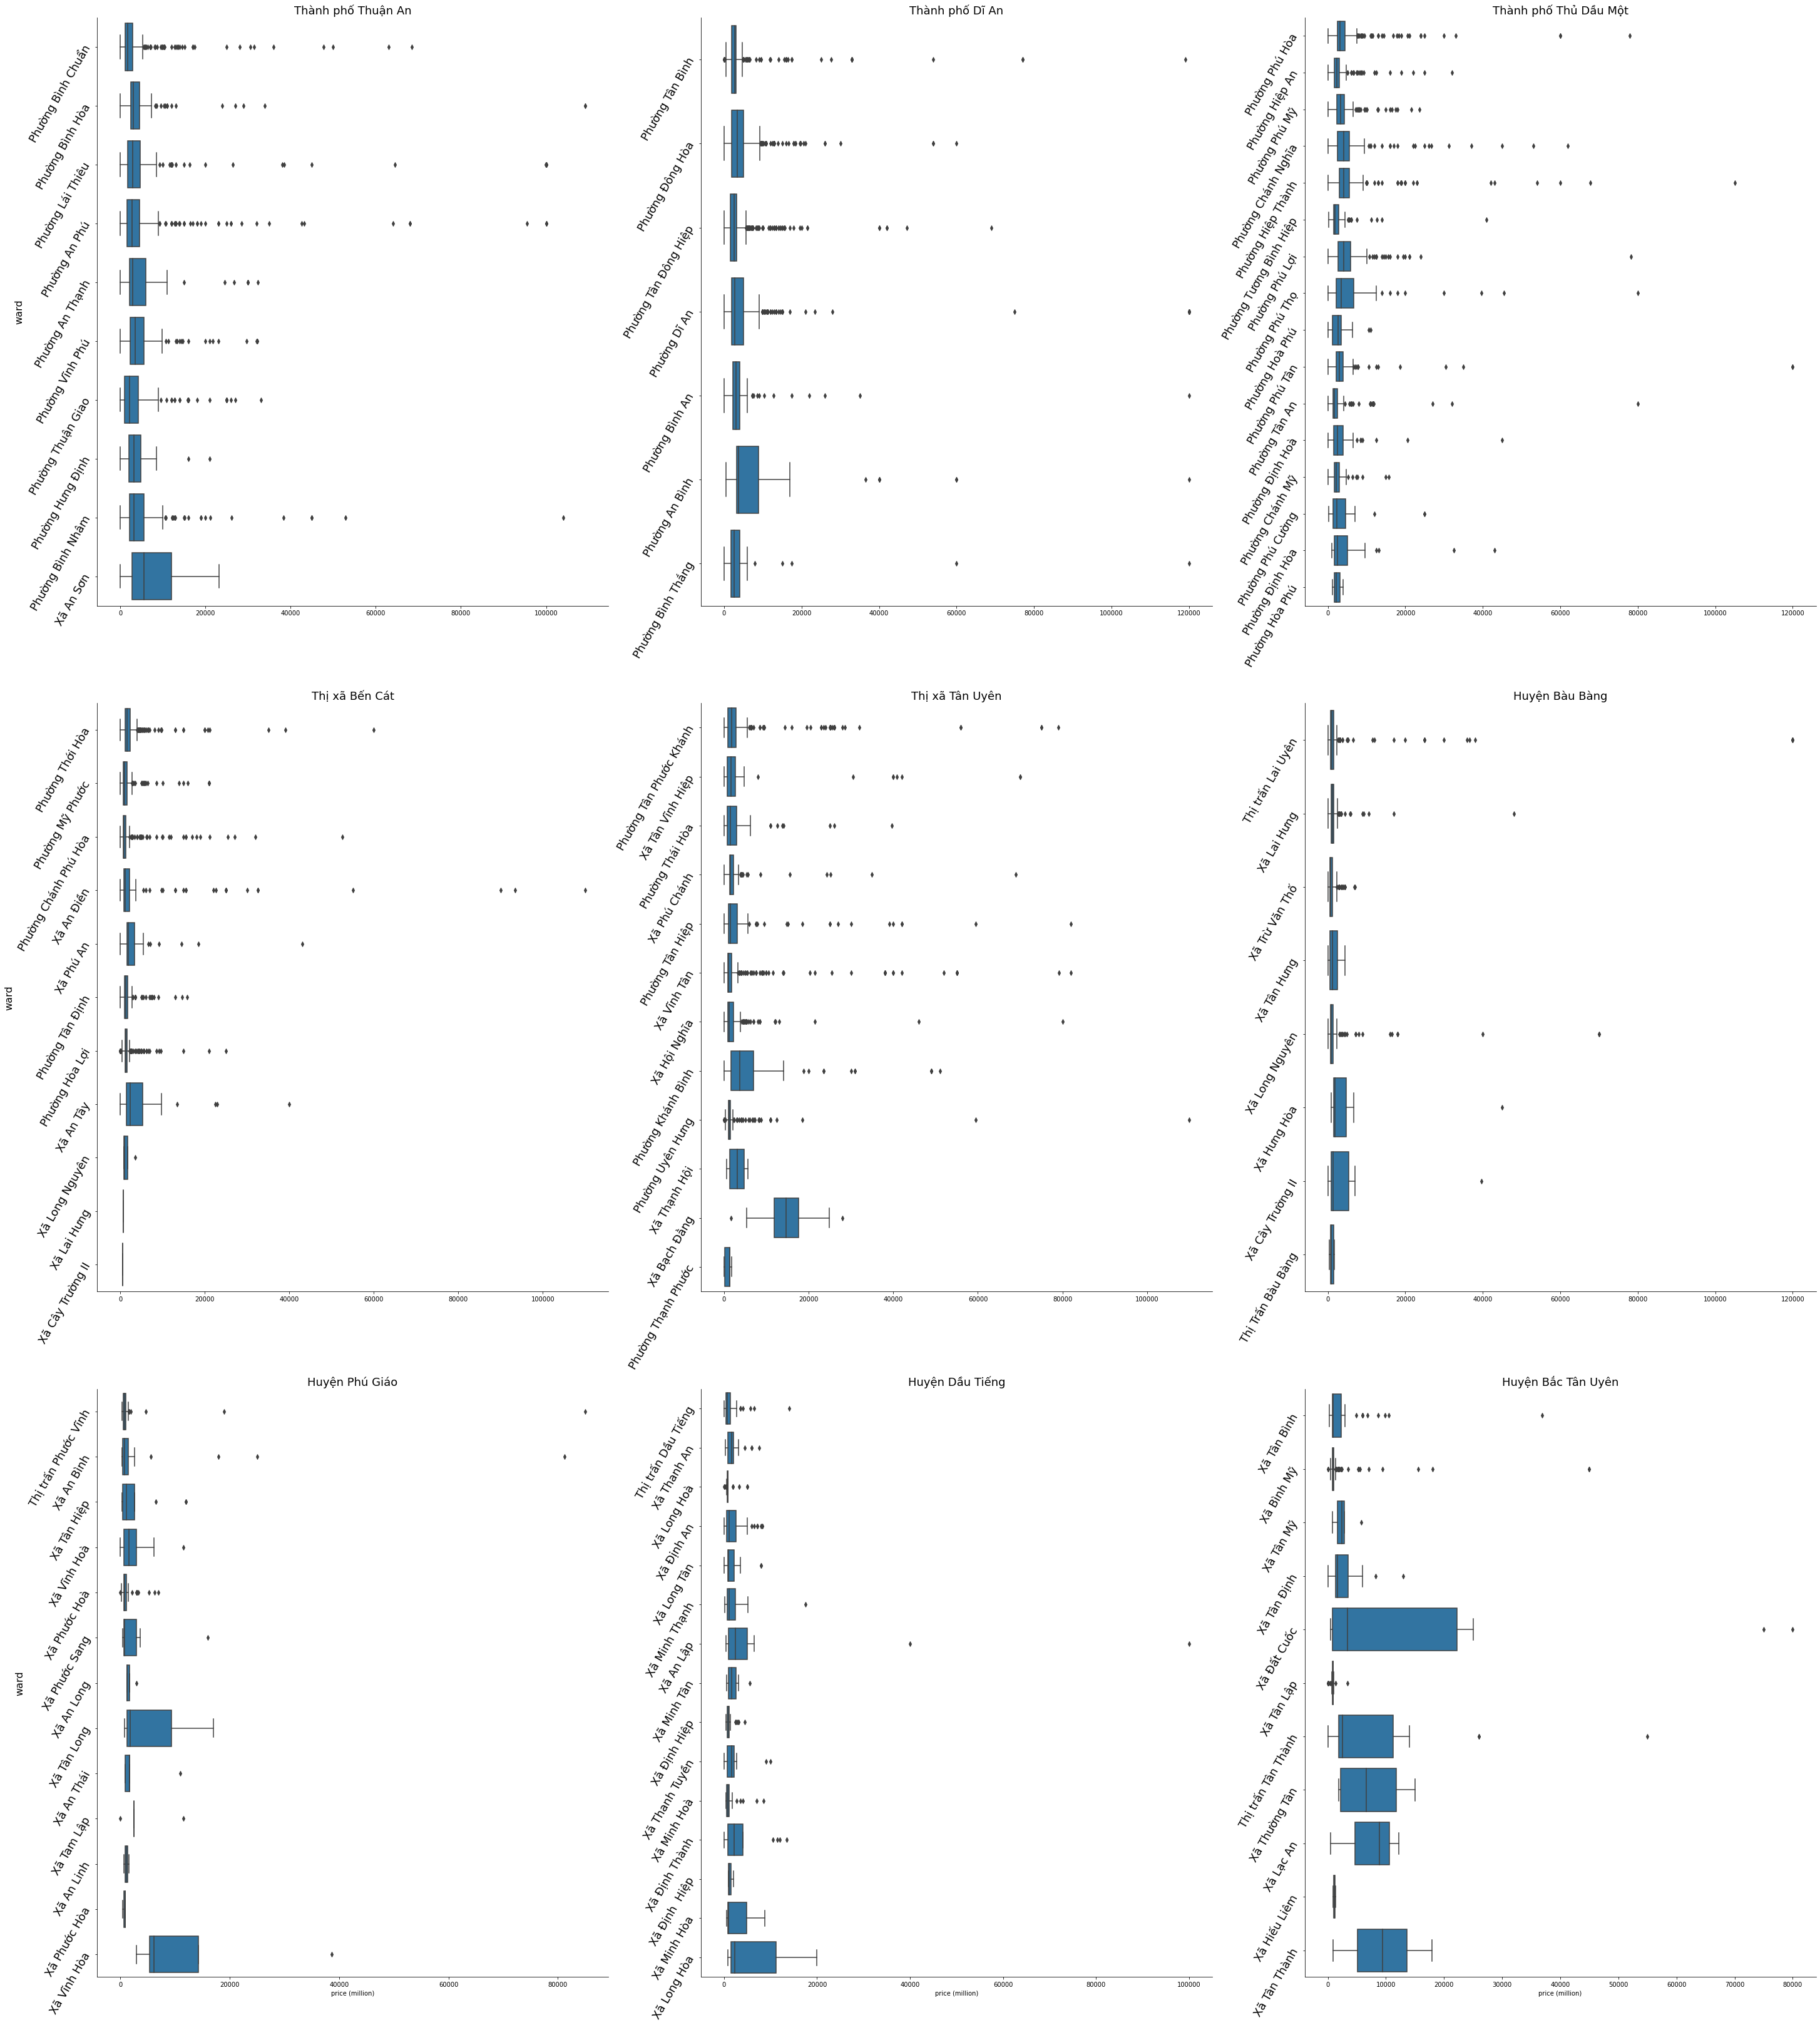

In [26]:
g = sns.FacetGrid(BDS_df9[BDS_df9['region'] == 'Bình Dương'], col='area', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (million)', 'ward', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_xticklabels(fontsize=18)
g.set_yticklabels(rotation=60, fontsize=18)
g.set_ylabels(fontsize=16)


g.fig.tight_layout()
plt.show()


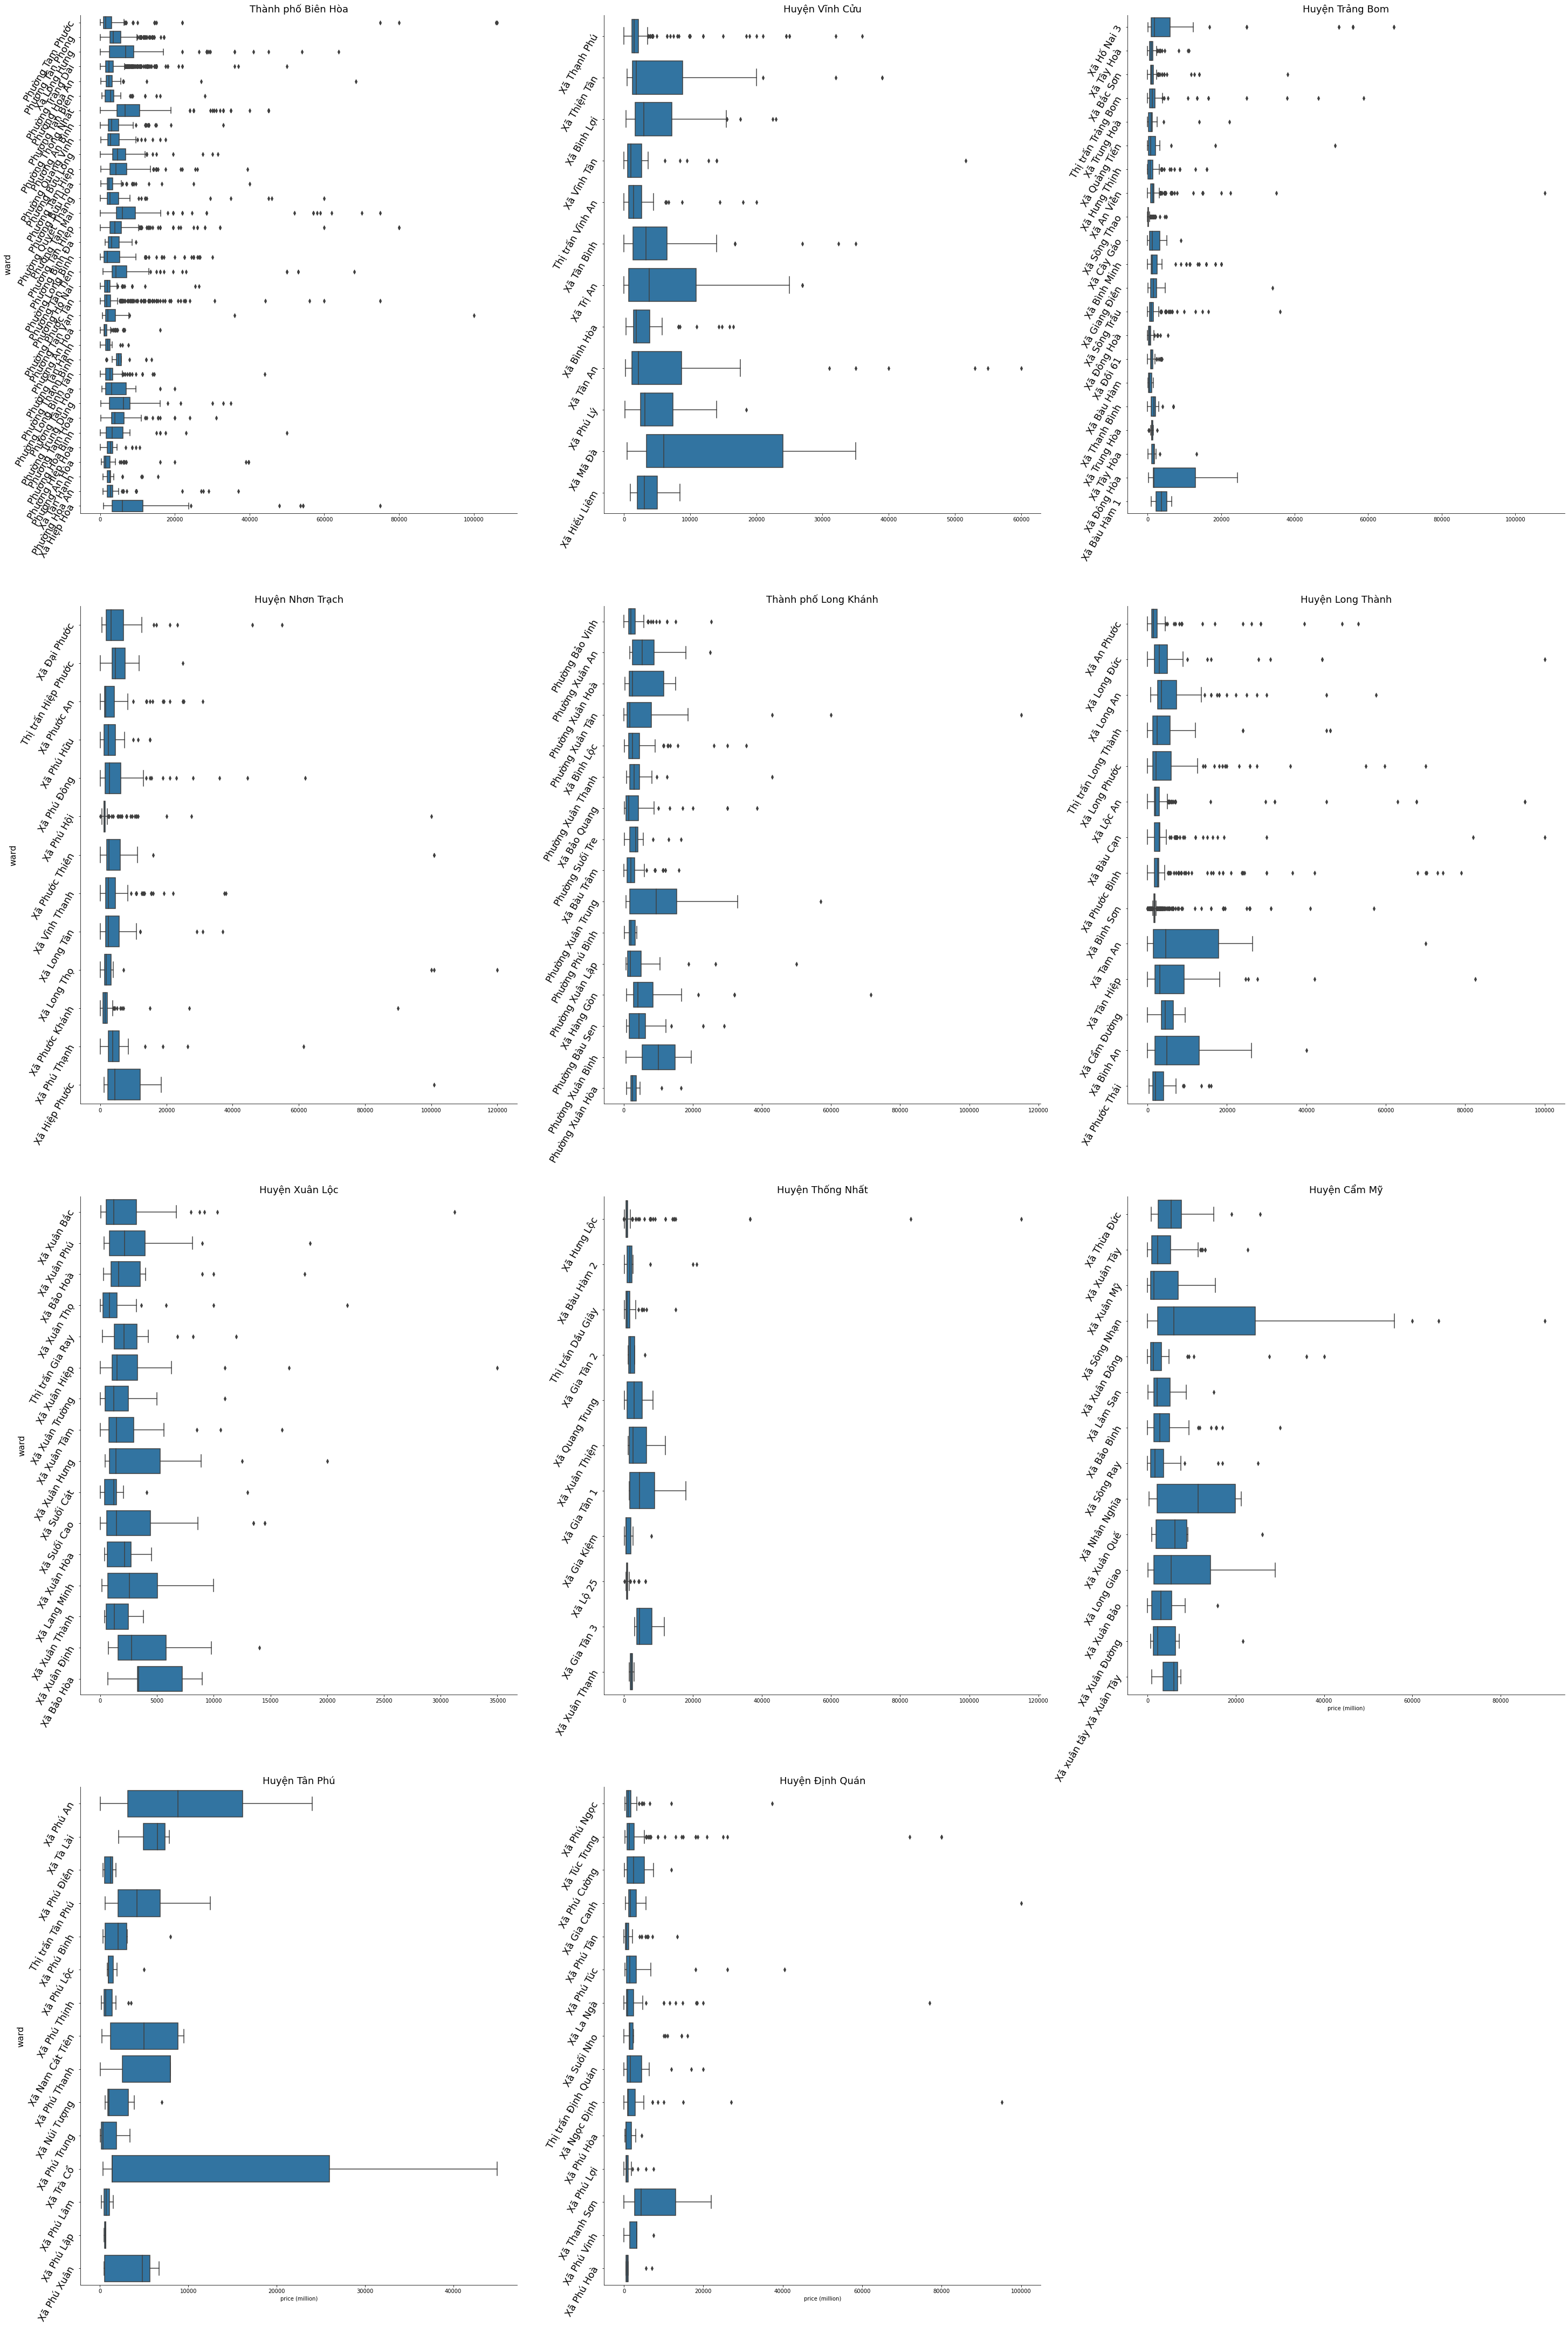

In [27]:
g = sns.FacetGrid(BDS_df9[BDS_df9['region'] == 'Đồng Nai'], col='area', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (million)', 'ward', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_xticklabels(fontsize=18)
g.set_yticklabels(rotation=60, fontsize=18)
g.set_ylabels(fontsize=16)


g.fig.tight_layout()
plt.show()


In [28]:
region_cols = ['ward', 'area', 'region', 'price (million)']
region_ = BDS_df10[region_cols].groupby(
    region_cols[1:-1], as_index=False).mean().sort_values(axis=0, by=['price (million)'], ignore_index=True)

region_


area       region  price (million)
0         Huyện Dầu Tiếng   Bình Dương     2.191175e+03
1         Huyện Trảng Bom     Đồng Nai     2.605925e+03
2          Huyện Xuân Lộc     Đồng Nai     2.765996e+03
3          Thị xã Bến Cát   Bình Dương     2.780815e+03
4          Huyện Bàu Bàng   Bình Dương     2.925462e+03
5      Huyện Bắc Tân Uyên   Bình Dương     3.359467e+03
6           Huyện Tân Phú     Đồng Nai     3.952871e+03
7        Huyện Thống Nhất     Đồng Nai     4.022555e+03
8        Huyện Bình Chánh  Hồ Chí Minh     4.306802e+03
9          Huyện Vĩnh Cửu     Đồng Nai     4.351245e+03
10     Thành phố Biên Hòa     Đồng Nai     4.864157e+03
11       Huyện Nhơn Trạch     Đồng Nai     5.172554e+03
12           Huyện Nhà Bè  Hồ Chí Minh     5.589627e+03
13  Thành phố Thủ Dầu Một   Bình Dương     5.599468e+03
14          Huyện Hóc Môn  Hồ Chí Minh     5.673252e+03
15                Quận 12  Hồ Chí Minh     5.782362e+03
16       Huyện Long Thành     Đồng Nai     6.069493e+03
17           Huyện Cẩm Mỹ     Đồng Nai     6.290538e+03
18     Thành phố Thuận An   Bình Dương     6.569773e+03
19           Huyện Củ Chi  Hồ Chí Minh     6.651136e+03
20          Quận Bình Tân  Hồ Chí Minh     6.680921e+03
21                 Quận 8  Hồ Chí Minh     6.777952e+03
22                 Quận 4  Hồ Chí Minh     6.783811e+03
23        Huyện Định Quán     Đồng Nai     7.395506e+03
24        Thị xã Tân Uyên   Bình Dương     7.626636e+03
25            Quận Gò Vấp  Hồ Chí Minh     7.865383e+03
26   Thành phố Long Khánh     Đồng Nai     8.235372e+03
27                 Quận 6  Hồ Chí Minh     8.602470e+03
28         Huyện Phú Giáo   Bình Dương     9.606220e+03
29      Thành phố Thủ Đức  Hồ Chí Minh     9.923488e+03
30                Quận 11  Hồ Chí Minh     1.011466e+04
31           Quận Tân Phú  Hồ Chí Minh     1.054237e+04
32        Thành phố Dĩ An   Bình Dương     1.134834e+04
33                 Quận 9  Hồ Chí Minh     1.134967e+04
34        Quận Bình Thạnh  Hồ Chí Minh     1.244737e+04
35          Huyện Cần Giờ  Hồ Chí Minh     1.246262e+04
36                 Quận 7  Hồ Chí Minh     1.339115e+04
37                Quận 10  Hồ Chí Minh     1.685421e+04
38         Quận Phú Nhuận  Hồ Chí Minh     1.729790e+04
39                 Quận 5  Hồ Chí Minh     2.062707e+04
40                 Quận 3  Hồ Chí Minh     3.788678e+04
41                 Quận 2  Hồ Chí Minh     3.938241e+04
42                 Quận 1  Hồ Chí Minh     6.522268e+04
43          Quận Tân Bình  Hồ Chí Minh     1.465996e+08

In [29]:
def convert_word2index(data, X, y):
    """
    Chuyển đổi các từ thành các trọng số dựa trên giá trị y trung bình
    """
    value = data[np.array([X, y]).flatten()].groupby(X,
                                                     as_index=False).mean().sort_values(axis=0, by=[y], ignore_index=True)
    w2idx = {}
    for i, v in enumerate(value[X]):
        w2idx[v] = i
    return w2idx


In [30]:
word2idx = {}
for v in ['ward', 'area', 'region']:
    word2idx[v] = convert_word2index(BDS_df10, v, 'price (million)')
    BDS_df10[v] = BDS_df10[v].replace(word2idx[v])


### **list time**


In [31]:
BDS_df9['year'] = BDS_df9['list_time'].dt.year
BDS_df9['month'] = BDS_df9['list_time'].dt.month


<Figure size 3600x1440 with 0 Axes>

<AxesSubplot:xlabel='list_time', ylabel='price (million)'>

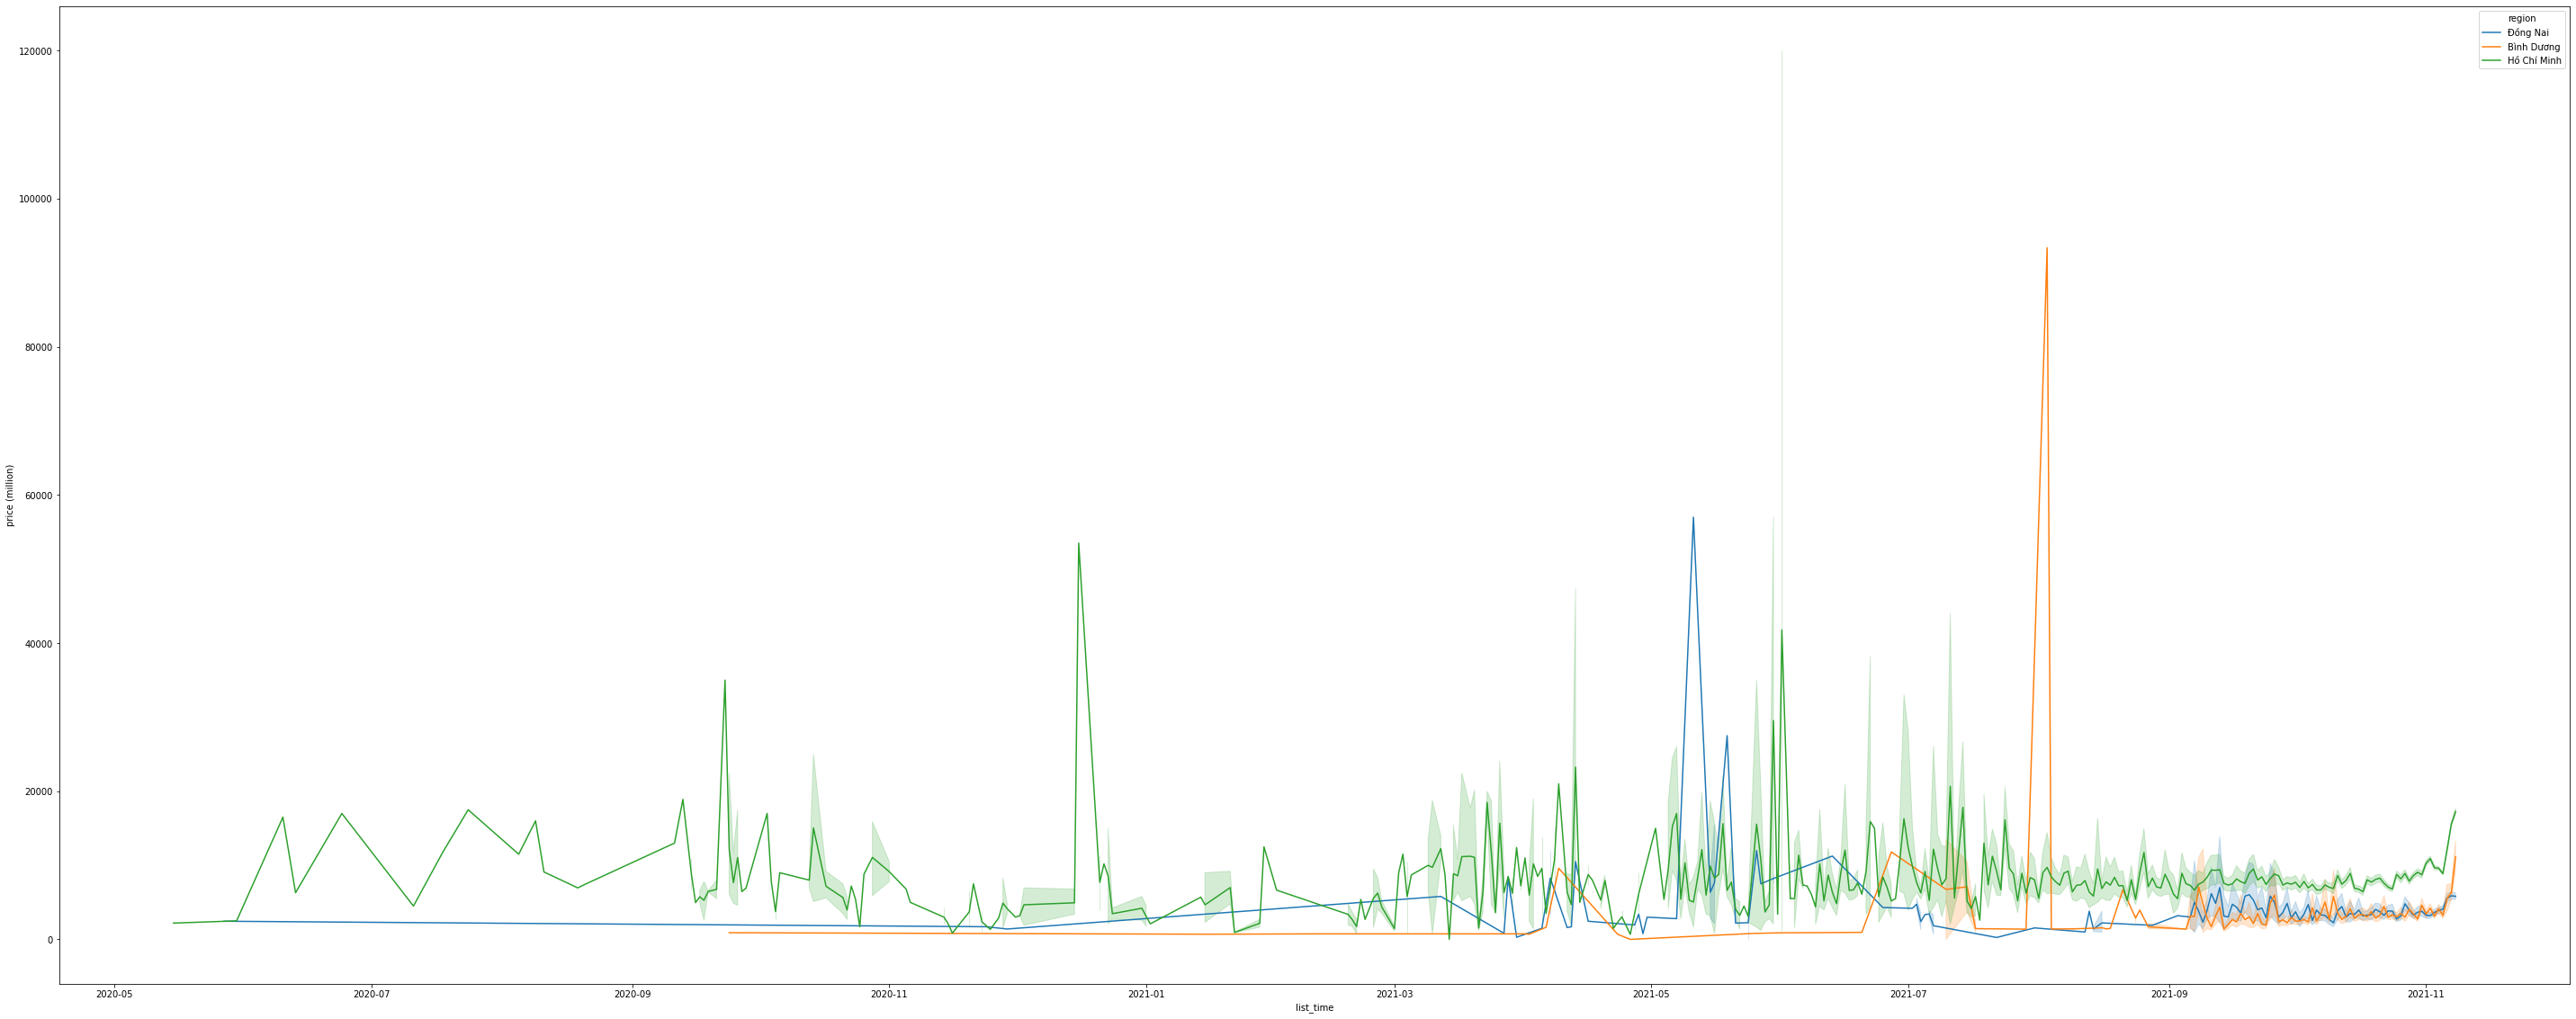

In [32]:
plt.figure(figsize=(50, 20))
sns.lineplot(data=BDS_df9, x="list_time",
             y="price (million)", hue="region", dashes=False)


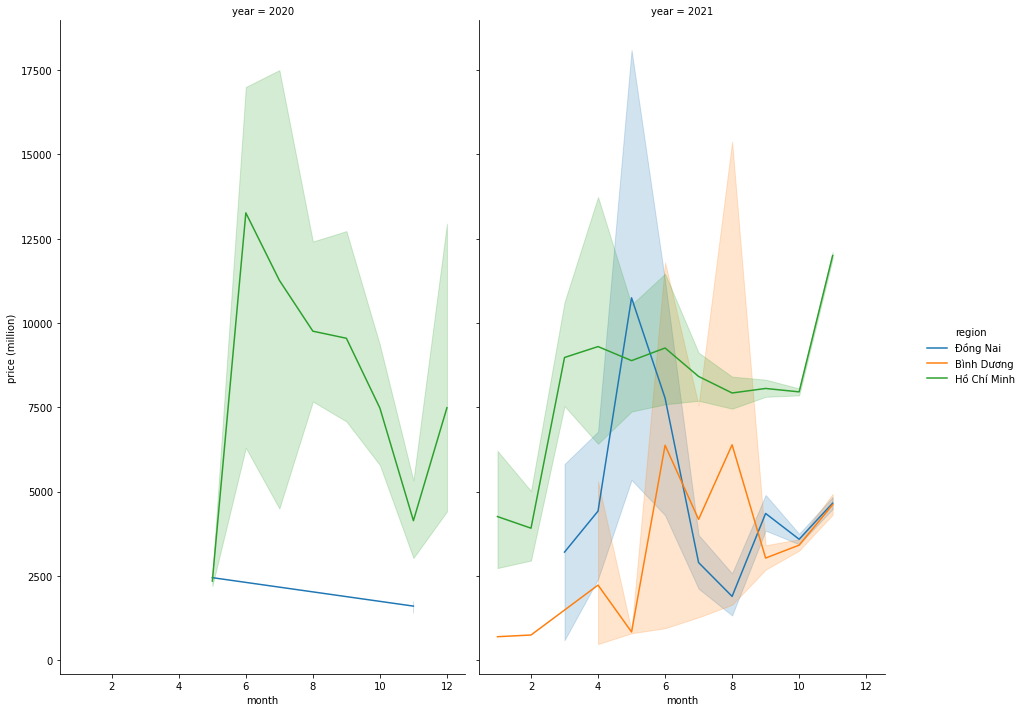

In [33]:
grid = sns.FacetGrid(BDS_df9, hue="region", col="year",
                     margin_titles=True, height=10, aspect=0.65)
grid.map(sns.lineplot, "month", "price (million)")
grid.add_legend()


In [34]:
BDS_df10['list_time'] = BDS_df10['list_time'].apply(
    lambda x: int(round(x.timestamp())))


### direction , **property_legal_document , rooms , toilets , floors , type_real_estate**


<AxesSubplot:xlabel='price (million)', ylabel='direction'>

<AxesSubplot:xlabel='price (million)', ylabel='property_legal_document'>

<AxesSubplot:xlabel='price (million)', ylabel='rooms'>

<AxesSubplot:xlabel='price (million)', ylabel='toilets'>

<AxesSubplot:xlabel='price (million)', ylabel='floors'>

<AxesSubplot:xlabel='price (million)', ylabel='type_real_estate'>

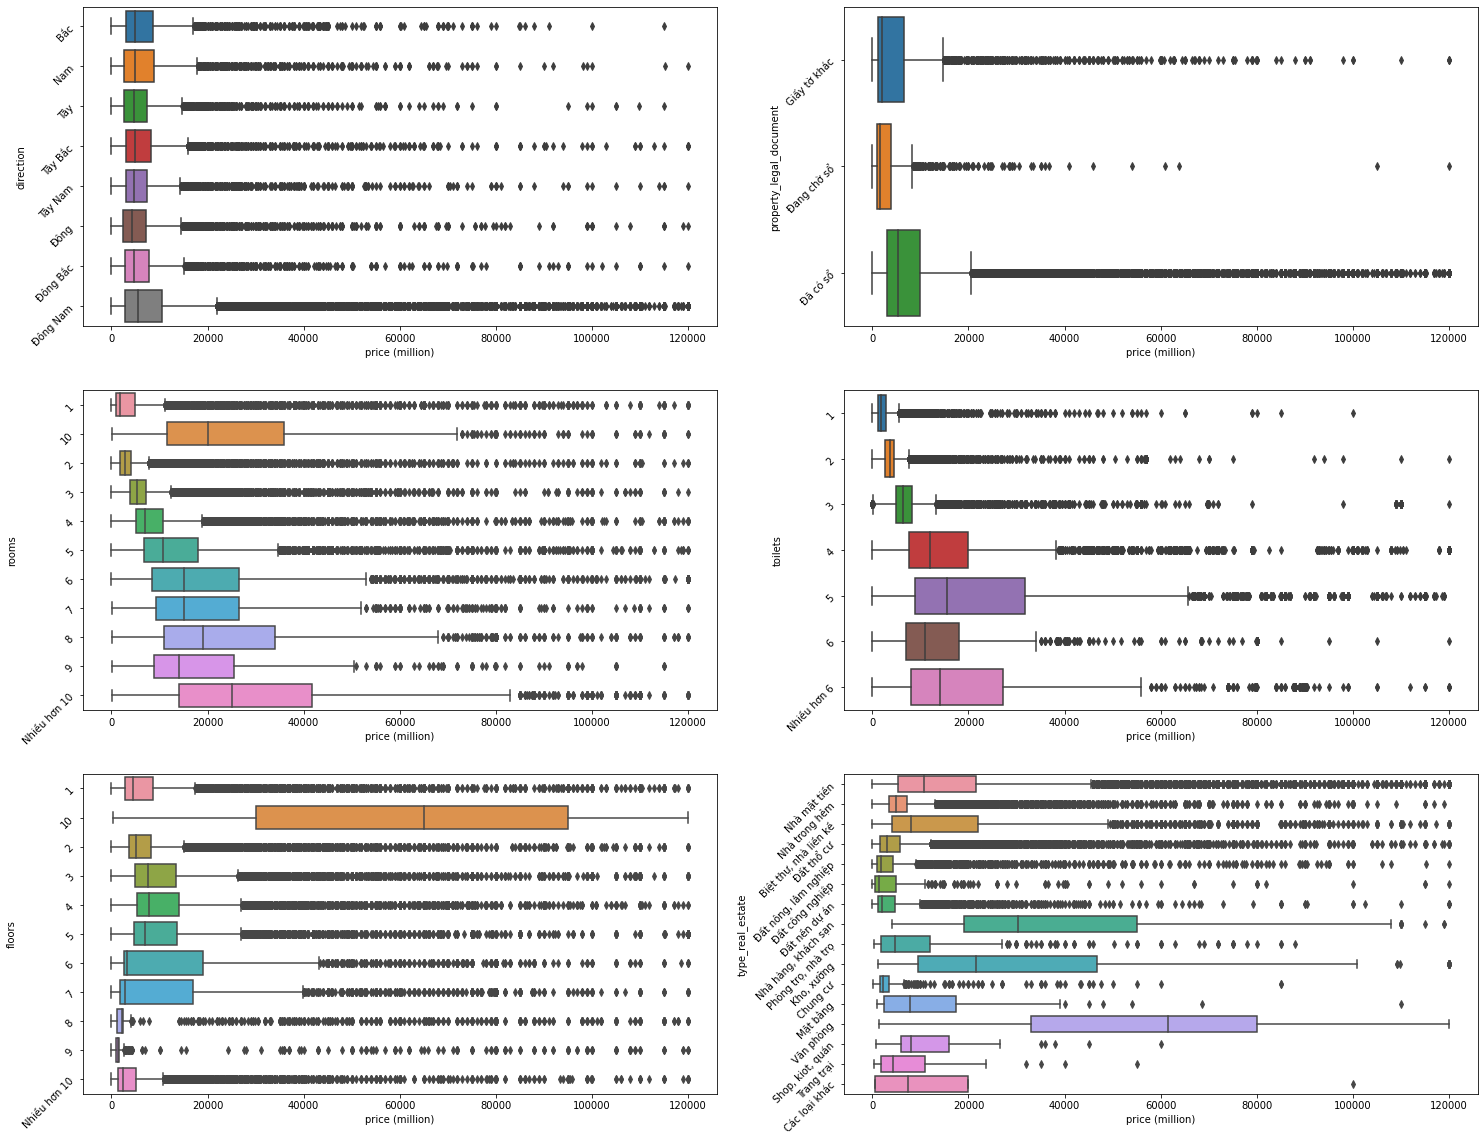

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(25, 20))
col, row = 0, 0
for val in ['direction', 'property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']:
    sns.boxplot(y=val, x='price (million)', orient='h',
                data=BDS_df9, ax=axes[row, col])
    axes[row, col].tick_params(labelrotation=45, axis='y')
    col += 1
    if col > 1:
        col = 0
        row += 1


=> Chỉ có direction không có sự khác biệt giữa các nhóm nên cần kết hợp với các thuộc tính khác


<AxesSubplot:xlabel='price (million)', ylabel='direction'>

<AxesSubplot:xlabel='price (million)', ylabel='property_legal_document'>

<AxesSubplot:xlabel='price (million)', ylabel='rooms'>

<AxesSubplot:xlabel='price (million)', ylabel='toilets'>

<AxesSubplot:xlabel='price (million)', ylabel='floors'>

<AxesSubplot:xlabel='price (million)', ylabel='type_real_estate'>

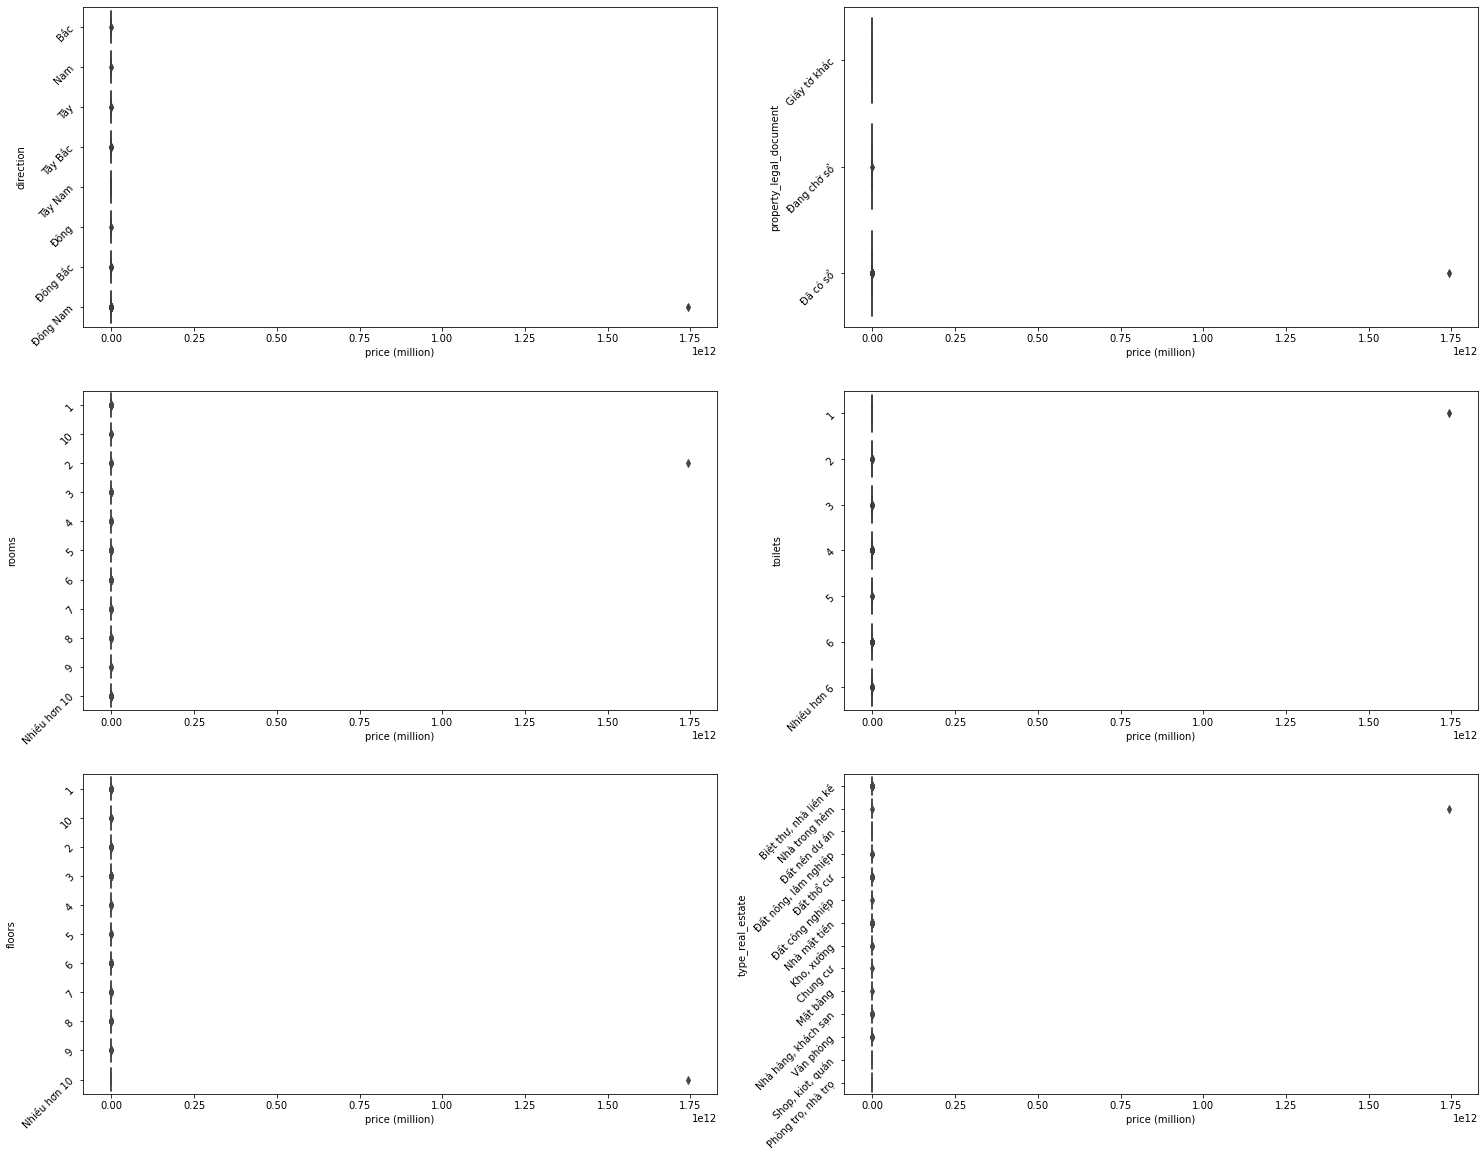

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(25, 20))
col, row = 0, 0
for val in ['direction', 'property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']:
    sns.boxplot(y=val, x='price (million)', orient='h',
                data=outlier_df, ax=axes[row, col])  # [outlier_df['price (million)'] <0.25e12]
    axes[row, col].tick_params(labelrotation=45, axis='y')
    col += 1
    if col > 1:
        col = 0
        row += 1


In [37]:
for v in ['property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']:
    word2idx[v] = convert_word2index(BDS_df10, v, 'price (million)')
    BDS_df10[v] = BDS_df10[v].replace(word2idx[v])


In [38]:
# Vì website chỉ là nền tảng đăng tin nên không được tính là yếu tố ảnh hưởng đến giá
BDS_df10.drop('website', axis=1, inplace=True)


### Kết hợp


#### living_size (m2) + type_real_estate


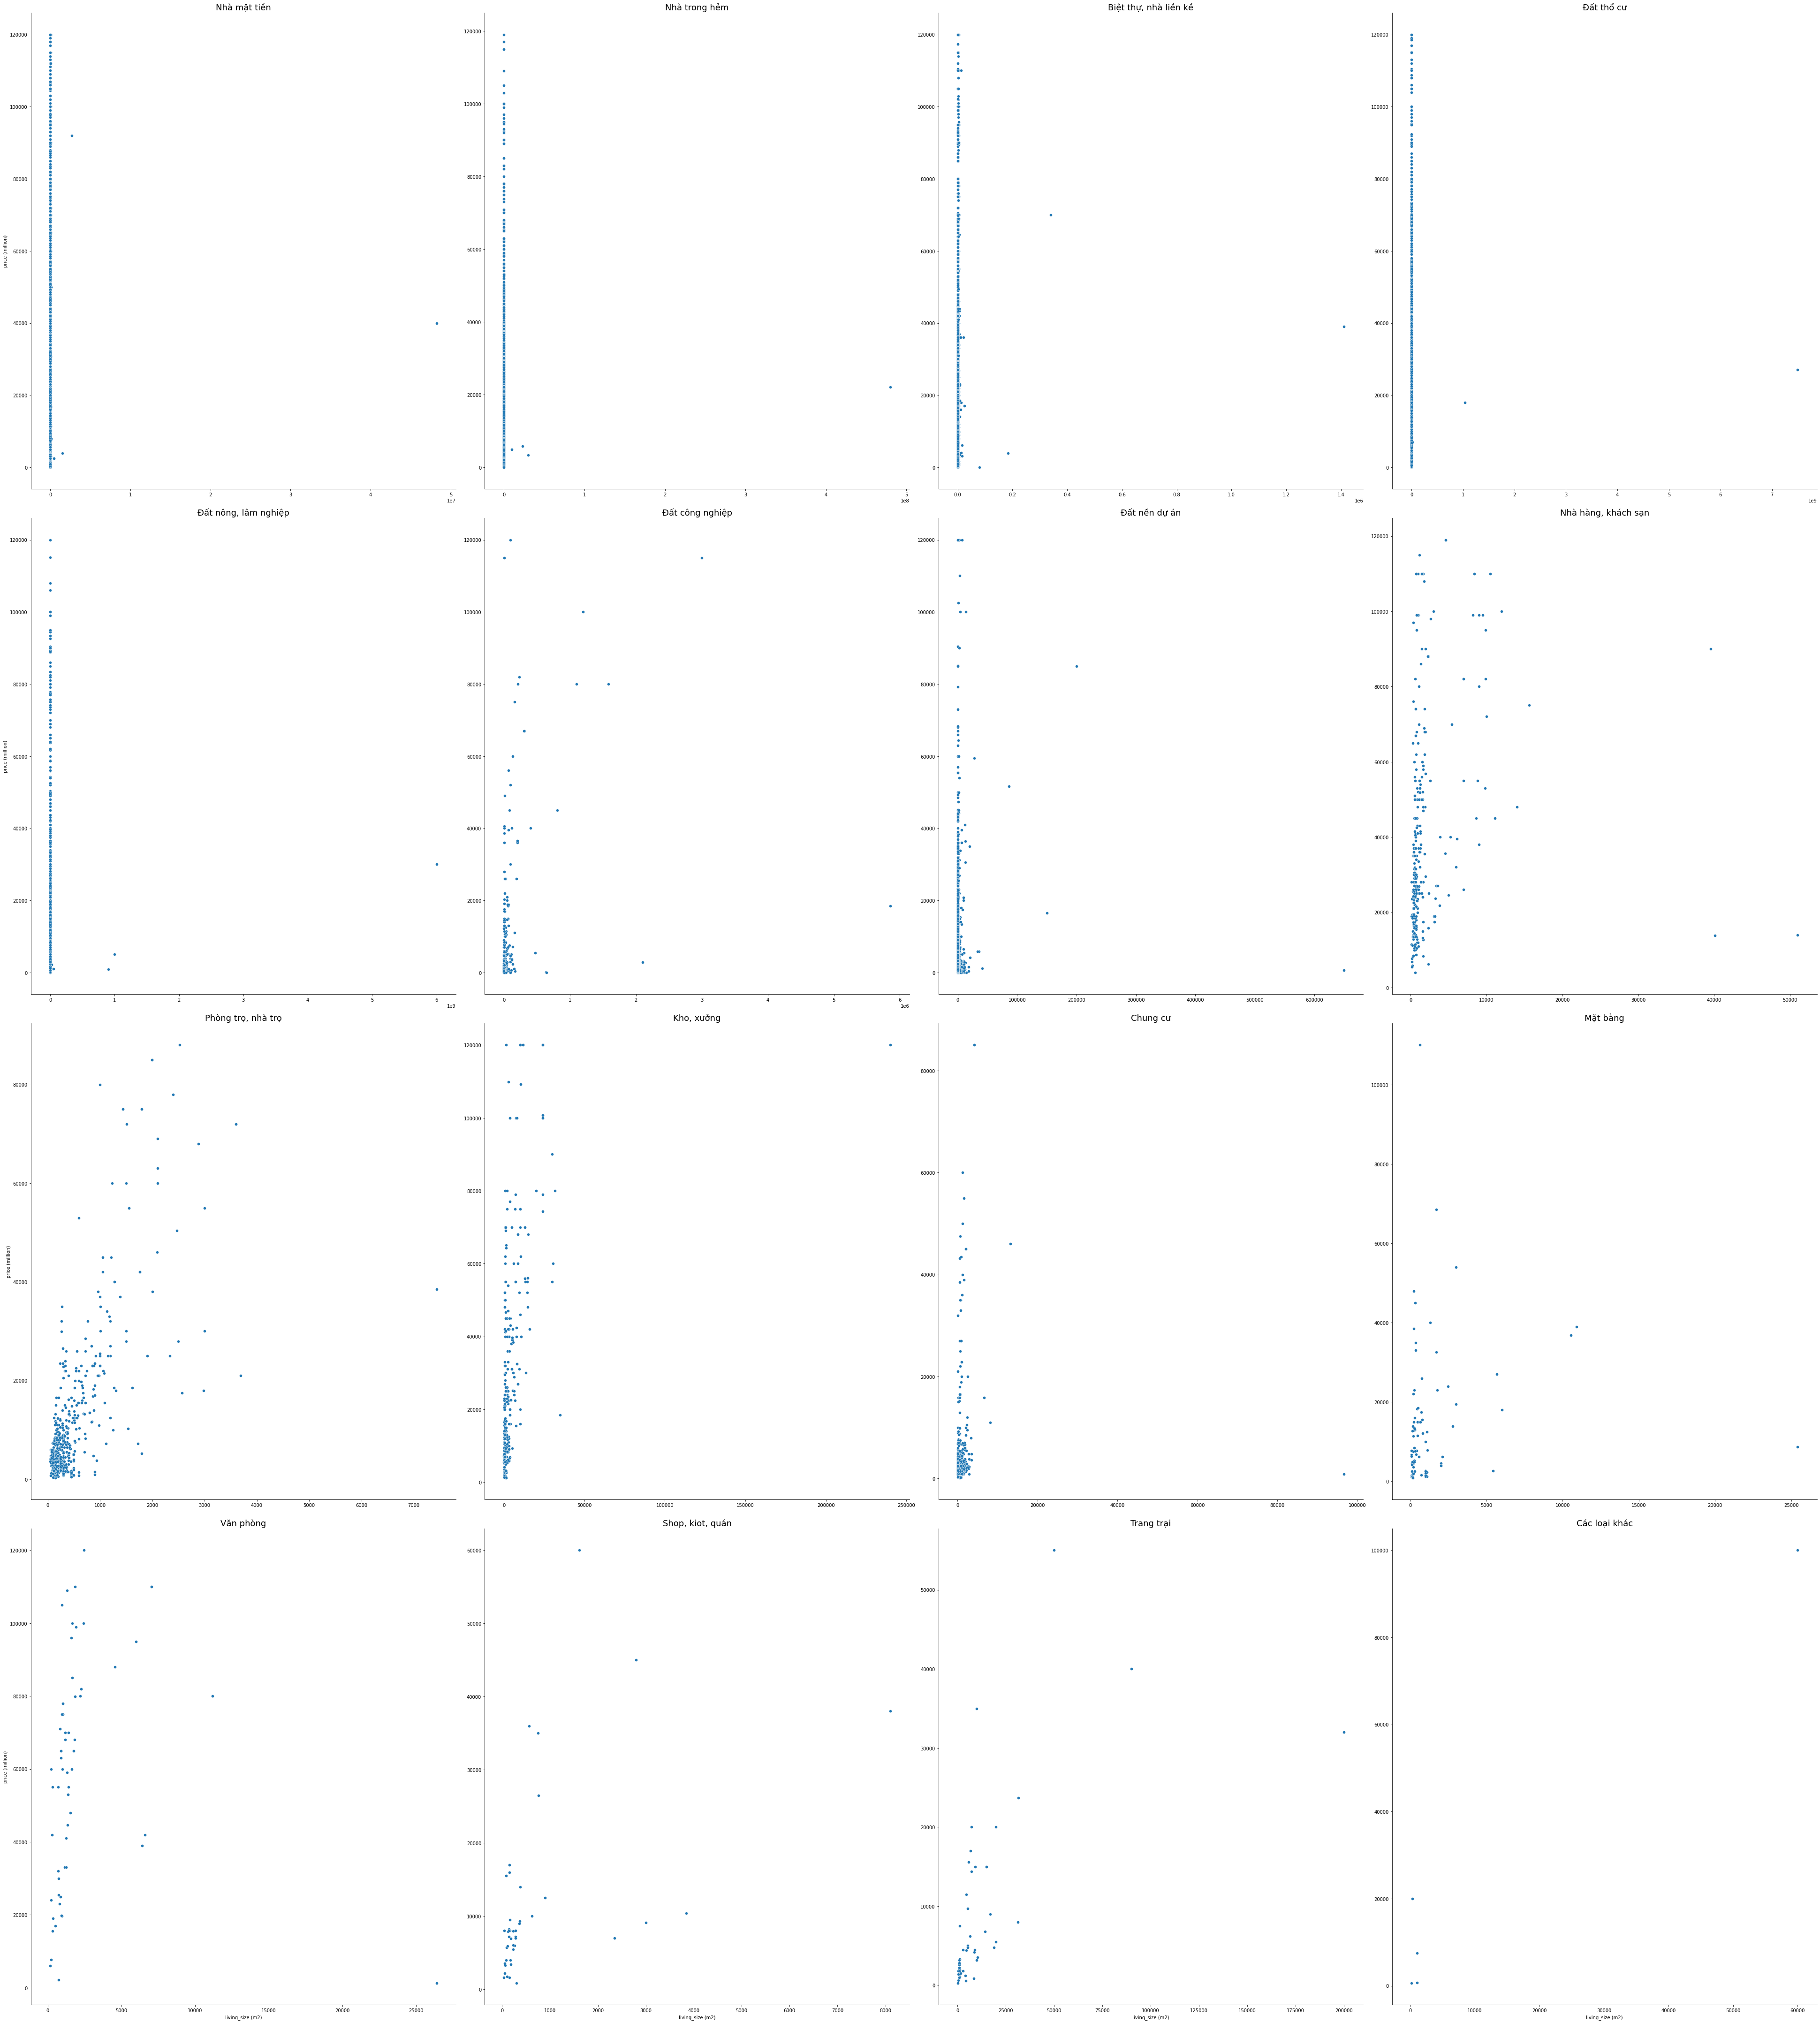

In [39]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.scatterplot, 'living_size (m2)', 'price (million)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_yticklabels(rotation=60, fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='living_size (m2)', ylabel='price (million)'>

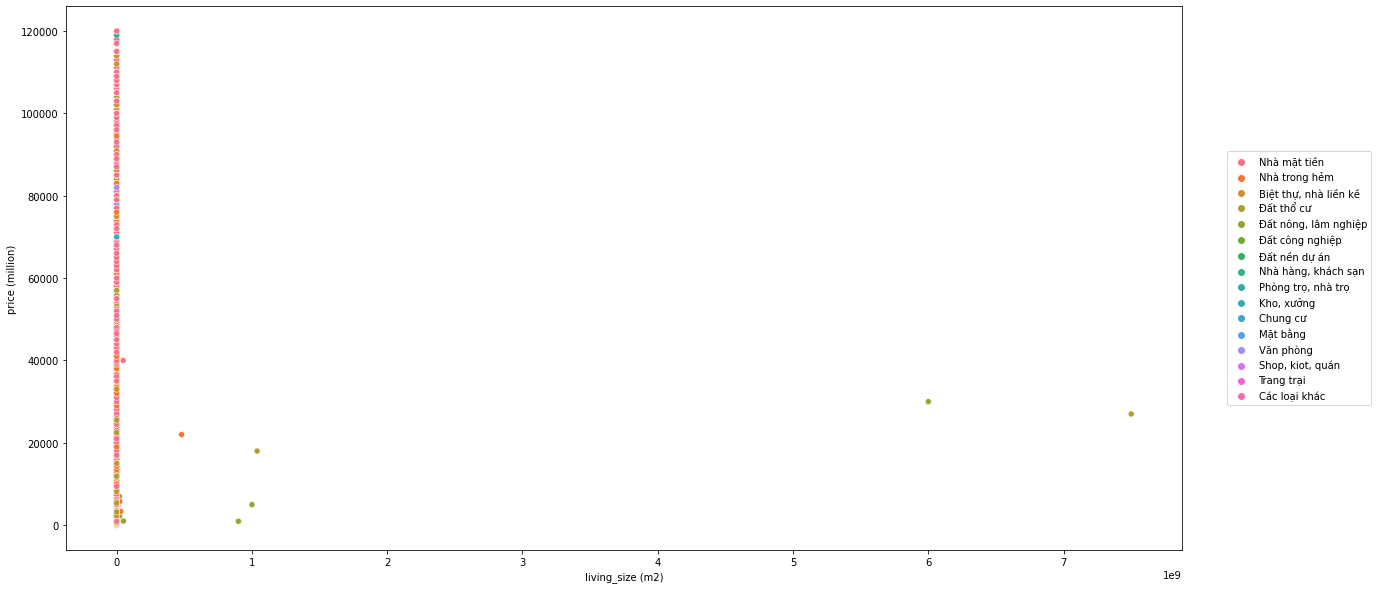

In [40]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='living_size (m2)',
                y='price (million)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


#### size (m2) + type_real_estate


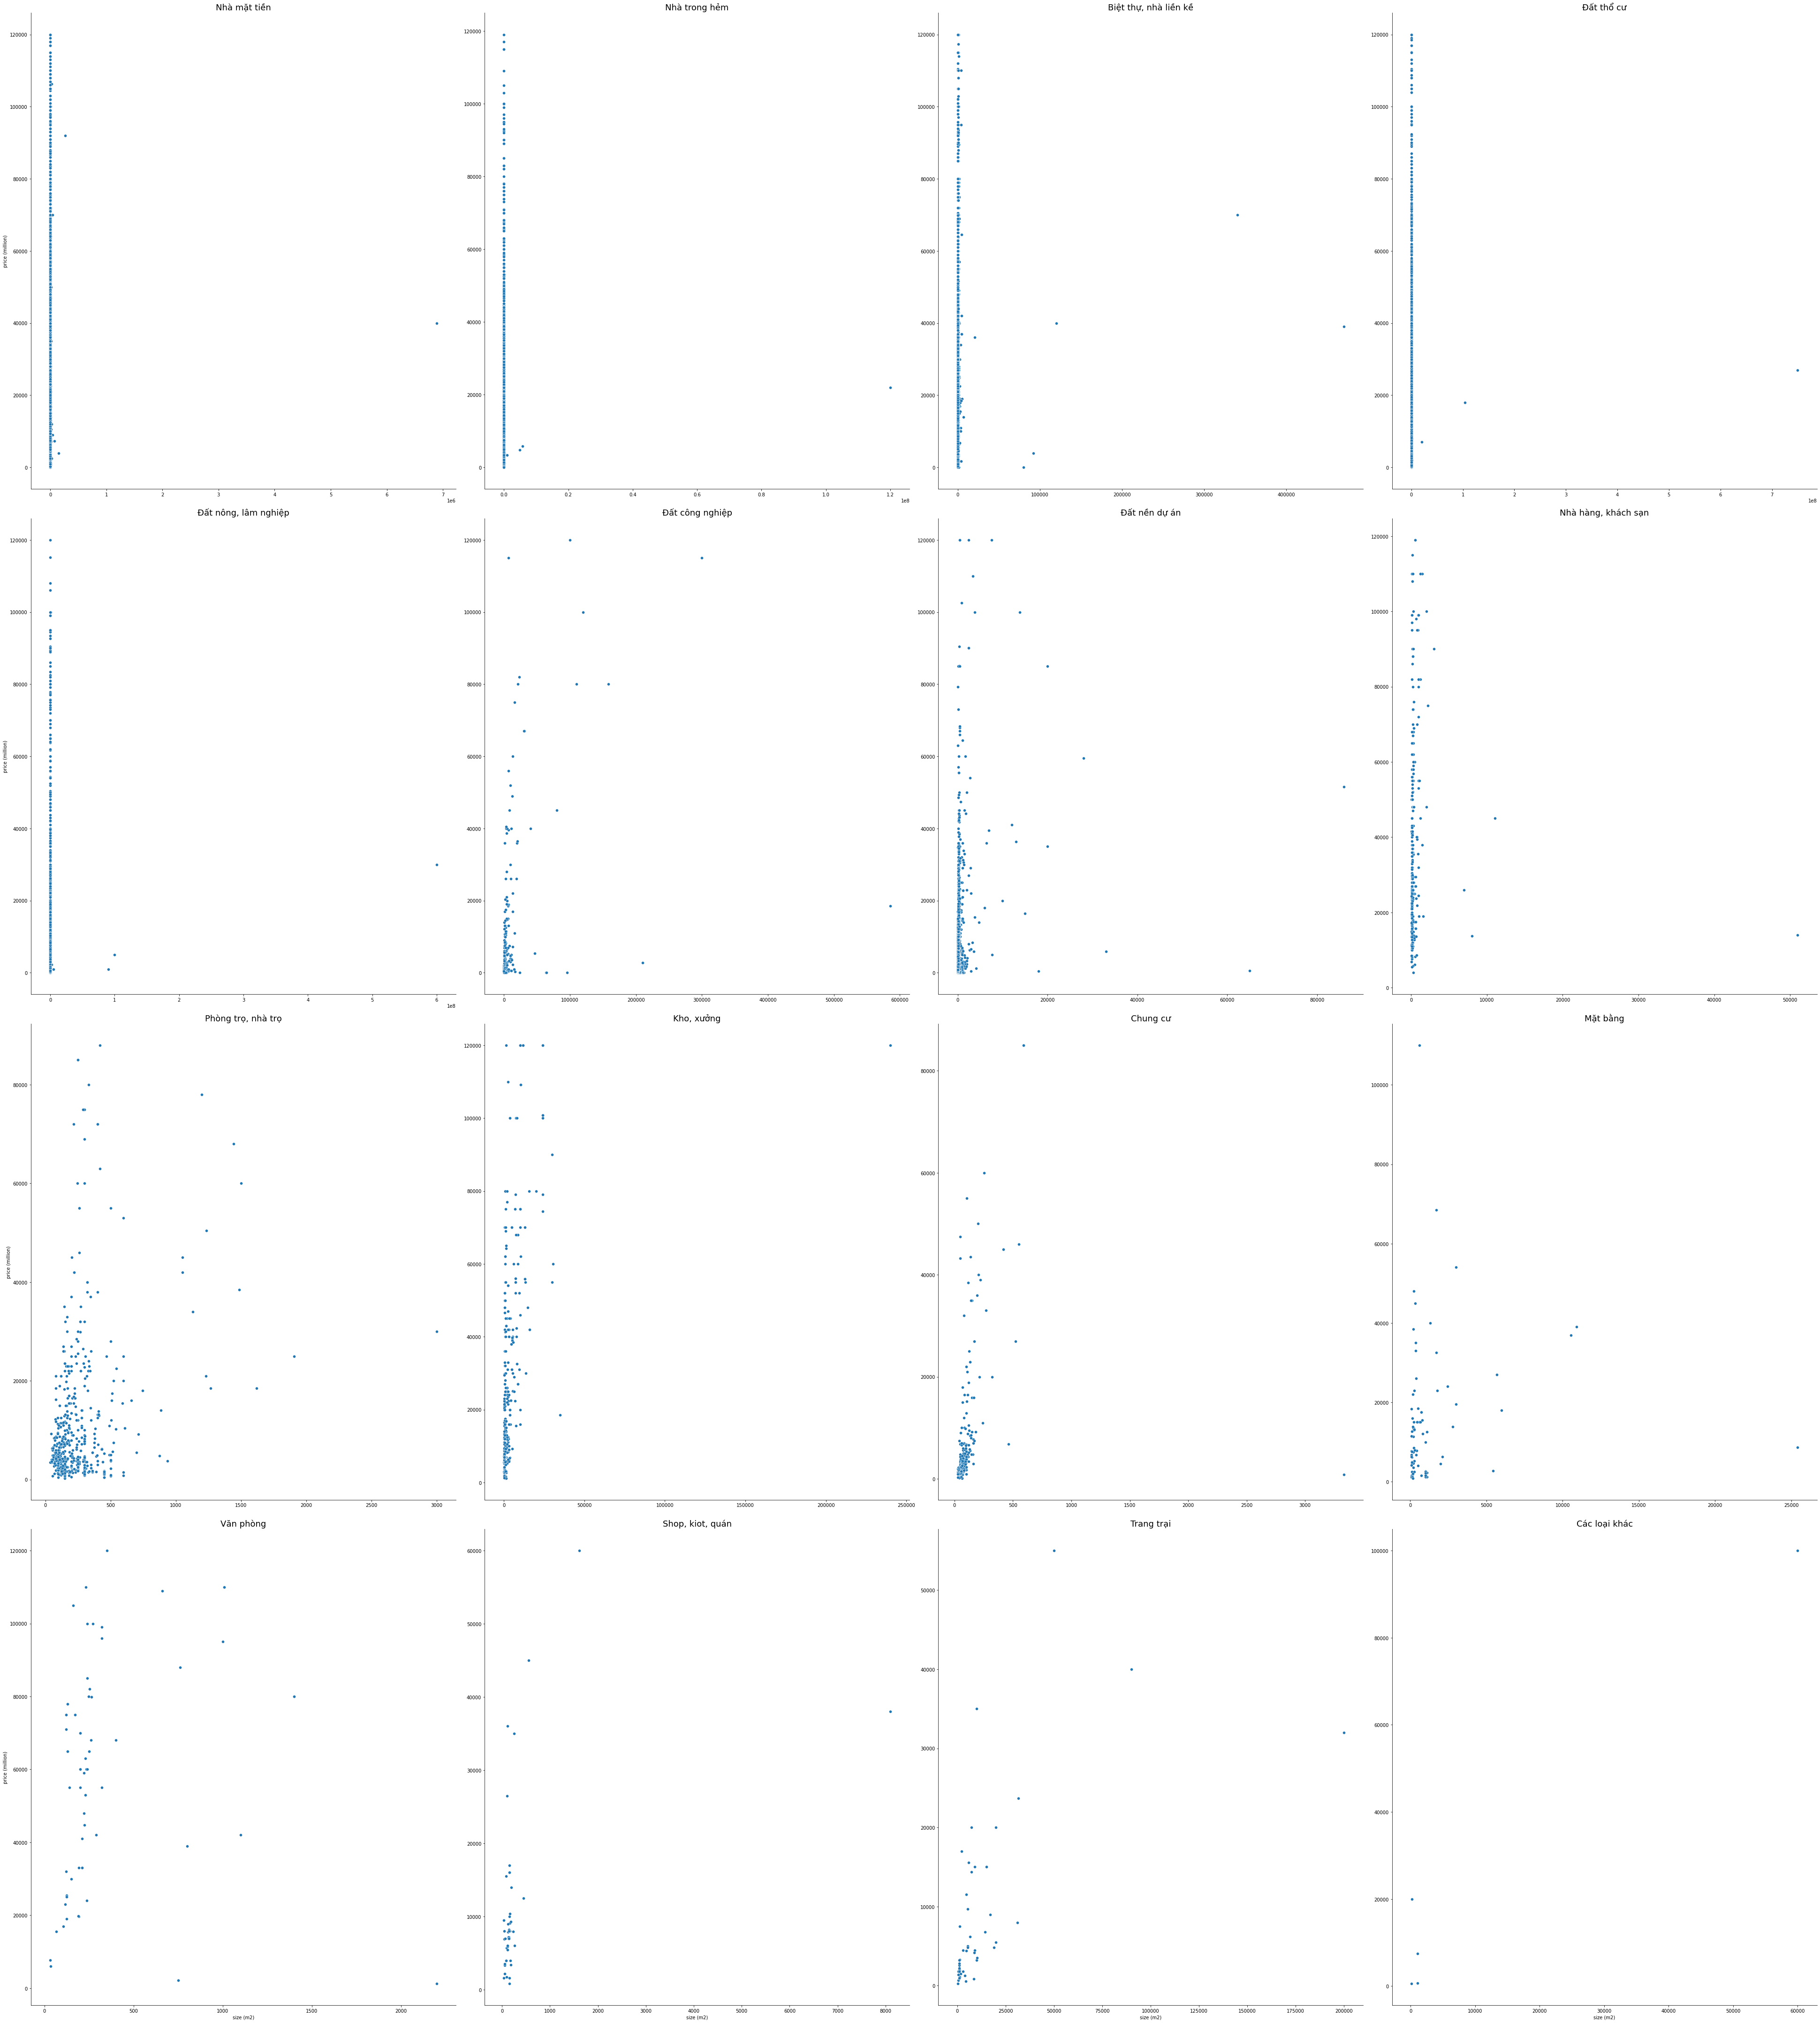

In [41]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.scatterplot, 'size (m2)', 'price (million)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_yticklabels(rotation=60, fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='size (m2)', ylabel='price (million)'>

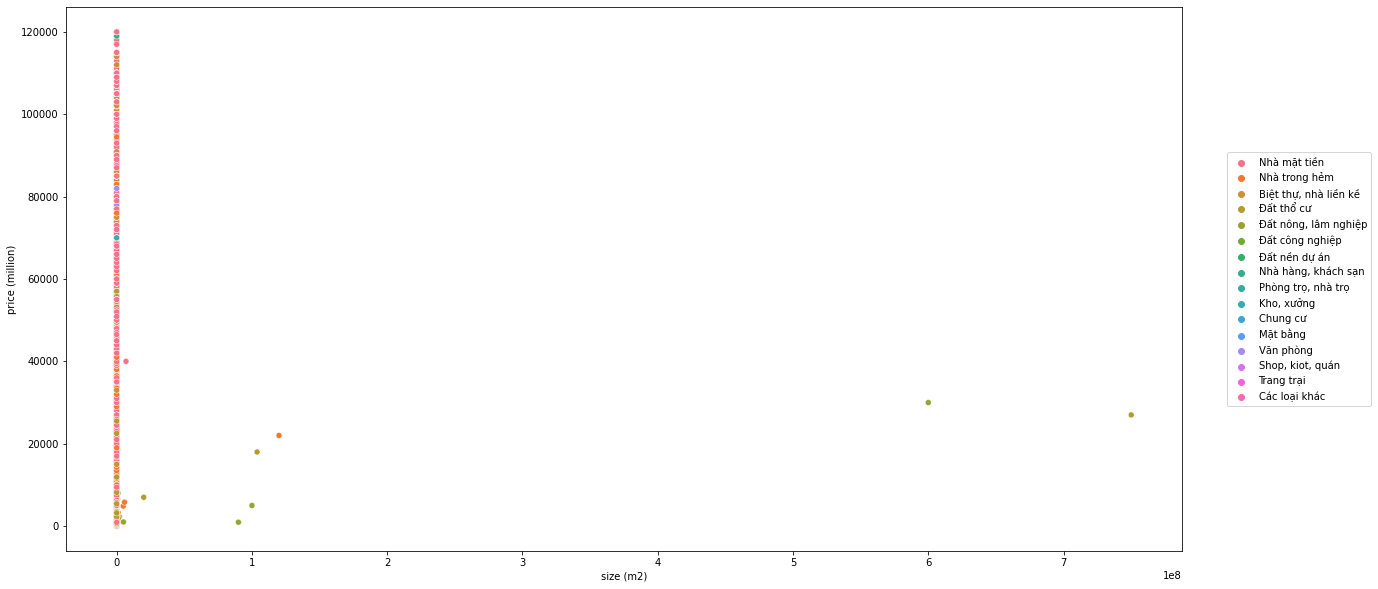

In [42]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='size (m2)',
                y='price (million)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='size (m2)', ylabel='price (million)'>

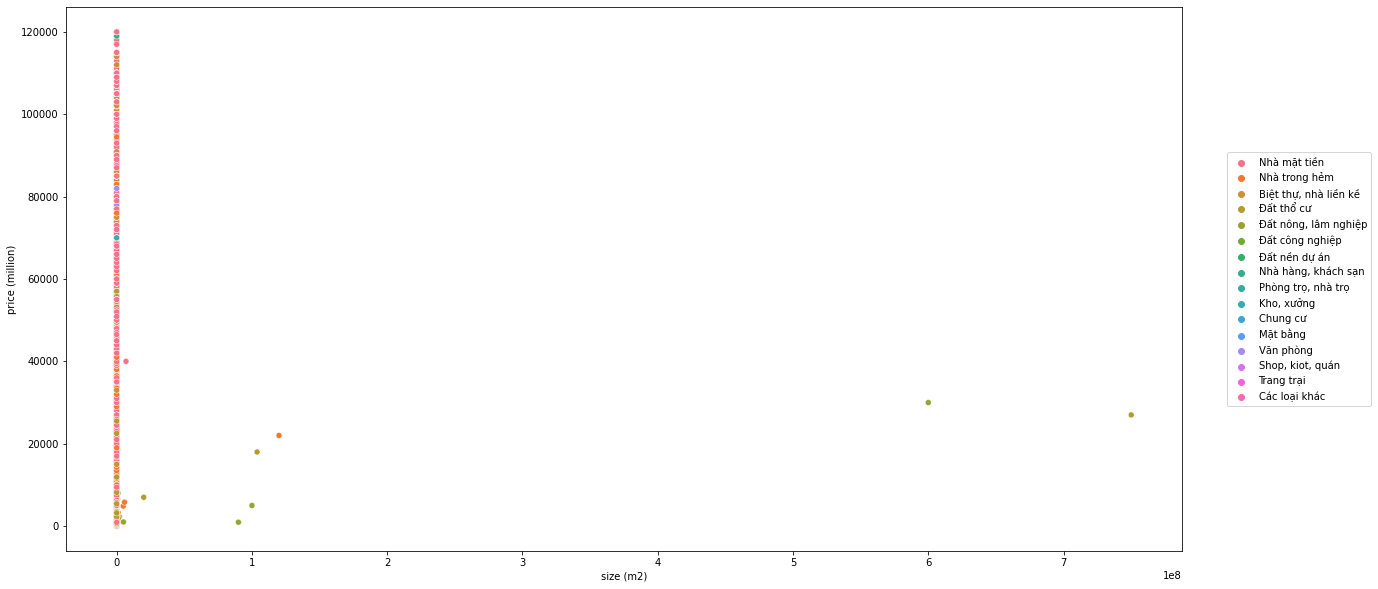

In [43]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9[BDS_df9['price (million)'] <= 1e8], x='size (m2)',
                y='price (million)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


#### length (m) + type_real_estate


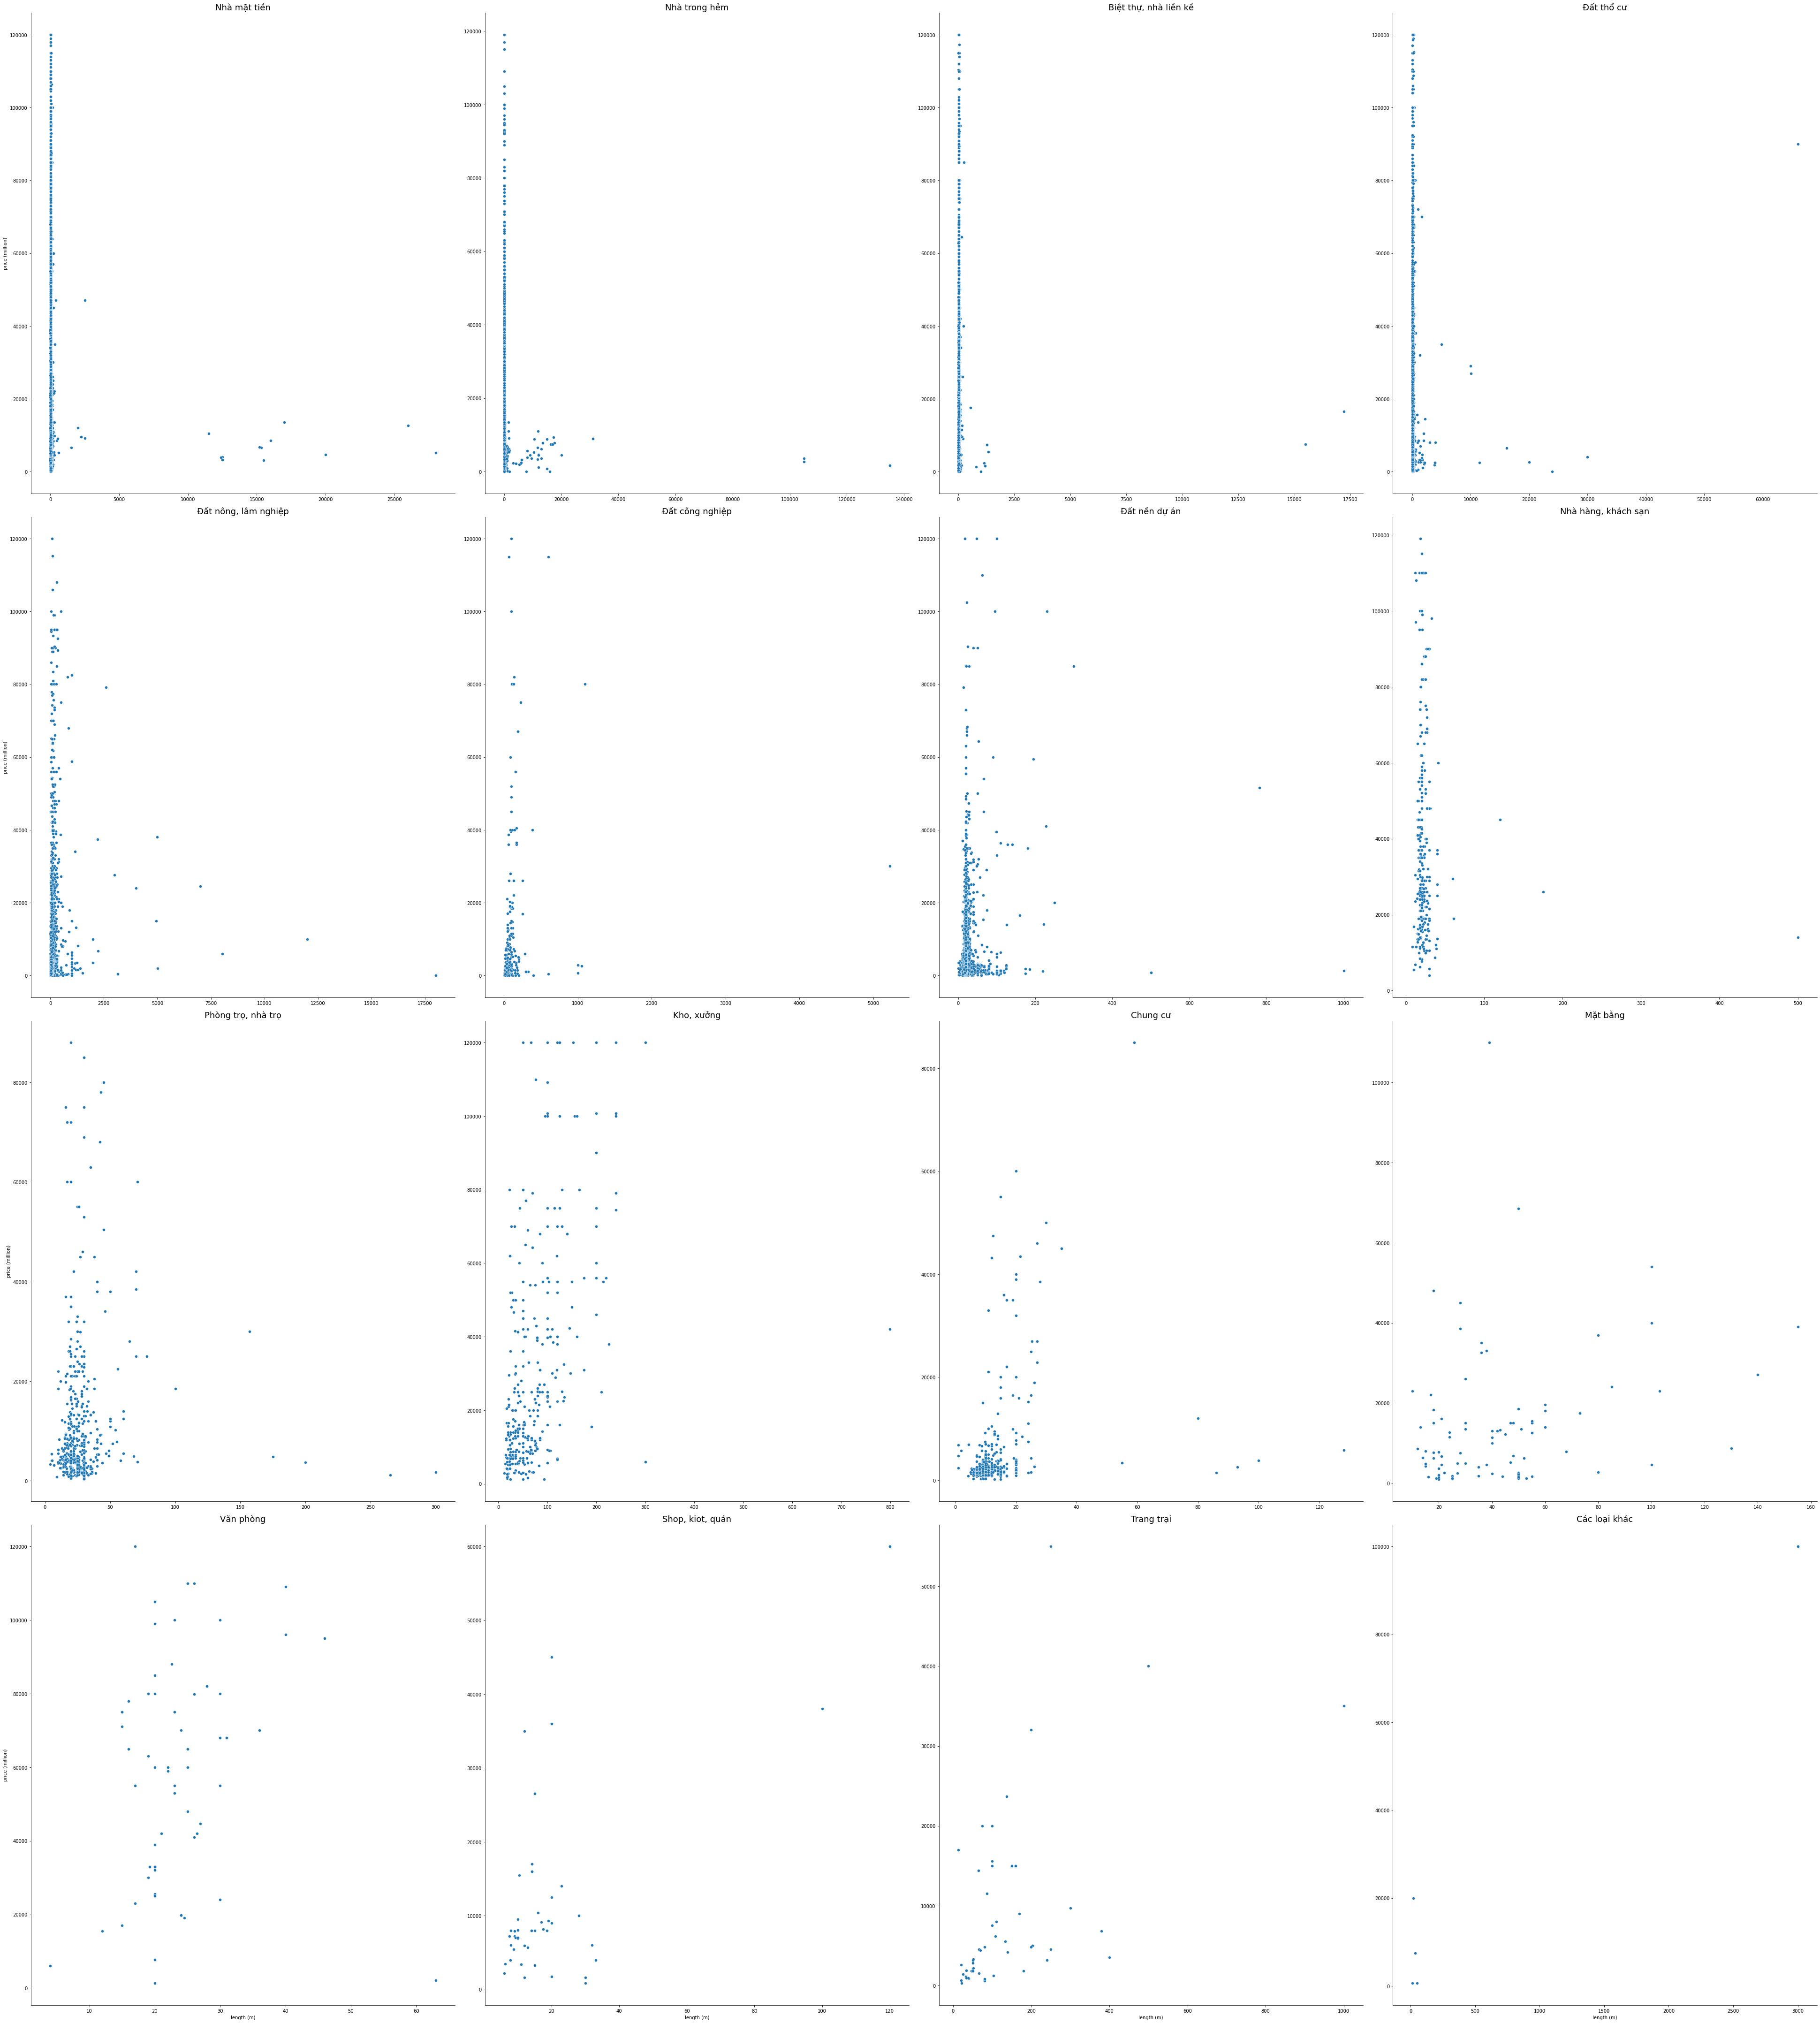

In [44]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.scatterplot, 'length (m)', 'price (million)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_ticklabels( fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='length (m)', ylabel='price (million)'>

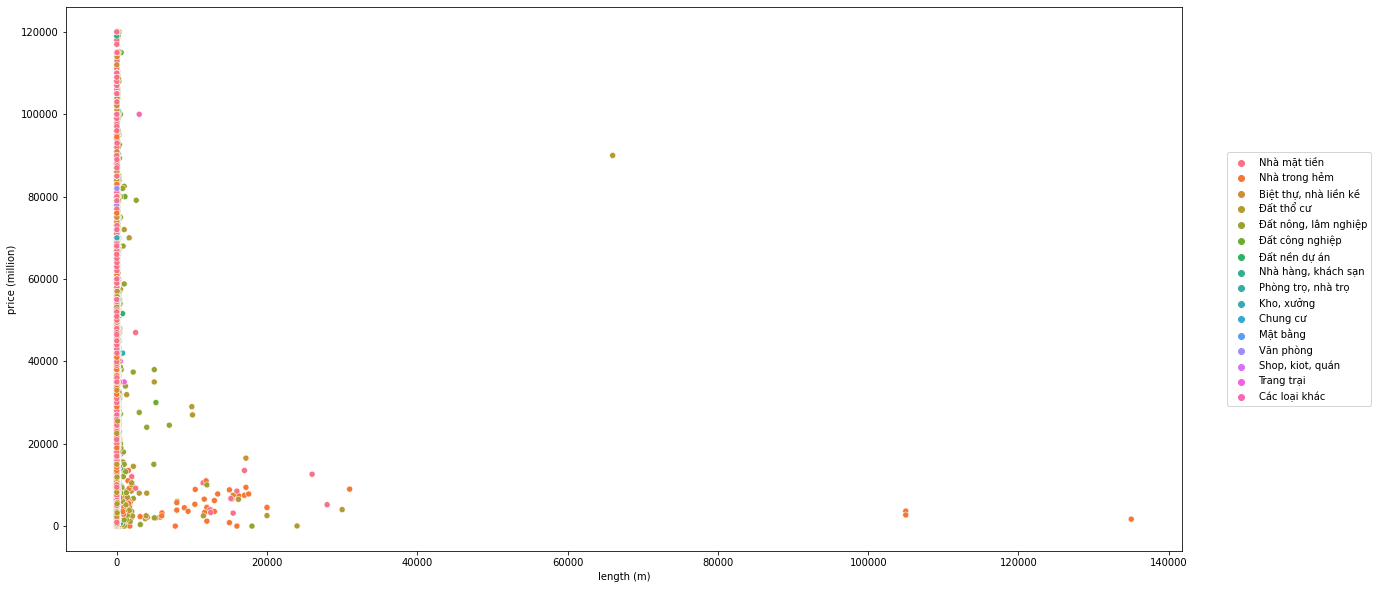

In [45]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='length (m)',
                y='price (million)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


#### width (m) + type_real_estate


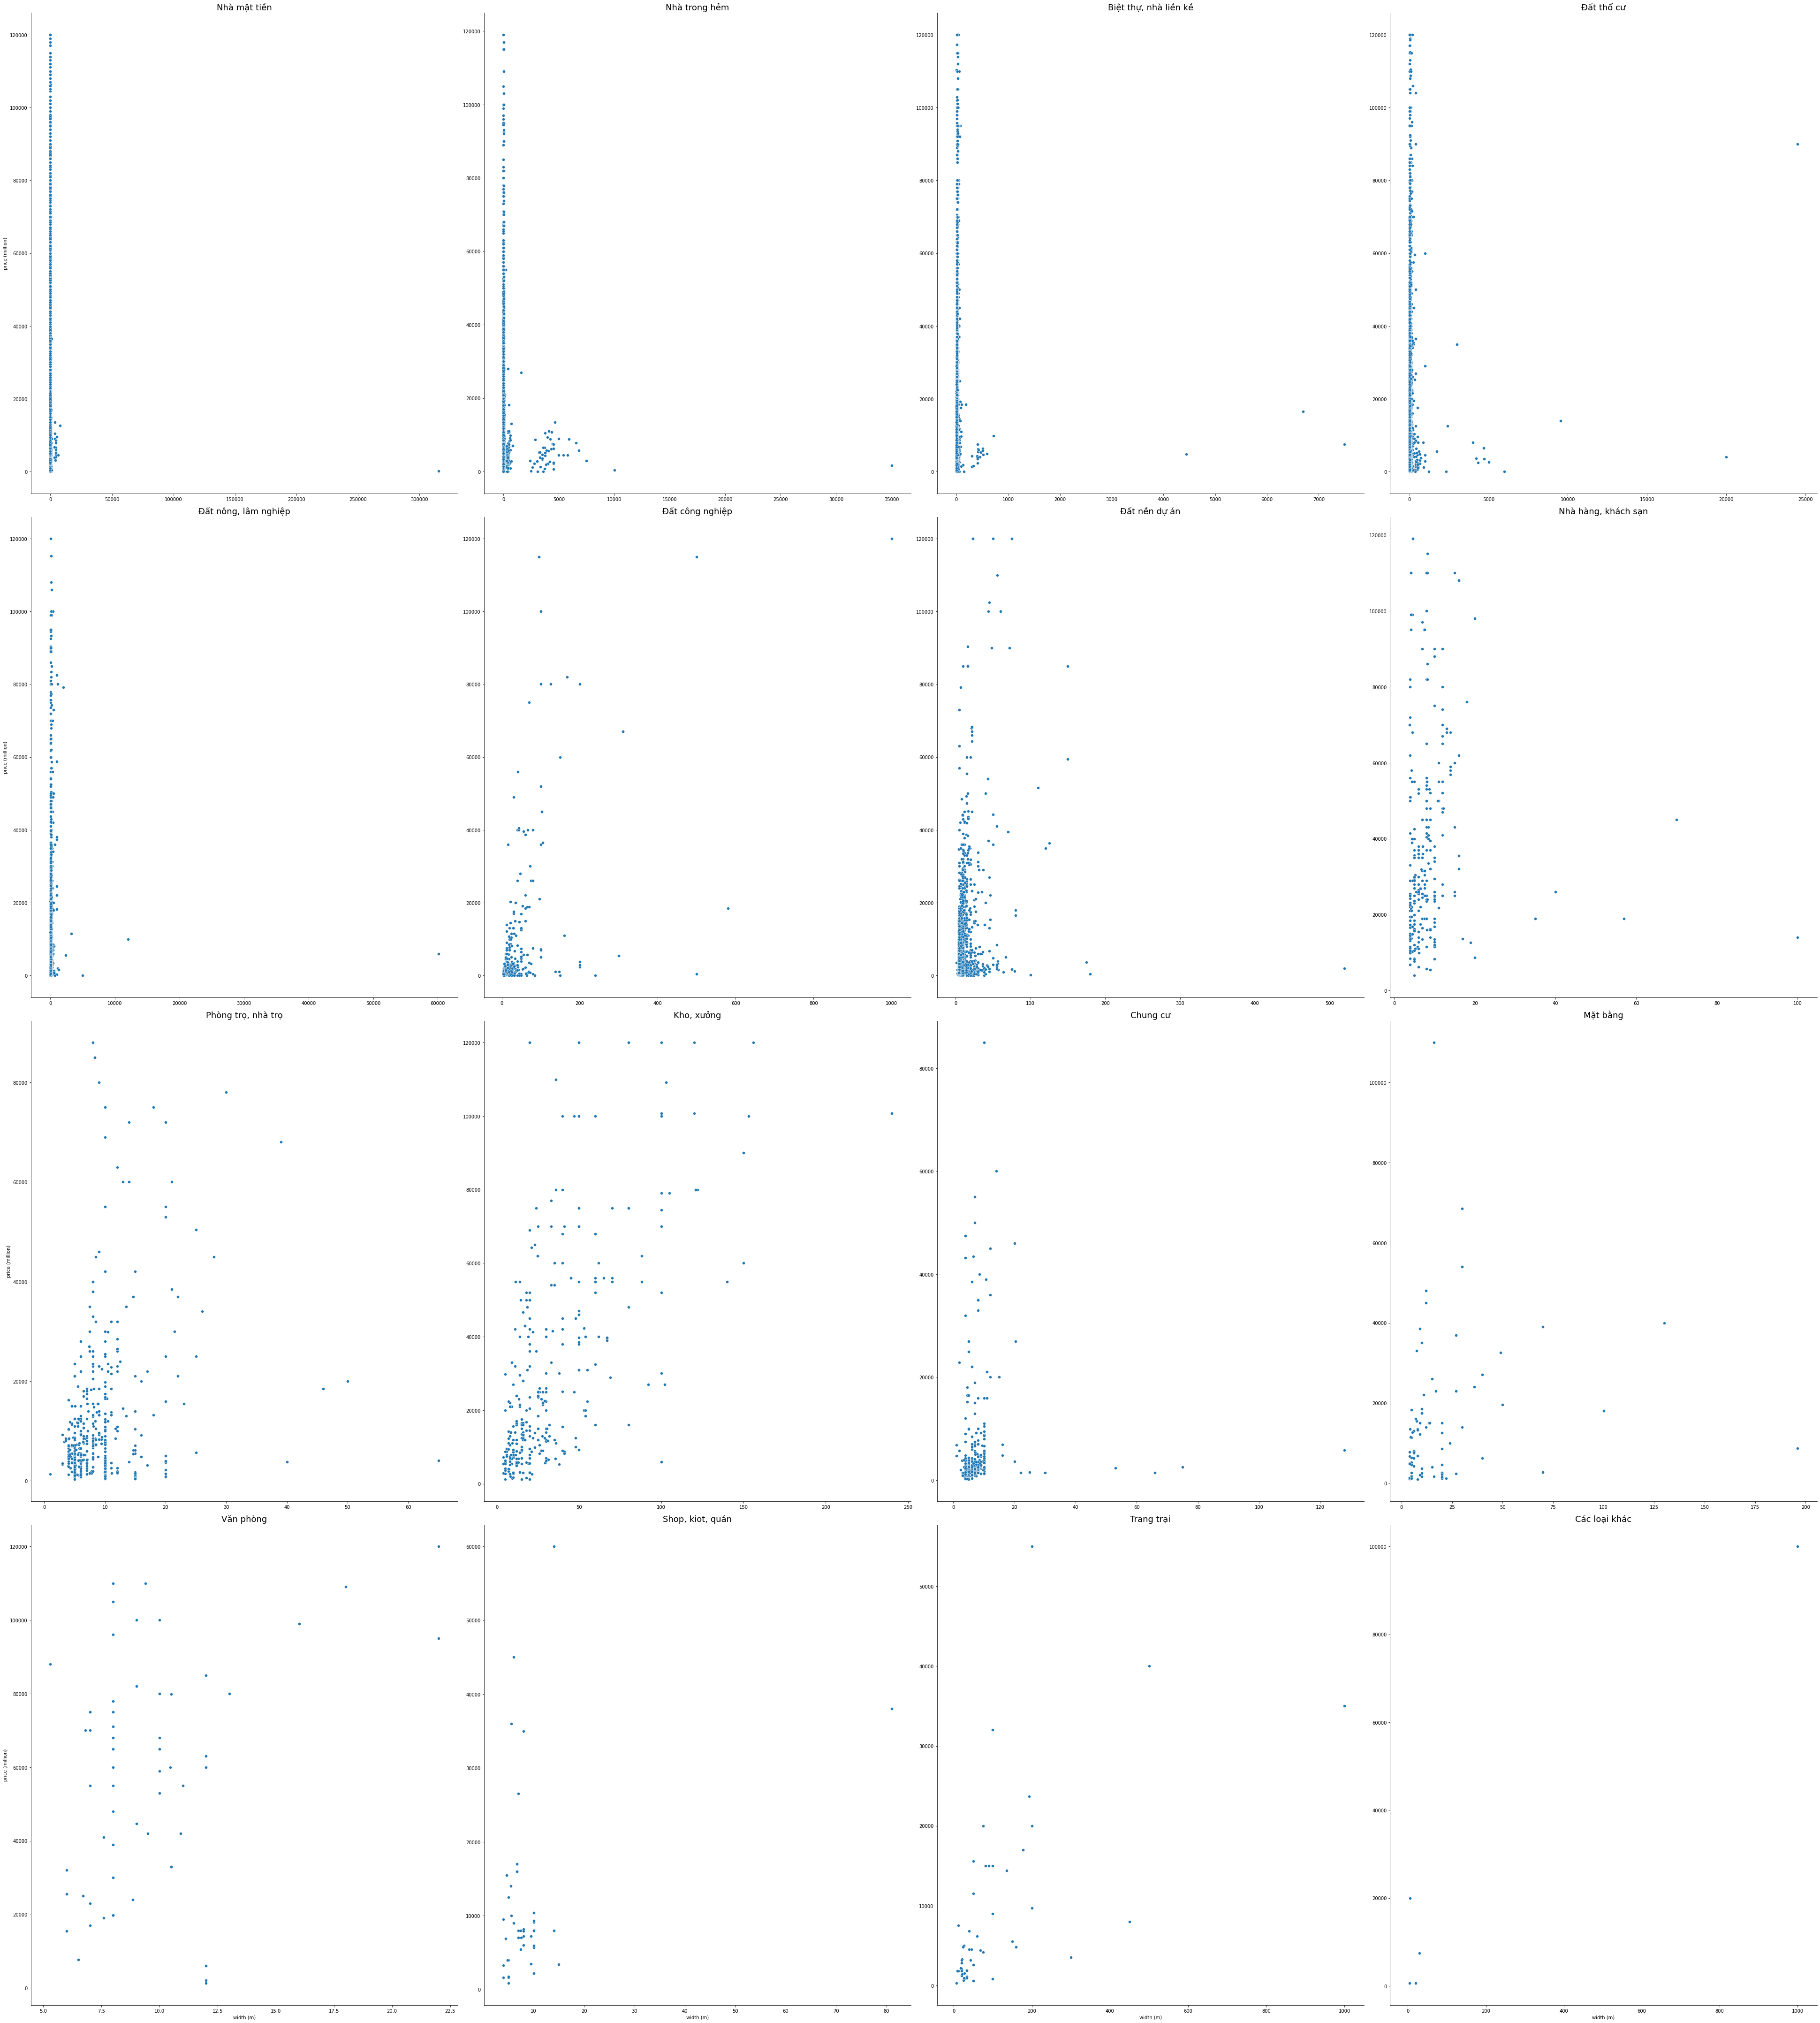

In [46]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.scatterplot, 'width (m)', 'price (million)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_ticklabels( fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='width (m)', ylabel='price (million)'>

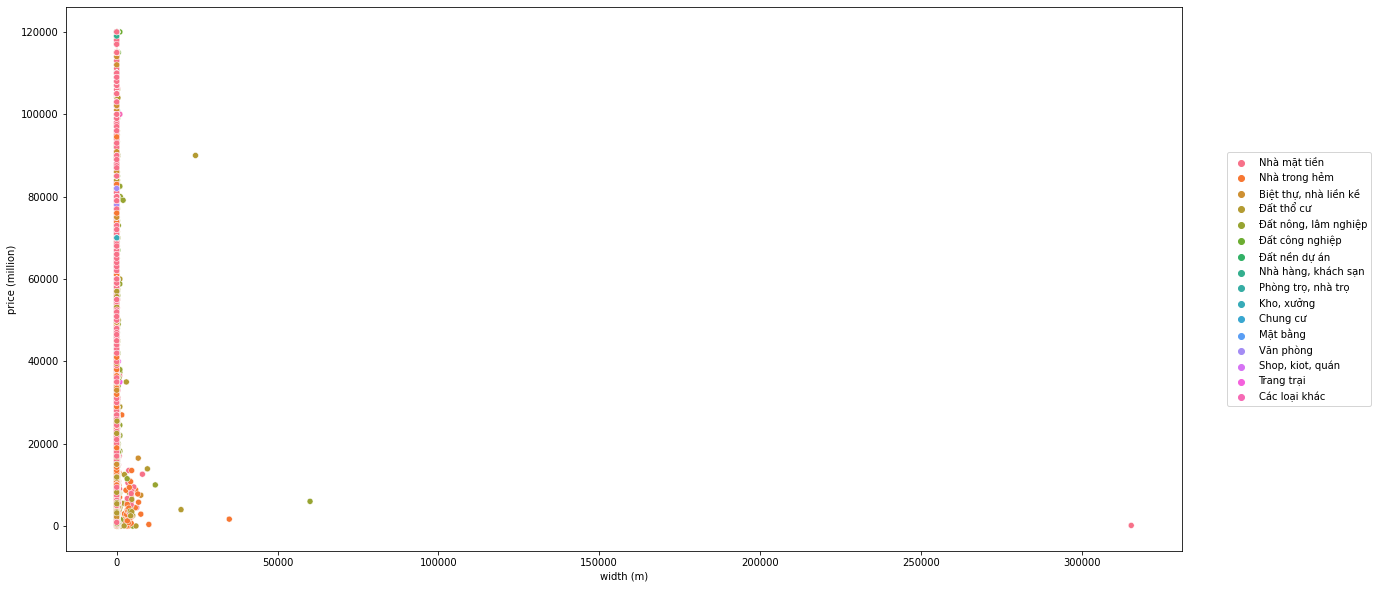

In [47]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='width (m)',
                y='price (million)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


# Model


In [78]:
X_feature = np.array(BDS_df10.columns[BDS_df10.columns != 'price (million)'])
X_feature

array(['list_time', 'ward', 'area', 'region', 'direction',
       'property_legal_document', 'size (m2)', 'rooms', 'toilets',
       'floors', 'living_size (m2)', 'width (m)', 'length (m)',
       'type_real_estate', 'front_road'], dtype=object)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    BDS_df10[X_feature], BDS_df10['price (million)'], test_size=0.1, random_state=0)


## 1

In [72]:
features1 = ['front_road', 'region', 'area', 'ward', 'list_time',
             'property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']


In [75]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [76]:
model1.fit(X_train[features1], y_train)

LinearRegression()

In [82]:
model1.predict(X_test[features1])

array([ -9410116.00342083, -32986074.45816672,  20513571.97296238, ...,
        71743615.01191723,  59469596.57404244,  49900327.43229818])